In [866]:
! pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.1 MB/s eta 0:00:00m eta 0:00:010:01:01


In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import model_selection
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
# from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, \
                             GradientBoostingRegressor, \
                             RandomForestRegressor, \
                             BaggingRegressor,\
                             StackingRegressor, \
                             VotingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder

In [60]:
pd.set_option('display.max_columns', None)

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
df_train = pd.read_csv('train.csv', index_col='Id')
df_test = pd.read_csv('test.csv', index_col='Id')
df = pd.concat([df_train, df_test])

# Работа с фичами

In [63]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [64]:
df_num_features = df.select_dtypes(include=['float64', 'int64', 'uint8'])
df_cat_features = df.select_dtypes(include=['object'])

PoolQC 2909 (99.66%)
MiscFeature 2814 (96.4%)
Alley 2721 (93.22%)
Fence 2348 (80.44%)
SalePrice 1459 (49.98%)
FireplaceQu 1420 (48.65%)
LotFrontage 486 (16.65%)
GarageYrBlt 159 (5.45%)
GarageFinish 159 (5.45%)
GarageQual 159 (5.45%)
GarageCond 159 (5.45%)
GarageType 157 (5.38%)
BsmtCond 82 (2.81%)
BsmtExposure 82 (2.81%)
BsmtQual 81 (2.77%)
BsmtFinType2 80 (2.74%)
BsmtFinType1 79 (2.71%)
MasVnrType 24 (0.82%)
MasVnrArea 23 (0.79%)
MSZoning 4 (0.14%)
Utilities 2 (0.07%)
BsmtFullBath 2 (0.07%)
BsmtHalfBath 2 (0.07%)
Functional 2 (0.07%)
Exterior1st 1 (0.03%)
Exterior2nd 1 (0.03%)
BsmtFinSF1 1 (0.03%)
BsmtFinSF2 1 (0.03%)
BsmtUnfSF 1 (0.03%)
TotalBsmtSF 1 (0.03%)
Electrical 1 (0.03%)
KitchenQual 1 (0.03%)
GarageCars 1 (0.03%)
GarageArea 1 (0.03%)
SaleType 1 (0.03%)


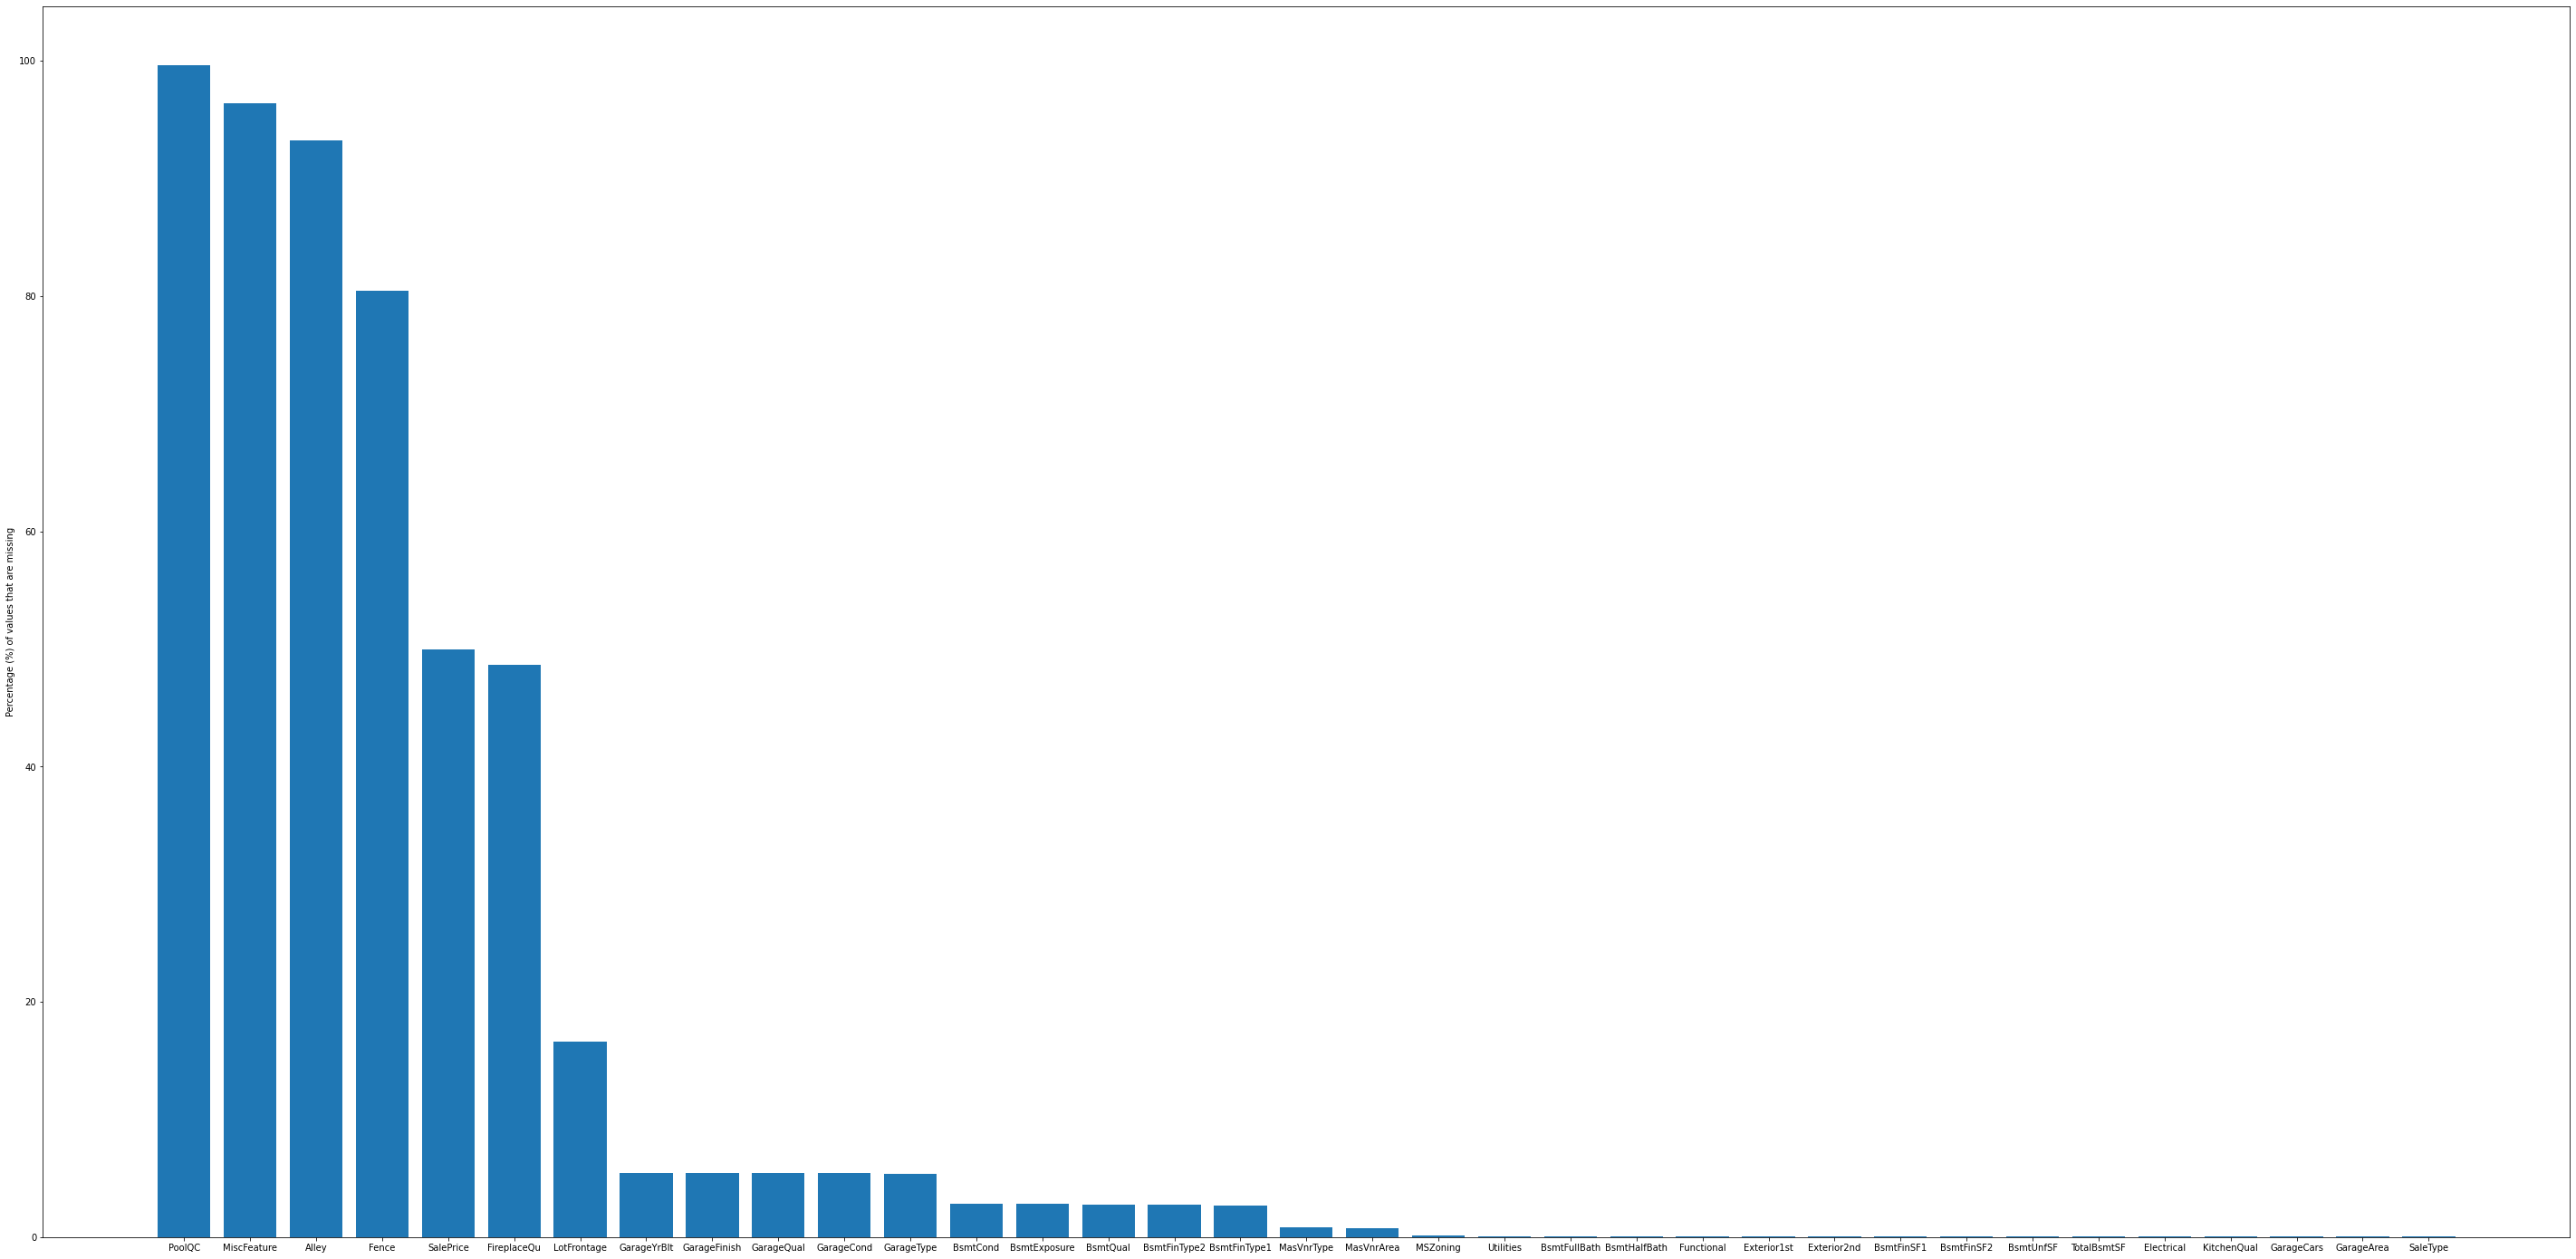

In [65]:
def missing_features(data, column_set):
    incomplete_features = {feature: data.shape[0]-sum(data[feature].value_counts())
                                   for feature in column_set
                                   if not sum(data[feature].value_counts()) == data.shape[0]}
    incomplete_features_sorted = sorted(incomplete_features, key=lambda feature: incomplete_features[feature], reverse=True)
    incompleteness = [round((incomplete_features[feature]/data.shape[0])*100, 2) for feature in incomplete_features_sorted]
    plt.figure(figsize=(50,25))
    plt.bar(incomplete_features_sorted, incompleteness)
    plt.ylabel("Percentage (%) of values that are missing")
    plt.rcParams["figure.figsize"] = [16, 8]
    
    for feature, percentage in zip(incomplete_features_sorted, incompleteness):
        print(f'{feature} {incomplete_features[feature]} ({percentage}%)')
missing_features(df, df.columns)

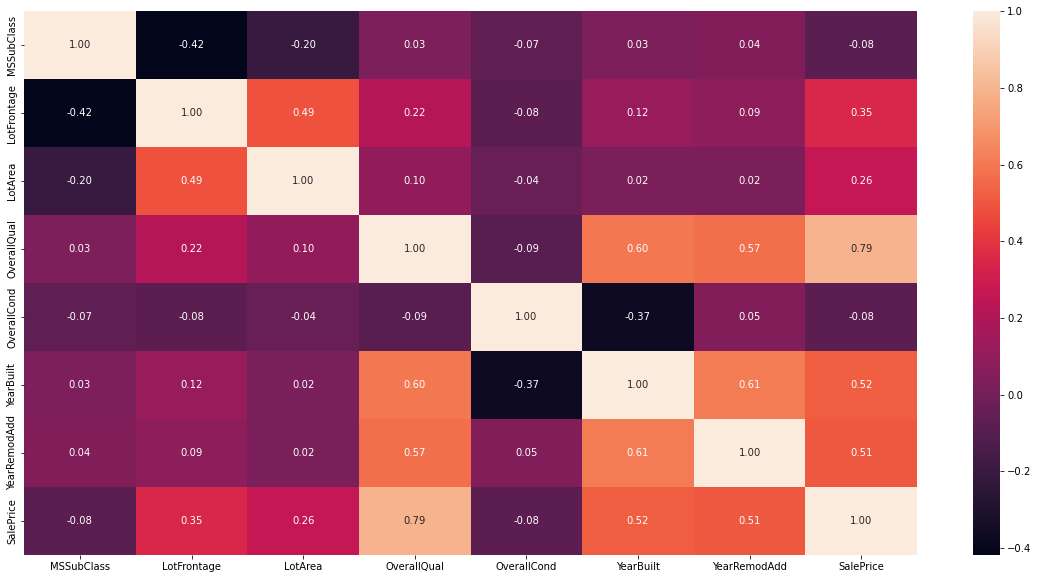

In [66]:
# df_num_features = df.select_dtypes(include=['float64', 'int64', 'uint8'])
# max_in_row = 6
# print(len(df_num_features))
# for i in range(0, len(df_num_features), max_in_row):
#     sns.pairplot(df_train, x_vars=df_num_features[i:i+max_in_row], y_vars = ['SalePrice'])
plt.figure(figsize=(20,10))
sns.heatmap(
    pd.concat([df.iloc[:,:20], df['SalePrice']], axis=1).corr(),
    annot=True,
    fmt='.2f');
# plt.hist(df_train['SalePrice'], bins = 20);

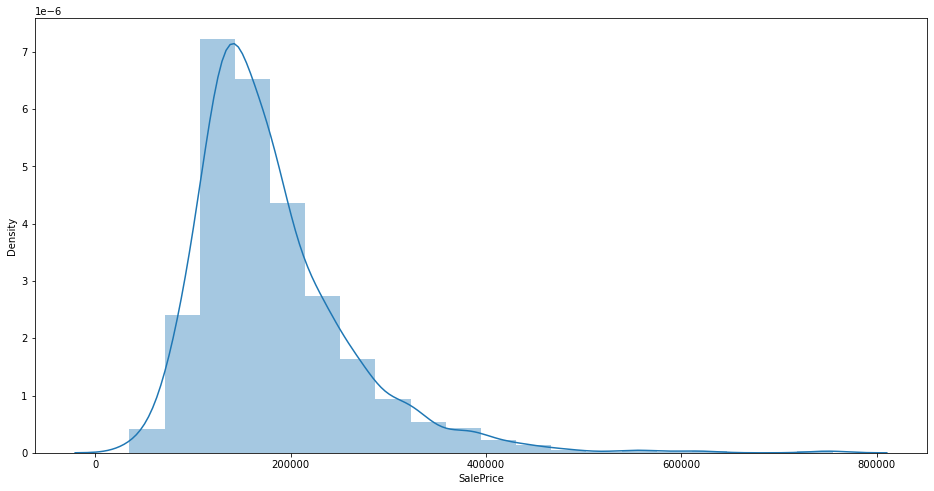

In [67]:
sns.distplot(df['SalePrice'], bins=20);

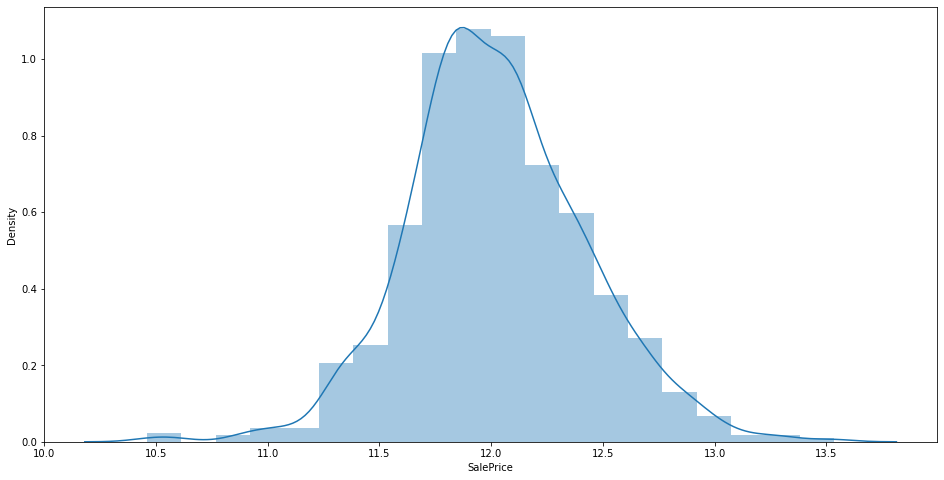

In [68]:
df['SalePrice'] = np.log(df['SalePrice'])
sns.distplot(df['SalePrice'], bins=20);

In [69]:
df['TotPorchSF'] = df['OpenPorchSF'] + df['ScreenPorch'] + df['3SsnPorch'] + df['EnclosedPorch']

SalePrice 1459 (49.98%)
LotFrontage 486 (16.65%)
GarageYrBlt 159 (5.45%)
MasVnrArea 23 (0.79%)
BsmtFullBath 2 (0.07%)
BsmtHalfBath 2 (0.07%)
BsmtFinSF1 1 (0.03%)
BsmtFinSF2 1 (0.03%)
BsmtUnfSF 1 (0.03%)
TotalBsmtSF 1 (0.03%)
GarageCars 1 (0.03%)
GarageArea 1 (0.03%)


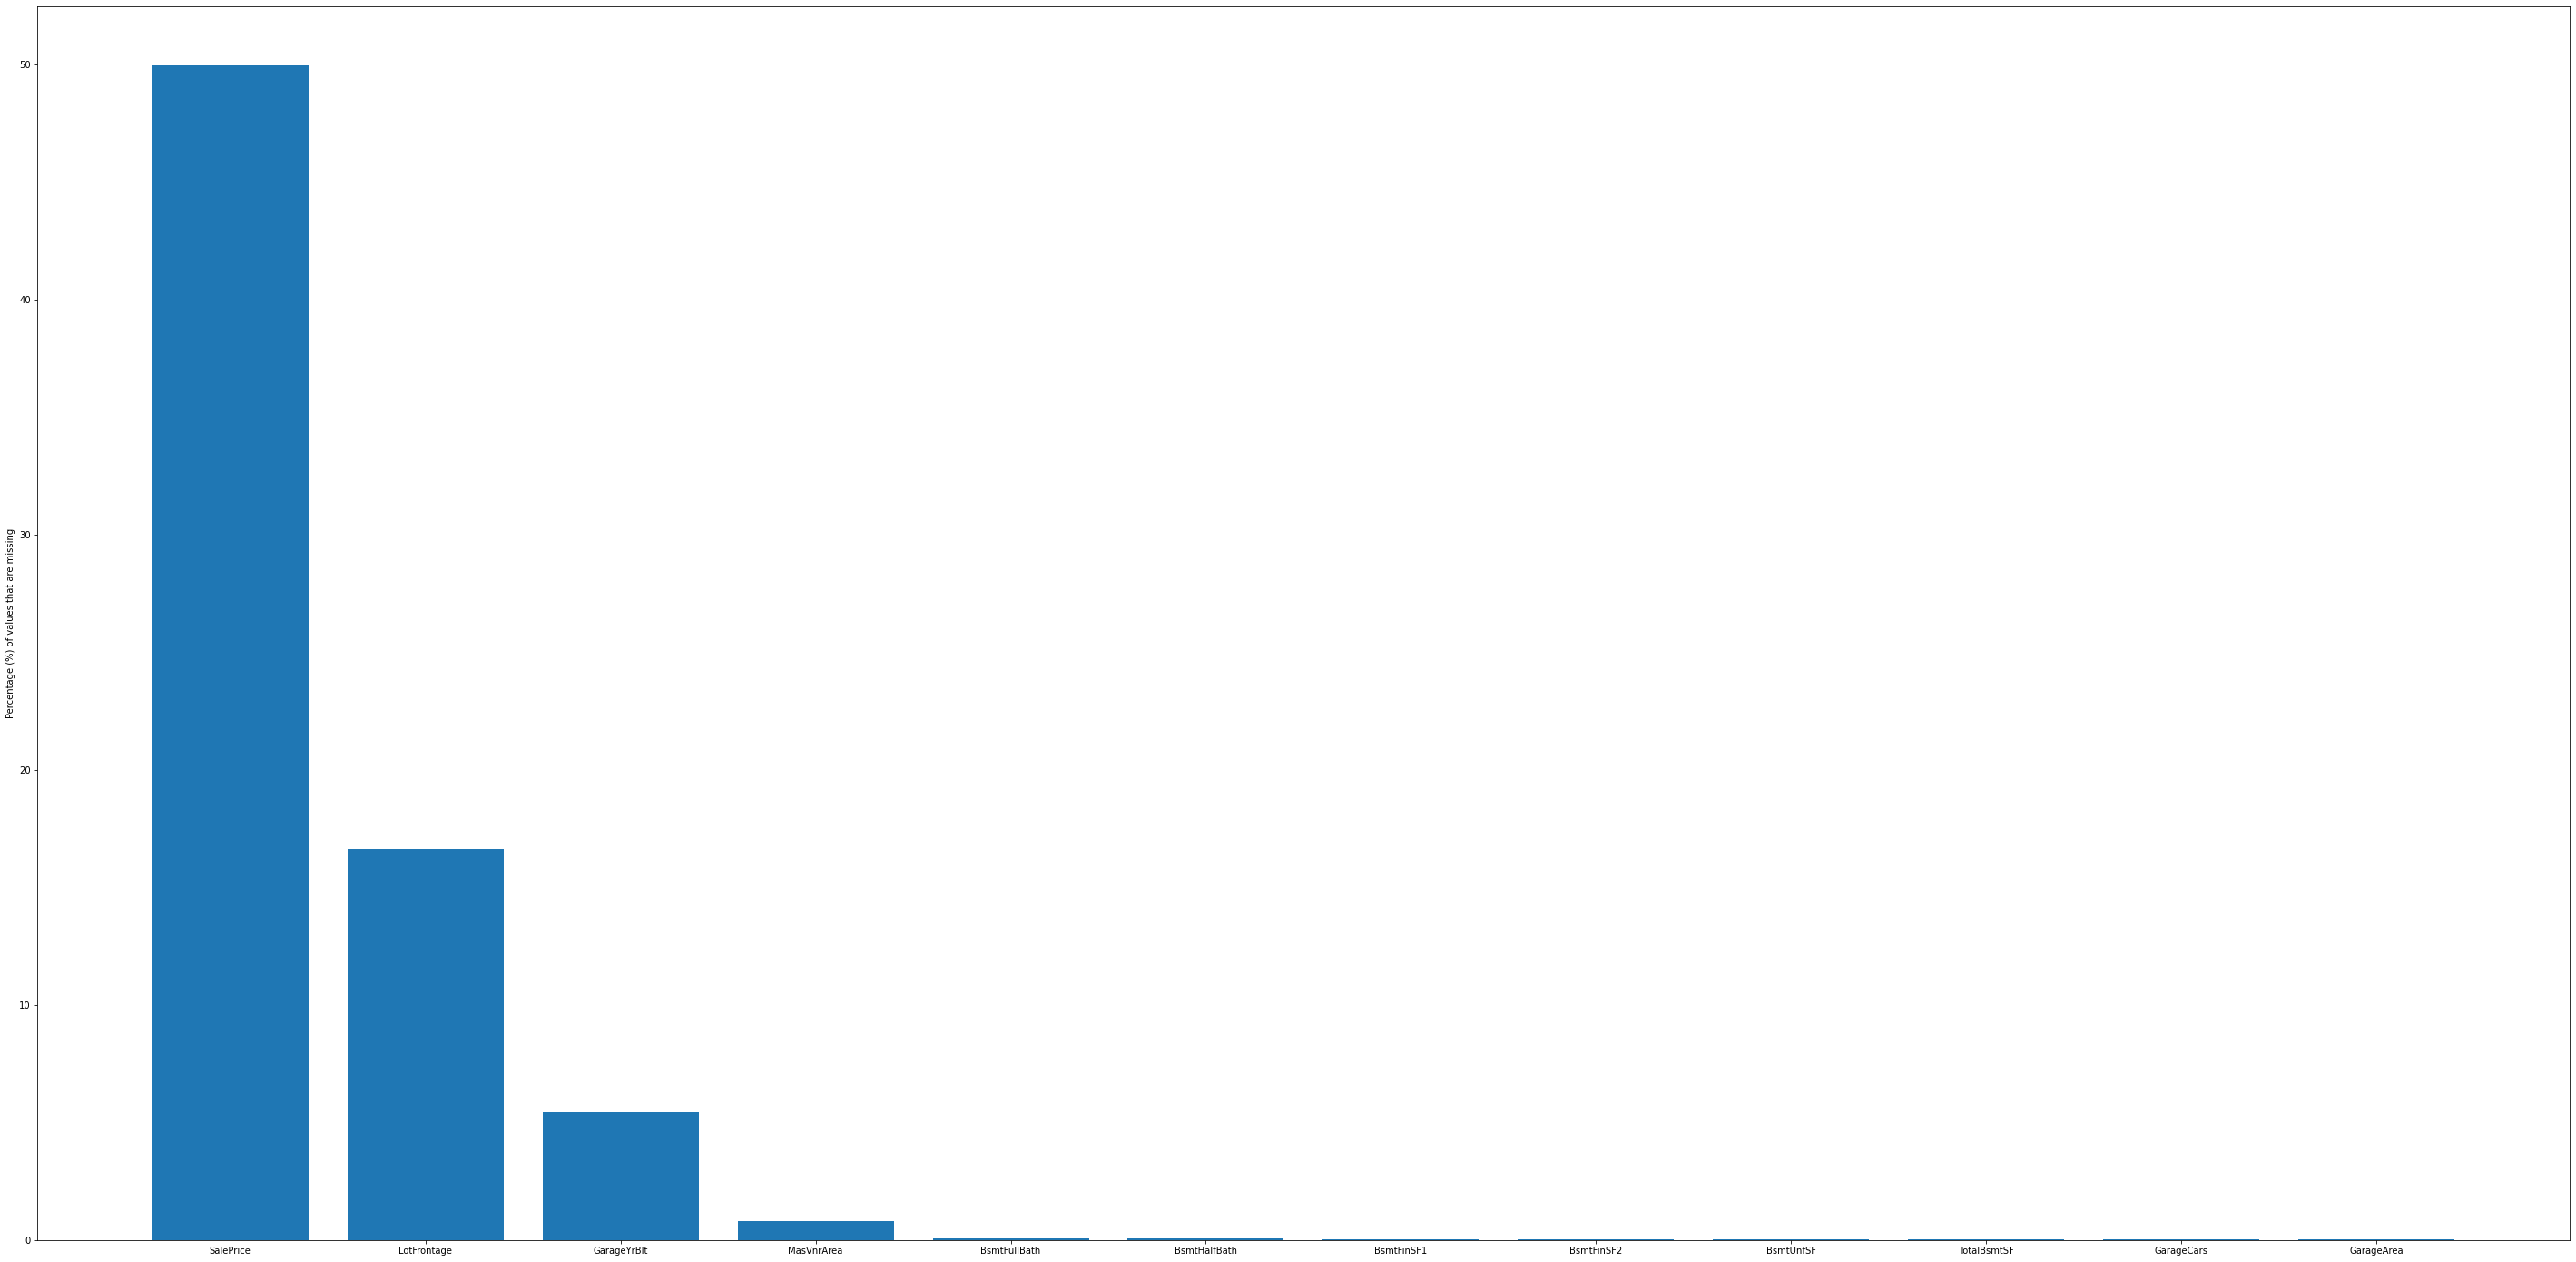

In [70]:
missing_features(df, df_num_features)

In [71]:
df.loc[df['GarageArea'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotPorchSF
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2577,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,NaN,212


In [72]:
df['TotalBsmtSF'].isna().sum()

1

In [73]:
df.groupby(['Neighborhood'])['MasVnrArea'].mean()

Neighborhood
Blmngtn     41.642857
Blueste      0.000000
BrDale     363.900000
BrkSide     10.861111
ClearCr     89.681818
CollgCr     98.203774
Crawfor     93.196078
Edwards     49.668394
Gilbert     40.400000
IDOTRR      14.225806
MeadowV      7.270270
Mitchel     53.859649
NAmes       92.246050
NPkVill      0.000000
NWAmes     170.786260
NoRidge    417.338028
NridgHt    334.969512
OldTown     14.292887
SWISU       14.937500
Sawyer      48.092715
SawyerW     65.887097
Somerst    145.558140
StoneBr    211.156863
Timber     182.408451
Veenker    139.000000
Name: MasVnrArea, dtype: float64

In [74]:
df['BsmtUnfSF']

Id
1       150.0
2       284.0
3       434.0
4       540.0
5       490.0
        ...  
2915    546.0
2916    294.0
2917      0.0
2918    575.0
2919    238.0
Name: BsmtUnfSF, Length: 2919, dtype: float64

In [75]:
df['LotFrontage'] = df['LotFrontage'].fillna(df.groupby(['Neighborhood'])['LotFrontage'].transform('mean'))
df.loc[:, 'GarageYrBlt'].fillna(df['YearBuilt'], inplace=True)
df['MasVnrArea'] = df['MasVnrArea'].fillna(df.groupby(['Neighborhood'])['MasVnrArea'].transform('mean'))
df.loc[:, 'BsmtFullBath'].fillna(0, inplace=True)
df.loc[:, 'BsmtHalfBath'].fillna(0, inplace=True)
df['BsmtBath'] = df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
df.loc[:, 'GarageCars'].fillna(0, inplace=True)
# df['BuildingAge'] = max(df['YearBuilt']) - df['YearBuilt']
# df['YearRemodAdd'] = max(df['YearBuilt']) - df['YearRemodAdd']
# df['GarageYrBlt'] = max(df['YearBuilt']) - df['GarageYrBlt']
df['BsmtBath'] = df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
df['Bath'] = df['FullBath'] + 0.5 * df['HalfBath']
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
df['GarageArea'] = df['GarageArea'].fillna(0)

In [76]:
# target_variable = df_train['SalePrice']
df = pd.concat([df_train, df_test])

In [77]:
df['SalePrice'] = np.log(df['SalePrice'])

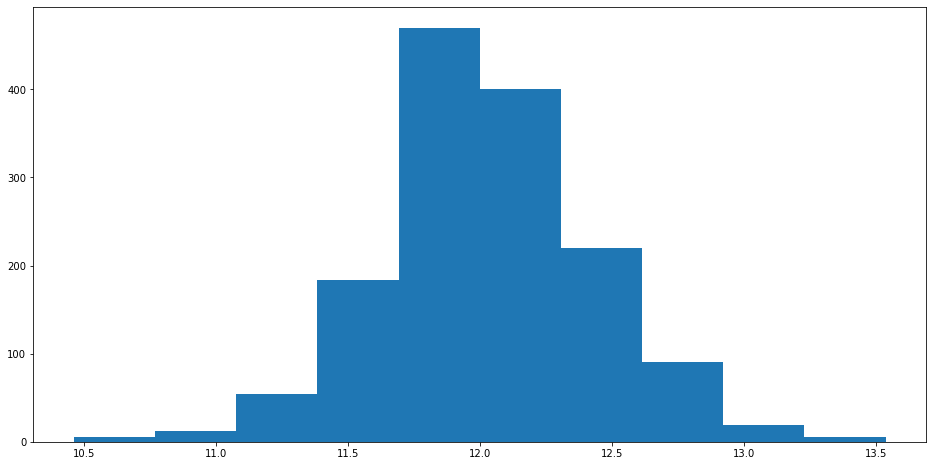

In [78]:
plt.hist(df['SalePrice']);

# Работа с фичами

Заполняем пропуски

In [79]:
# for i in df.columns:
#     plt.hist(df[i]);

In [80]:
# df.columns.tolist()

In [81]:
# df['BsmtExposure'].value_counts()

#isnull().sum()
#value_counts()

df['MSZoning'] = df['MSZoning'].fillna('RL')
df['Utilities'] = df['Utilities'].fillna('AllPub')
df['Exterior1st'] = df['Exterior1st'].fillna('VinylSd')
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(0.0)

np.where(df['BsmtQual'].isna(), 0, 1)
df['Bsmt'] = np.where(df['BsmtQual'].isna(), 0, 1)
df.loc[df['BsmtQual'].notna()][['BsmtQual', 'Bsmt']]
df['Bsmt'] = [0 if i == 'NA' else 1 for i in df['BsmtQual']]
df['Bsmt'].value_counts()

# df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna('Unf')
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0.0)
df['KitchenQual'] = df['KitchenQual'].fillna('TA')
df['Functional'] = df['Functional'].fillna('Typ')
df['GarageCars'] = df['GarageCars'].fillna(0.0)
df['GarageArea'] = df['GarageArea'].fillna(0.0)

df['Centralair'] = [1 if i == 'Y' else 0 for i in df['CentralAir']]
df = df.drop(['CentralAir'], axis=1)

df['Electrical'] = df['Electrical'].fillna('SBrkr')
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0.0)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0.0)
df['SaleType'] = df['SaleType'].fillna('WD')


In [82]:
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0.0)
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0.0)
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0.0)
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0.0)
df['GarageCars'] = df['GarageCars'].fillna(1)
df['GarageArea'] = df['GarageArea'].fillna(np.mean(df['GarageArea']))

In [83]:
df['TotalSqFt'] = df['1stFlrSF'] + df['2ndFlrSF']

Создаем столбцы для категориальных данных

In [84]:
df = pd.DataFrame(pd.get_dummies(data = df, columns = ['SaleCondition', 
                                                       'MSZoning', 
                                                       'Street', 
                                                       'LotShape', 
                                                       'LandContour', 
                                                       'LotConfig', 
                                                       'Condition1', 
                                                       'Condition2',  
                                                       'BldgType', 
                                                       'HouseStyle', 
                                                       'RoofStyle', 
                                                       'RoofMatl', 
                                                       'Exterior1st', 
                                                       'Exterior2nd', 
                                                       'Foundation', 
                                                       'Heating', 
                                                       'GarageType',
                                                       'GarageQual', 
                                                       'Electrical', 
                                                       'MasVnrType', 
                                                       'Functional', 
                                                       'SaleType', 
                                                       'Fence']))

In [85]:
df.isna().sum().to_frame(name="nans").query("nans > 0")["nans"]

LotFrontage      486
Alley           2721
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
FireplaceQu     1420
GarageYrBlt      159
GarageFinish     159
GarageCond       159
PoolQC          2909
MiscFeature     2814
SalePrice       1459
Name: nans, dtype: int64

In [86]:
# df = pd.concat([df, pd.get_dummies(df['BsmtCond'])], axis=1)

In [87]:
# df = pd.concat([df, pd.get_dummies(df['SaleCondition'])], axis=1)

In [88]:
# df['PavedDrive']

In [89]:
Paved_Drive = ['P','N','Y']
encoder = OrdinalEncoder(categories = [Paved_Drive])
df['PavedDrive'] = encoder.fit_transform(df[['PavedDrive']])

In [90]:
df['BsmtQual'] = df['BsmtQual'].fillna('NA')
df['BsmtCond'] = df['BsmtCond'].fillna('NA')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NA')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NA')

In [91]:
# df['Utilities'].unique()

In [92]:
# df['KitchenQual'].unique()

In [93]:
dict_utilities = ['NoSeWa', 'AllPub']
encoder = OrdinalEncoder(categories = [dict_utilities])
df['Utilities'] = encoder.fit_transform(df[['Utilities']])

dict_landslope = ['Sev', 'Mod', 'Gtl']
encoder = OrdinalEncoder(categories = [dict_landslope])
df['LandSlope'] = encoder.fit_transform(df[['LandSlope']])

dict_exterqual = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
encoder = OrdinalEncoder(categories = [dict_exterqual])
df['ExterQual'] = encoder.fit_transform(df[['ExterQual']])

dict_extercond = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
encoder = OrdinalEncoder(categories = [dict_extercond])
df['ExterCond'] = encoder.fit_transform(df[['ExterCond']])

dict_bsmtqual = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
encoder = OrdinalEncoder(categories = [dict_bsmtqual])
df['BsmtQual'] = encoder.fit_transform(df[['BsmtQual']])   

dict_bsmtcond = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
encoder = OrdinalEncoder(categories = [dict_bsmtcond])
df['BsmtCond'] = encoder.fit_transform(df[['BsmtCond']])  

dict_bsmtfintype1 = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
encoder = OrdinalEncoder(categories = [dict_bsmtfintype1])
df['BsmtFinType1'] = encoder.fit_transform(df[['BsmtFinType1']]) 

dict_bsmtfintype2 = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
encoder = OrdinalEncoder(categories = [dict_bsmtfintype2])
df['BsmtFinType2'] = encoder.fit_transform(df[['BsmtFinType2']])

dict_heatingqc = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
encoder = OrdinalEncoder(categories = [dict_heatingqc])
df['HeatingQC'] = encoder.fit_transform(df[['HeatingQC']])

dict_kitchenqual = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
encoder = OrdinalEncoder(categories = [dict_kitchenqual])
df['KitchenQual'] = encoder.fit_transform(df[['KitchenQual']])

In [94]:
# df = df.drop(['MasVnrType_BrkCmn'], axis = 1)

In [95]:
# {'SWISU': 25,
# ?'SWISU'University Village / Schilletter Village: 23
# 'Somerst': 22
# 'NoRidge': 22
# Onion Creek: 21
# Bloomington / Shipley: 20
# 'Blmngtn' / Top-O-Hollow: 19
# Ontario: 18
# Timber East / State Ave: 17
# South Campus Area: 16}

In [96]:
# Blmngtn	Bloomington Heights 6
# Blueste	Bluestem 1
# BrDale	Briardale 5
# BrkSide	Brookside 1
# ClearCr	Clear Creek 3
# CollgCr	College Creek 2
# Crawfor	Crawford 6
# Edwards	Edwards 1
# Gilbert	Gilbert 6
# IDOTRR	Iowa DOT and Rail Road 6
# MeadowV	Meadow Village 4
# Mitchel	Mitchell 3
# Names	North Ames 1
# NoRidge	Northridge 3
# NPkVill	Northpark Villa 5
# NridgHt	Northridge Heights 4
# NWAmes	Northwest Ames 5
# OldTown	Old Town 1
# SWISU	South & West of Iowa State University 5
# Sawyer	Sawyer 4
# SawyerW	Sawyer West 5
# Somerst	Somerset 4
# StoneBr	Stone Brook 2
# Timber	Timberland 4
# Veenker	Veenker 3

In [97]:
Neigh_dict = {'Blmngtn': 6, 'Blueste': 1, 'BrDale': 5, 'BrkSide': 1, 'ClearCr': 3, 'CollgCr': 2, 'Crawfor': 6, 'Edwards': 1,
'Gilbert': 6, 'IDOTRR': 6, 'MeadowV': 4, 'Mitchel': 3, 'NAmes': 1, 'NoRidge': 3, 'NPkVill': 5, 'NridgHt': 4,
'NWAmes': 5, 'OldTown': 1, 'SWISU': 5, 'Sawyer': 4, 'SawyerW': 5, 'Somerst': 4, 'StoneBr': 2, 'Timber': 4,
'Veenker': 3}

In [98]:
df['Neighborhood'].map(Neigh_dict)

Id
1       2
2       3
3       2
4       6
5       3
       ..
2915    4
2916    4
2917    3
2918    3
2919    3
Name: Neighborhood, Length: 2919, dtype: int64

In [99]:
df['Neighborhood_Criminal'] = df['Neighborhood'].map(Neigh_dict)

In [100]:
df = pd.concat([df, pd.get_dummies(df['Neighborhood'], prefix='Neighborhood')], axis=1)

In [101]:
df['Neighborhood_Criminal']

Id
1       2
2       3
3       2
4       6
5       3
       ..
2915    4
2916    4
2917    3
2918    3
2919    3
Name: Neighborhood_Criminal, Length: 2919, dtype: int64

Удаляем ненужные столбцы

<AxesSubplot:>

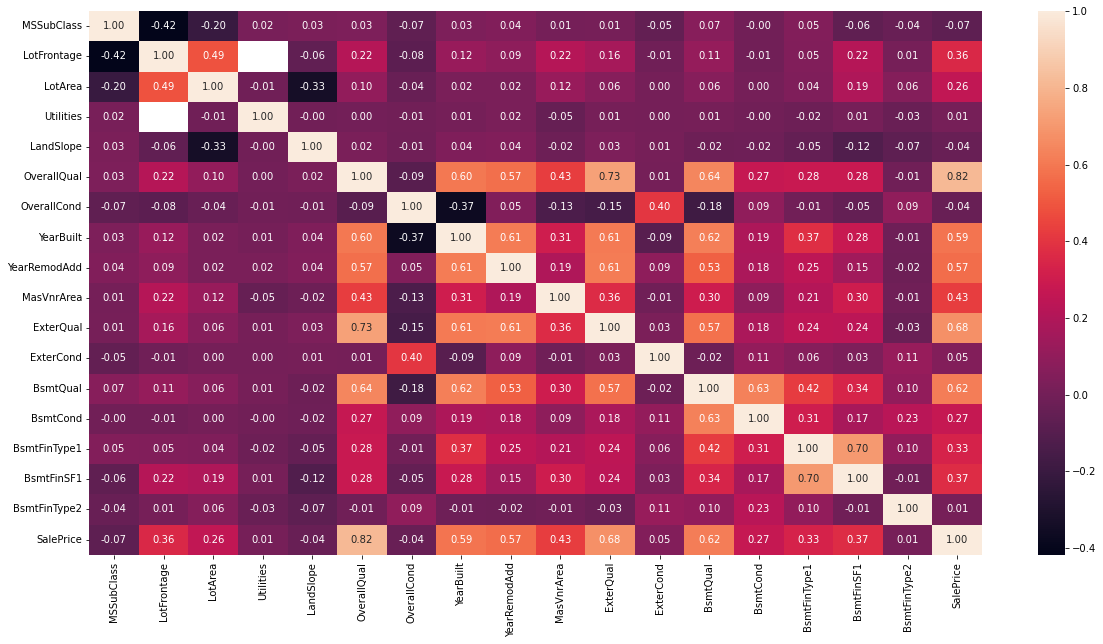

In [102]:


plt.figure(figsize=(20,10))
sns.heatmap(
    pd.concat([df.iloc[:,:20], df['SalePrice']], axis=1).corr(),
    annot=True,
    fmt='.2f'
)

In [103]:
df = df.drop(['LotFrontage','Alley', 'BsmtExposure', 'LowQualFinSF', 'FireplaceQu', 'PoolQC', 'MiscFeature', 'GarageYrBlt', 'GarageFinish', 'GarageCond'], axis=1)

In [104]:
df.columns.tolist()

['MSSubClass',
 'LotArea',
 'Utilities',
 'LandSlope',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'Bsmt',
 'Centralair',
 'TotalSqFt',
 'SaleCondition_Abnorml',
 'SaleCondition_AdjLand',
 'SaleCondition_Alloca',
 'SaleCondition_Family',
 'SaleCondition_Normal',
 'SaleCondition_Partial',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR

In [47]:
# df = df.drop(['MasVnrType_BrkFace'], axis = 1)

In [55]:
df = df.drop(['Neighborhood'], axis=1)

In [58]:
df.to_csv('prepared_dataframe', index=False, encoding='utf-8')

## Отбор числовых фичей

In [250]:
# df_num_features = df.select_dtypes(include=['float64', 'int64', 'uint8'])

In [251]:
df_num_features = df

In [252]:
for i in df_num_features:
    if df_num_features[i].sum() < 30:
        print(f"'{i}', ")
#     print(sum(df[i]))
    

TypeError: '<' not supported between instances of 'str' and 'int'

In [253]:
df_num_features = df_num_features.drop(['SaleCondition_AdjLand', 
'SaleCondition_Alloca', 
'MSZoning_C (all)', 
'MSZoning_RH', 
'Street_Grvl', 
'LotShape_IR3', 
'LotConfig_FR3', 
'Condition1_PosA', 
'Condition1_RRAe', 
'Condition1_RRNe', 
'Condition1_RRNn', 
'Condition2_Artery', 
'Condition2_Feedr', 
'Condition2_PosA', 
'Condition2_PosN', 
'Condition2_RRAe', 
'Condition2_RRAn', 
'Condition2_RRNn', 
'HouseStyle_1.5Unf', 
'HouseStyle_2.5Fin', 
'HouseStyle_2.5Unf', 
'RoofStyle_Flat', 
'RoofStyle_Gambrel', 
'RoofStyle_Mansard', 
'RoofStyle_Shed', 
'RoofMatl_ClyTile', 
'RoofMatl_Membran', 
'RoofMatl_Metal', 
'RoofMatl_Roll', 
'RoofMatl_Tar&Grv', 
'RoofMatl_WdShake', 
'RoofMatl_WdShngl', 
'Exterior1st_AsphShn', 
'Exterior1st_BrkComm', 
'Exterior1st_CBlock', 
'Exterior1st_ImStucc', 
'Exterior1st_Stone', 
'Exterior2nd_AsphShn', 
'Exterior2nd_Brk Cmn', 
'Exterior2nd_CBlock', 
'Exterior2nd_ImStucc', 
'Exterior2nd_Other', 
'Exterior2nd_Stone', 
'Foundation_Stone', 
'Foundation_Wood', 
'Heating_Floor', 
'Heating_GasW', 
'Heating_Grav', 
'Heating_OthW', 
'Heating_Wall', 
'GarageType_2Types', 
'GarageType_CarPort', 
'GarageQual_Ex', 
'GarageQual_Gd', 
'GarageQual_Po', 
'Electrical_FuseP', 
'Electrical_Mix', 
'Functional_Maj1', 
'Functional_Maj2', 
'Functional_Sev', 
'SaleType_CWD', 
'SaleType_Con', 
'SaleType_ConLD', 
'SaleType_ConLI', 
'SaleType_ConLw', 
'SaleType_Oth', 
'Fence_MnWw', 
'Neighborhood_Blmngtn', 
'Neighborhood_Blueste', 
'Neighborhood_NPkVill', 
'Neighborhood_Veenker'], axis = 1)

In [254]:
df_num_features.shape

(2919, 157)

In [255]:
# df_num_features = df_num_features.drop(['LotFrontage', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt'], axis = 1)

## Разделение на Train и Test

In [256]:
df.isna().sum().to_frame(name="nans").query("nans > 0")["nans"]

SalePrice    1459
Name: nans, dtype: int64

In [257]:
df = df.drop(['Neighborhood'], axis = 1)

In [258]:
df_cat_features = df.select_dtypes(include=['object'])

In [259]:
df_train = df.iloc[:1460]

In [260]:
X = df_train.drop(['SalePrice'], axis=1)
y = df_train['SalePrice']

In [265]:
df_test = df_num_features.iloc[1460:]
df_test = df_test.drop(['SalePrice'], axis=1)
df_test = df_test.drop(['Neighborhood'], axis = 1)

## Нормирование

In [266]:
df_test.select_dtypes('object')

""
Id
1461
1462
1463
1464
1465
...
2915
2916
2917


In [267]:
rs_scaler = RobustScaler(quantile_range=(25, 75))
scaled_X = rs_scaler.fit_transform(X) 
scaled_X_test = rs_scaler.fit_transform(df_test)

In [268]:
# scaled_X = pd.DataFrame(scaled_X, columns = X.columns)
# scaled_X_test = pd.DataFrame(scaled_X, columns = X.columns)

## Разделение на Train и Valid

In [269]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.25)

In [270]:
# X_train_scaled, X_valid_scaled, y_train_scaled, y_valid_scaled = train_test_split(scaled_X, y, test_size=.25)

In [271]:
df.columns.tolist()

['MSSubClass',
 'LotArea',
 'Utilities',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'Bsmt',
 'Centralair',
 'TotalSqFt',
 'SaleCondition_Abnorml',
 'SaleCondition_AdjLand',
 'SaleCondition_Alloca',
 'SaleCondition_Family',
 'SaleCondition_Normal',
 'SaleCondition_Partial',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Grvl',
 'Street_Pave',
 'LotShape_IR1',
 'LotShape_IR

### Linear Regression

In [272]:
LR = LinearRegression(fit_intercept= True, n_jobs=-1)
LR.fit(X_train, y_train) # обучаем модель линейной регрессии на обучающей части датасета
print("train rmse:", np.sqrt(mean_squared_error(LR.predict(X_train), y_train)))
print("valid rmse:", np.sqrt(mean_squared_error(LR.predict(X_valid), y_valid)))

train rmse: 0.08809762173324685
valid rmse: 0.164083624015979


In [273]:
LR_cv_scores = model_selection.cross_val_score(LR, X, y, cv=5, scoring = 'neg_mean_squared_error')
LR_cv_scores = np.mean(np.sqrt(-LR_cv_scores))
LR_cv_scores

362022.3030355535

In [2705]:
SVC = SVC(C=1, kernel='rbf', degree=1) 
SVC.fit(X_train, y_train)

ValueError: could not convert string to float: 'Edwards'

### Decision Tree

In [274]:
DTR = DecisionTreeRegressor(criterion='mse',
                             max_depth=11, 
                             min_samples_split=20, 
                             min_samples_leaf=2,
                             min_impurity_decrease=0)

# (criterion='mse',
#                              max_depth=8, 
#                              min_samples_split=20, 
#                              min_samples_leaf=3,
#                              min_impurity_decrease=0.0001)

# (criterion='mse',
#                              max_depth=10, 
#                              min_samples_split=3, 
#                              min_samples_leaf=1,
#                              min_impurity_decrease=0.0005)

# (max_depth=11, min_impurity_decrease=0, min_samples_leaf=2,
#                       min_samples_split=20)

DTR.fit(X_train, y_train)
print("train rmse:", np.sqrt(mean_squared_error(DTR.predict(X_train), y_train)))
print("valid rmse:", np.sqrt(mean_squared_error(DTR.predict(X_valid), y_valid)))

train rmse: 0.10320054743719262
valid rmse: 0.18997848261640132


In [275]:
rfm_scores = model_selection.cross_val_score(DTR, X, y, cv=5, scoring = 'neg_mean_squared_error')
np.mean(np.sqrt(-rfm_scores))

0.18513931474343678

In [276]:
# DTR = DecisionTreeRegressor()
# params = {
#     'max_depth': [4,5,6,7,8,9,10,11,12], 
#     'min_samples_split': [2,3,4,5,10,20,50,80,100], 
#     'min_samples_leaf': [1,2,3,4,5],
#     'min_impurity_decrease': [0, 0.01, 0.001, 0.0001]
# }

# # cross-validation 
# DTR_cv = GridSearchCV(DTR, param_grid=params, scoring='neg_mean_squared_error', cv=5, 
#                   n_jobs=4)

In [277]:
# DTR_cv.fit(X, y)

In [278]:
# DTR_cv.best_estimator_

In [279]:
# np.sqrt(-DTR_cv.best_score_)

### Random Forest

In [184]:
RFM = RandomForestRegressor(n_estimators=13, 
                            max_depth=8) 
#                             criterion='mse', 
#                             min_samples_split=6, 
#                             min_samples_leaf=3,
#                             min_impurity_decrease=0.0005)
# (n_estimators=9, 
#                             max_depth=8, 
# #                             criterion='mse', 
#                             min_samples_split=6, 
#                             min_samples_leaf=3,
#                             min_impurity_decrease=0.0005)

# (n_estimators=8, 
#                             max_depth=15, 
# #                             criterion='mse', 
#                             min_samples_split=3, 
#                             min_samples_leaf=1,
#                             min_impurity_decrease=0.0005)

RFM.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=13)

In [185]:
print("train acc:", np.sqrt(mean_squared_error(RFM.predict(X_train), y_train)))
print("test acc:", np.sqrt(mean_squared_error(RFM.predict(X_valid), y_valid)))

train acc: 0.08182091529162795
test acc: 0.1512735834379818


In [186]:
rfm_scores = model_selection.cross_val_score(RFM, X, y, cv=5, scoring = 'neg_mean_squared_error')
np.mean(np.sqrt(-rfm_scores))

0.1482012167231007

In [2352]:
# RFM = RandomForestRegressor(criterion='mse',
#                              min_samples_split=3, 
#                              min_samples_leaf=1,
#                              min_impurity_decrease=0.0005)

# params = {
#     'n_estimators': [3,5,7,8,9,10,11,12,13,15], 
#     'max_depth': [3,4,5,6,7,8]
# }

# RFM_cv = GridSearchCV(rfm, param_grid=params, scoring='neg_mean_squared_error', cv=5, 
#                   n_jobs=4)

In [2353]:
# RFM_cv.fit(X, y)

In [2354]:
# RFM_cv.best_estimator_

In [2355]:
# np.sqrt(-RFM_cv.best_score_)

In [2356]:
# print("train rmse:", np.sqrt(mean_squared_error(RFM_cv.predict(X_train), y_train)))
# print("train rmse:", np.sqrt(mean_squared_error(RFM_cv.predict(X_valid), y_valid)))

### CatBoost

In [280]:
# for i in df_num_features:
#     df_num_features[i].isna() = 'NA'

In [188]:
X_train.iloc[:,:60].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 1182 to 472
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             1095 non-null   int64  
 1   LotArea                1095 non-null   int64  
 2   Utilities              1095 non-null   float64
 3   LandSlope              1095 non-null   float64
 4   OverallQual            1095 non-null   int64  
 5   OverallCond            1095 non-null   int64  
 6   YearBuilt              1095 non-null   int64  
 7   YearRemodAdd           1095 non-null   int64  
 8   MasVnrArea             1095 non-null   float64
 9   ExterQual              1095 non-null   float64
 10  ExterCond              1095 non-null   float64
 11  BsmtQual               1095 non-null   float64
 12  BsmtCond               1095 non-null   float64
 13  BsmtFinType1           1095 non-null   float64
 14  BsmtFinSF1             1095 non-null   float64
 15  Bs

In [193]:
cb = CatBoostRegressor(iterations = 1000,
                        learning_rate=0.5,
                        depth=4,
                        l2_leaf_reg=0.1,
                        rsm=None,
                        loss_function='RMSE')
# ,
#                         cat_features=[1,3,4,5,6,7,8,9,10,11,12,13,18,19,20,21,22,24,25,26,27,28,29,31,32,33,36,37,47,49,51,54,55])

# (iterations = 30,
#                         learning_rate=0.5,
#                         depth=None,
#                         l2_leaf_reg=0.5,
#                         rsm=None,
#                         loss_function='RMSE')

# 'depth': 4, 'iterations': 28, 'l2_leaf_reg': 0.1, 'learning_rate': 0.5

In [194]:
cb.fit(X_train, y_train)

0:	learn: 0.2874385	total: 823us	remaining: 823ms
1:	learn: 0.2351180	total: 1.68ms	remaining: 839ms
2:	learn: 0.2005113	total: 2.3ms	remaining: 765ms
3:	learn: 0.1794641	total: 2.89ms	remaining: 721ms
4:	learn: 0.1670937	total: 3.52ms	remaining: 700ms
5:	learn: 0.1609953	total: 4.1ms	remaining: 679ms
6:	learn: 0.1532558	total: 4.67ms	remaining: 663ms
7:	learn: 0.1453746	total: 5.23ms	remaining: 649ms
8:	learn: 0.1404654	total: 5.85ms	remaining: 644ms
9:	learn: 0.1366546	total: 6.41ms	remaining: 634ms
10:	learn: 0.1318516	total: 6.96ms	remaining: 626ms
11:	learn: 0.1282420	total: 7.53ms	remaining: 620ms
12:	learn: 0.1235781	total: 8.25ms	remaining: 626ms
13:	learn: 0.1217267	total: 8.83ms	remaining: 622ms
14:	learn: 0.1193750	total: 9.46ms	remaining: 621ms
15:	learn: 0.1172861	total: 10ms	remaining: 618ms
16:	learn: 0.1151202	total: 10.6ms	remaining: 615ms
17:	learn: 0.1119736	total: 11.3ms	remaining: 614ms
18:	learn: 0.1095753	total: 11.9ms	remaining: 612ms
19:	learn: 0.1068194	total:

332:	learn: 0.0086057	total: 194ms	remaining: 388ms
333:	learn: 0.0085852	total: 195ms	remaining: 388ms
334:	learn: 0.0085302	total: 195ms	remaining: 388ms
335:	learn: 0.0084896	total: 196ms	remaining: 387ms
336:	learn: 0.0084312	total: 197ms	remaining: 387ms
337:	learn: 0.0083266	total: 197ms	remaining: 386ms
338:	learn: 0.0082381	total: 198ms	remaining: 386ms
339:	learn: 0.0081701	total: 199ms	remaining: 386ms
340:	learn: 0.0081337	total: 199ms	remaining: 385ms
341:	learn: 0.0080949	total: 200ms	remaining: 385ms
342:	learn: 0.0080347	total: 201ms	remaining: 384ms
343:	learn: 0.0079302	total: 201ms	remaining: 384ms
344:	learn: 0.0078811	total: 202ms	remaining: 383ms
345:	learn: 0.0078389	total: 203ms	remaining: 383ms
346:	learn: 0.0078142	total: 203ms	remaining: 382ms
347:	learn: 0.0077572	total: 204ms	remaining: 382ms
348:	learn: 0.0077018	total: 204ms	remaining: 381ms
349:	learn: 0.0076736	total: 205ms	remaining: 381ms
350:	learn: 0.0076434	total: 206ms	remaining: 380ms
351:	learn: 

637:	learn: 0.0019292	total: 387ms	remaining: 219ms
638:	learn: 0.0019282	total: 387ms	remaining: 219ms
639:	learn: 0.0019261	total: 388ms	remaining: 218ms
640:	learn: 0.0019184	total: 389ms	remaining: 218ms
641:	learn: 0.0019122	total: 389ms	remaining: 217ms
642:	learn: 0.0019068	total: 390ms	remaining: 216ms
643:	learn: 0.0019031	total: 390ms	remaining: 216ms
644:	learn: 0.0018960	total: 391ms	remaining: 215ms
645:	learn: 0.0018897	total: 392ms	remaining: 215ms
646:	learn: 0.0018882	total: 392ms	remaining: 214ms
647:	learn: 0.0018789	total: 393ms	remaining: 213ms
648:	learn: 0.0018744	total: 393ms	remaining: 213ms
649:	learn: 0.0018733	total: 394ms	remaining: 212ms
650:	learn: 0.0018696	total: 394ms	remaining: 211ms
651:	learn: 0.0018621	total: 395ms	remaining: 211ms
652:	learn: 0.0018586	total: 396ms	remaining: 210ms
653:	learn: 0.0018544	total: 396ms	remaining: 210ms
654:	learn: 0.0018489	total: 397ms	remaining: 209ms
655:	learn: 0.0018378	total: 397ms	remaining: 208ms
656:	learn: 

957:	learn: 0.0012553	total: 579ms	remaining: 25.4ms
958:	learn: 0.0012551	total: 580ms	remaining: 24.8ms
959:	learn: 0.0012550	total: 580ms	remaining: 24.2ms
960:	learn: 0.0012547	total: 581ms	remaining: 23.6ms
961:	learn: 0.0012543	total: 582ms	remaining: 23ms
962:	learn: 0.0012542	total: 582ms	remaining: 22.4ms
963:	learn: 0.0012540	total: 583ms	remaining: 21.8ms
964:	learn: 0.0012537	total: 584ms	remaining: 21.2ms
965:	learn: 0.0012533	total: 584ms	remaining: 20.6ms
966:	learn: 0.0012529	total: 585ms	remaining: 20ms
967:	learn: 0.0012528	total: 585ms	remaining: 19.4ms
968:	learn: 0.0012527	total: 586ms	remaining: 18.7ms
969:	learn: 0.0012523	total: 587ms	remaining: 18.1ms
970:	learn: 0.0012521	total: 587ms	remaining: 17.5ms
971:	learn: 0.0012519	total: 588ms	remaining: 16.9ms
972:	learn: 0.0012512	total: 588ms	remaining: 16.3ms
973:	learn: 0.0012510	total: 589ms	remaining: 15.7ms
974:	learn: 0.0012508	total: 590ms	remaining: 15.1ms
975:	learn: 0.0012502	total: 590ms	remaining: 14.5

In [195]:
print("train rmse:", np.sqrt(mean_squared_error(cb.predict(X_train), y_train)))
print("train rmse:", np.sqrt(mean_squared_error(cb.predict(X_valid), y_valid)))

train rmse: 0.0012433857607375893
train rmse: 0.145032981952387


In [196]:
cb_scores = model_selection.cross_val_score(cb, X, y, cv=5, scoring = 'neg_mean_squared_error')
np.mean(np.sqrt(-cb_scores))

0:	learn: 0.2805024	total: 773us	remaining: 772ms
1:	learn: 0.2266594	total: 1.59ms	remaining: 793ms
2:	learn: 0.1895365	total: 2.21ms	remaining: 734ms
3:	learn: 0.1724210	total: 2.81ms	remaining: 700ms
4:	learn: 0.1619586	total: 3.43ms	remaining: 683ms
5:	learn: 0.1510798	total: 4.06ms	remaining: 672ms
6:	learn: 0.1464704	total: 4.65ms	remaining: 659ms
7:	learn: 0.1433016	total: 5.23ms	remaining: 648ms
8:	learn: 0.1402486	total: 5.83ms	remaining: 642ms
9:	learn: 0.1367996	total: 6.43ms	remaining: 637ms
10:	learn: 0.1339657	total: 7.01ms	remaining: 631ms
11:	learn: 0.1321283	total: 7.61ms	remaining: 626ms
12:	learn: 0.1292513	total: 8.23ms	remaining: 625ms
13:	learn: 0.1265421	total: 8.81ms	remaining: 621ms
14:	learn: 0.1231876	total: 9.42ms	remaining: 619ms
15:	learn: 0.1207895	total: 10.1ms	remaining: 622ms
16:	learn: 0.1172002	total: 10.8ms	remaining: 624ms
17:	learn: 0.1143821	total: 11.4ms	remaining: 621ms
18:	learn: 0.1117819	total: 12ms	remaining: 620ms
19:	learn: 0.1092854	tota

324:	learn: 0.0095018	total: 194ms	remaining: 403ms
325:	learn: 0.0094389	total: 195ms	remaining: 403ms
326:	learn: 0.0093649	total: 195ms	remaining: 402ms
327:	learn: 0.0093323	total: 196ms	remaining: 402ms
328:	learn: 0.0092908	total: 197ms	remaining: 401ms
329:	learn: 0.0092530	total: 197ms	remaining: 401ms
330:	learn: 0.0092177	total: 198ms	remaining: 400ms
331:	learn: 0.0091772	total: 199ms	remaining: 400ms
332:	learn: 0.0090981	total: 199ms	remaining: 399ms
333:	learn: 0.0090710	total: 200ms	remaining: 398ms
334:	learn: 0.0090253	total: 200ms	remaining: 398ms
335:	learn: 0.0089619	total: 201ms	remaining: 397ms
336:	learn: 0.0088897	total: 202ms	remaining: 397ms
337:	learn: 0.0088346	total: 202ms	remaining: 396ms
338:	learn: 0.0087744	total: 203ms	remaining: 395ms
339:	learn: 0.0087255	total: 203ms	remaining: 395ms
340:	learn: 0.0086972	total: 204ms	remaining: 394ms
341:	learn: 0.0086445	total: 205ms	remaining: 394ms
342:	learn: 0.0085418	total: 205ms	remaining: 393ms
343:	learn: 

647:	learn: 0.0019200	total: 387ms	remaining: 210ms
648:	learn: 0.0019133	total: 387ms	remaining: 210ms
649:	learn: 0.0019110	total: 388ms	remaining: 209ms
650:	learn: 0.0019052	total: 389ms	remaining: 208ms
651:	learn: 0.0018945	total: 389ms	remaining: 208ms
652:	learn: 0.0018900	total: 390ms	remaining: 207ms
653:	learn: 0.0018768	total: 390ms	remaining: 207ms
654:	learn: 0.0018723	total: 391ms	remaining: 206ms
655:	learn: 0.0018642	total: 392ms	remaining: 205ms
656:	learn: 0.0018598	total: 392ms	remaining: 205ms
657:	learn: 0.0018565	total: 393ms	remaining: 204ms
658:	learn: 0.0018545	total: 393ms	remaining: 204ms
659:	learn: 0.0018468	total: 394ms	remaining: 203ms
660:	learn: 0.0018395	total: 395ms	remaining: 202ms
661:	learn: 0.0018353	total: 395ms	remaining: 202ms
662:	learn: 0.0018278	total: 396ms	remaining: 201ms
663:	learn: 0.0018205	total: 396ms	remaining: 201ms
664:	learn: 0.0018167	total: 397ms	remaining: 200ms
665:	learn: 0.0018126	total: 398ms	remaining: 199ms
666:	learn: 

958:	learn: 0.0012243	total: 580ms	remaining: 24.8ms
959:	learn: 0.0012241	total: 580ms	remaining: 24.2ms
960:	learn: 0.0012238	total: 581ms	remaining: 23.6ms
961:	learn: 0.0012237	total: 582ms	remaining: 23ms
962:	learn: 0.0012230	total: 582ms	remaining: 22.4ms
963:	learn: 0.0012226	total: 583ms	remaining: 21.8ms
964:	learn: 0.0012220	total: 584ms	remaining: 21.2ms
965:	learn: 0.0012215	total: 584ms	remaining: 20.6ms
966:	learn: 0.0012214	total: 585ms	remaining: 20ms
967:	learn: 0.0012209	total: 585ms	remaining: 19.4ms
968:	learn: 0.0012203	total: 586ms	remaining: 18.7ms
969:	learn: 0.0012199	total: 587ms	remaining: 18.1ms
970:	learn: 0.0012197	total: 587ms	remaining: 17.5ms
971:	learn: 0.0012194	total: 588ms	remaining: 16.9ms
972:	learn: 0.0012190	total: 588ms	remaining: 16.3ms
973:	learn: 0.0012189	total: 589ms	remaining: 15.7ms
974:	learn: 0.0012182	total: 590ms	remaining: 15.1ms
975:	learn: 0.0012178	total: 590ms	remaining: 14.5ms
976:	learn: 0.0012174	total: 591ms	remaining: 13.9

239:	learn: 0.0168336	total: 139ms	remaining: 440ms
240:	learn: 0.0166722	total: 140ms	remaining: 439ms
241:	learn: 0.0165004	total: 140ms	remaining: 439ms
242:	learn: 0.0163681	total: 141ms	remaining: 439ms
243:	learn: 0.0162253	total: 142ms	remaining: 439ms
244:	learn: 0.0161366	total: 142ms	remaining: 438ms
245:	learn: 0.0160016	total: 143ms	remaining: 438ms
246:	learn: 0.0159294	total: 144ms	remaining: 437ms
247:	learn: 0.0157038	total: 144ms	remaining: 437ms
248:	learn: 0.0155711	total: 145ms	remaining: 437ms
249:	learn: 0.0154561	total: 145ms	remaining: 436ms
250:	learn: 0.0153526	total: 146ms	remaining: 436ms
251:	learn: 0.0152617	total: 147ms	remaining: 435ms
252:	learn: 0.0151593	total: 147ms	remaining: 435ms
253:	learn: 0.0150442	total: 148ms	remaining: 434ms
254:	learn: 0.0148863	total: 148ms	remaining: 434ms
255:	learn: 0.0147638	total: 149ms	remaining: 433ms
256:	learn: 0.0146513	total: 150ms	remaining: 433ms
257:	learn: 0.0145628	total: 150ms	remaining: 432ms
258:	learn: 

559:	learn: 0.0029075	total: 332ms	remaining: 261ms
560:	learn: 0.0028806	total: 333ms	remaining: 260ms
561:	learn: 0.0028724	total: 333ms	remaining: 260ms
562:	learn: 0.0028615	total: 334ms	remaining: 259ms
563:	learn: 0.0028526	total: 335ms	remaining: 259ms
564:	learn: 0.0028240	total: 335ms	remaining: 258ms
565:	learn: 0.0028086	total: 336ms	remaining: 258ms
566:	learn: 0.0027936	total: 336ms	remaining: 257ms
567:	learn: 0.0027833	total: 337ms	remaining: 256ms
568:	learn: 0.0027621	total: 338ms	remaining: 256ms
569:	learn: 0.0027558	total: 338ms	remaining: 255ms
570:	learn: 0.0027476	total: 339ms	remaining: 255ms
571:	learn: 0.0027352	total: 340ms	remaining: 254ms
572:	learn: 0.0027293	total: 340ms	remaining: 253ms
573:	learn: 0.0027254	total: 341ms	remaining: 253ms
574:	learn: 0.0027207	total: 341ms	remaining: 252ms
575:	learn: 0.0027046	total: 342ms	remaining: 252ms
576:	learn: 0.0026930	total: 343ms	remaining: 251ms
577:	learn: 0.0026885	total: 343ms	remaining: 251ms
578:	learn: 

825:	learn: 0.0013706	total: 524ms	remaining: 110ms
826:	learn: 0.0013704	total: 525ms	remaining: 110ms
827:	learn: 0.0013691	total: 526ms	remaining: 109ms
828:	learn: 0.0013673	total: 526ms	remaining: 109ms
829:	learn: 0.0013651	total: 527ms	remaining: 108ms
830:	learn: 0.0013643	total: 528ms	remaining: 107ms
831:	learn: 0.0013628	total: 528ms	remaining: 107ms
832:	learn: 0.0013610	total: 529ms	remaining: 106ms
833:	learn: 0.0013598	total: 531ms	remaining: 106ms
834:	learn: 0.0013586	total: 531ms	remaining: 105ms
835:	learn: 0.0013574	total: 532ms	remaining: 104ms
836:	learn: 0.0013567	total: 533ms	remaining: 104ms
837:	learn: 0.0013536	total: 533ms	remaining: 103ms
838:	learn: 0.0013519	total: 534ms	remaining: 103ms
839:	learn: 0.0013498	total: 535ms	remaining: 102ms
840:	learn: 0.0013395	total: 536ms	remaining: 101ms
841:	learn: 0.0013367	total: 536ms	remaining: 101ms
842:	learn: 0.0013349	total: 537ms	remaining: 100ms
843:	learn: 0.0013342	total: 538ms	remaining: 99.4ms
844:	learn:

44:	learn: 0.0708735	total: 33.1ms	remaining: 702ms
45:	learn: 0.0701112	total: 33.8ms	remaining: 701ms
46:	learn: 0.0692738	total: 34.5ms	remaining: 699ms
47:	learn: 0.0684416	total: 35.1ms	remaining: 696ms
48:	learn: 0.0677385	total: 35.7ms	remaining: 693ms
49:	learn: 0.0669869	total: 36.3ms	remaining: 690ms
50:	learn: 0.0663034	total: 36.9ms	remaining: 686ms
51:	learn: 0.0655408	total: 37.5ms	remaining: 683ms
52:	learn: 0.0648797	total: 38ms	remaining: 679ms
53:	learn: 0.0640425	total: 39.2ms	remaining: 686ms
54:	learn: 0.0635932	total: 39.9ms	remaining: 686ms
55:	learn: 0.0627866	total: 40.7ms	remaining: 686ms
56:	learn: 0.0622980	total: 41.4ms	remaining: 684ms
57:	learn: 0.0615989	total: 42ms	remaining: 682ms
58:	learn: 0.0606758	total: 42.7ms	remaining: 681ms
59:	learn: 0.0598569	total: 43.3ms	remaining: 679ms
60:	learn: 0.0590694	total: 44ms	remaining: 677ms
61:	learn: 0.0585138	total: 44.6ms	remaining: 675ms
62:	learn: 0.0580961	total: 45.3ms	remaining: 673ms
63:	learn: 0.05748

334:	learn: 0.0094291	total: 226ms	remaining: 449ms
335:	learn: 0.0093807	total: 227ms	remaining: 449ms
336:	learn: 0.0093547	total: 228ms	remaining: 448ms
337:	learn: 0.0093039	total: 228ms	remaining: 447ms
338:	learn: 0.0092478	total: 229ms	remaining: 446ms
339:	learn: 0.0092068	total: 230ms	remaining: 446ms
340:	learn: 0.0091801	total: 230ms	remaining: 445ms
341:	learn: 0.0091426	total: 231ms	remaining: 444ms
342:	learn: 0.0091092	total: 231ms	remaining: 443ms
343:	learn: 0.0090630	total: 232ms	remaining: 442ms
344:	learn: 0.0090025	total: 233ms	remaining: 442ms
345:	learn: 0.0089676	total: 233ms	remaining: 441ms
346:	learn: 0.0089265	total: 234ms	remaining: 440ms
347:	learn: 0.0088592	total: 235ms	remaining: 440ms
348:	learn: 0.0087832	total: 235ms	remaining: 439ms
349:	learn: 0.0087291	total: 236ms	remaining: 438ms
350:	learn: 0.0087002	total: 237ms	remaining: 437ms
351:	learn: 0.0086627	total: 237ms	remaining: 437ms
352:	learn: 0.0086462	total: 238ms	remaining: 436ms
353:	learn: 

656:	learn: 0.0017728	total: 419ms	remaining: 219ms
657:	learn: 0.0017545	total: 420ms	remaining: 218ms
658:	learn: 0.0017420	total: 421ms	remaining: 218ms
659:	learn: 0.0017360	total: 422ms	remaining: 217ms
660:	learn: 0.0017280	total: 422ms	remaining: 217ms
661:	learn: 0.0017177	total: 423ms	remaining: 216ms
662:	learn: 0.0017084	total: 423ms	remaining: 215ms
663:	learn: 0.0017033	total: 424ms	remaining: 215ms
664:	learn: 0.0016911	total: 425ms	remaining: 214ms
665:	learn: 0.0016842	total: 425ms	remaining: 213ms
666:	learn: 0.0016755	total: 426ms	remaining: 213ms
667:	learn: 0.0016647	total: 427ms	remaining: 212ms
668:	learn: 0.0016565	total: 427ms	remaining: 211ms
669:	learn: 0.0016488	total: 428ms	remaining: 211ms
670:	learn: 0.0016421	total: 428ms	remaining: 210ms
671:	learn: 0.0016314	total: 429ms	remaining: 209ms
672:	learn: 0.0016250	total: 430ms	remaining: 209ms
673:	learn: 0.0016179	total: 430ms	remaining: 208ms
674:	learn: 0.0016133	total: 431ms	remaining: 207ms
675:	learn: 

982:	learn: 0.0003301	total: 613ms	remaining: 10.6ms
983:	learn: 0.0003293	total: 614ms	remaining: 9.98ms
984:	learn: 0.0003265	total: 614ms	remaining: 9.36ms
985:	learn: 0.0003244	total: 615ms	remaining: 8.73ms
986:	learn: 0.0003224	total: 616ms	remaining: 8.11ms
987:	learn: 0.0003208	total: 616ms	remaining: 7.49ms
988:	learn: 0.0003187	total: 617ms	remaining: 6.86ms
989:	learn: 0.0003172	total: 617ms	remaining: 6.24ms
990:	learn: 0.0003143	total: 618ms	remaining: 5.61ms
991:	learn: 0.0003124	total: 619ms	remaining: 4.99ms
992:	learn: 0.0003111	total: 619ms	remaining: 4.37ms
993:	learn: 0.0003096	total: 620ms	remaining: 3.74ms
994:	learn: 0.0003066	total: 621ms	remaining: 3.12ms
995:	learn: 0.0003061	total: 621ms	remaining: 2.49ms
996:	learn: 0.0003043	total: 622ms	remaining: 1.87ms
997:	learn: 0.0003036	total: 622ms	remaining: 1.25ms
998:	learn: 0.0002998	total: 623ms	remaining: 623us
999:	learn: 0.0002982	total: 624ms	remaining: 0us
0:	learn: 0.2806726	total: 759us	remaining: 758ms


271:	learn: 0.0135307	total: 153ms	remaining: 409ms
272:	learn: 0.0134591	total: 153ms	remaining: 409ms
273:	learn: 0.0134362	total: 154ms	remaining: 409ms
274:	learn: 0.0133330	total: 155ms	remaining: 408ms
275:	learn: 0.0132738	total: 155ms	remaining: 408ms
276:	learn: 0.0131674	total: 156ms	remaining: 408ms
277:	learn: 0.0130597	total: 157ms	remaining: 407ms
278:	learn: 0.0129885	total: 157ms	remaining: 407ms
279:	learn: 0.0129308	total: 158ms	remaining: 406ms
280:	learn: 0.0128636	total: 159ms	remaining: 406ms
281:	learn: 0.0128198	total: 159ms	remaining: 405ms
282:	learn: 0.0127304	total: 160ms	remaining: 405ms
283:	learn: 0.0126797	total: 160ms	remaining: 404ms
284:	learn: 0.0125940	total: 161ms	remaining: 404ms
285:	learn: 0.0125300	total: 162ms	remaining: 403ms
286:	learn: 0.0125205	total: 162ms	remaining: 403ms
287:	learn: 0.0124574	total: 163ms	remaining: 402ms
288:	learn: 0.0123972	total: 163ms	remaining: 402ms
289:	learn: 0.0123129	total: 164ms	remaining: 401ms
290:	learn: 

605:	learn: 0.0024206	total: 346ms	remaining: 225ms
606:	learn: 0.0024104	total: 347ms	remaining: 225ms
607:	learn: 0.0024091	total: 351ms	remaining: 226ms
608:	learn: 0.0023992	total: 352ms	remaining: 226ms
609:	learn: 0.0023893	total: 352ms	remaining: 225ms
610:	learn: 0.0023813	total: 353ms	remaining: 225ms
611:	learn: 0.0023693	total: 353ms	remaining: 224ms
612:	learn: 0.0023581	total: 354ms	remaining: 224ms
613:	learn: 0.0023518	total: 355ms	remaining: 223ms
614:	learn: 0.0023305	total: 355ms	remaining: 222ms
615:	learn: 0.0023034	total: 356ms	remaining: 222ms
616:	learn: 0.0022982	total: 356ms	remaining: 221ms
617:	learn: 0.0022915	total: 357ms	remaining: 221ms
618:	learn: 0.0022830	total: 358ms	remaining: 220ms
619:	learn: 0.0022743	total: 358ms	remaining: 220ms
620:	learn: 0.0022651	total: 359ms	remaining: 219ms
621:	learn: 0.0022573	total: 359ms	remaining: 218ms
622:	learn: 0.0022430	total: 360ms	remaining: 218ms
623:	learn: 0.0022403	total: 361ms	remaining: 217ms
624:	learn: 

916:	learn: 0.0012675	total: 539ms	remaining: 48.8ms
917:	learn: 0.0012669	total: 540ms	remaining: 48.2ms
918:	learn: 0.0012665	total: 543ms	remaining: 47.8ms
919:	learn: 0.0012663	total: 543ms	remaining: 47.3ms
920:	learn: 0.0012658	total: 544ms	remaining: 46.7ms
921:	learn: 0.0012656	total: 545ms	remaining: 46.1ms
922:	learn: 0.0012649	total: 545ms	remaining: 45.5ms
923:	learn: 0.0012643	total: 546ms	remaining: 44.9ms
924:	learn: 0.0012634	total: 546ms	remaining: 44.3ms
925:	learn: 0.0012626	total: 547ms	remaining: 43.7ms
926:	learn: 0.0012613	total: 548ms	remaining: 43.1ms
927:	learn: 0.0012601	total: 548ms	remaining: 42.5ms
928:	learn: 0.0012588	total: 549ms	remaining: 42ms
929:	learn: 0.0012585	total: 550ms	remaining: 41.4ms
930:	learn: 0.0012577	total: 550ms	remaining: 40.8ms
931:	learn: 0.0012573	total: 551ms	remaining: 40.2ms
932:	learn: 0.0012565	total: 551ms	remaining: 39.6ms
933:	learn: 0.0012561	total: 552ms	remaining: 39ms
934:	learn: 0.0012556	total: 552ms	remaining: 38.4

198:	learn: 0.0196129	total: 113ms	remaining: 455ms
199:	learn: 0.0195093	total: 114ms	remaining: 454ms
200:	learn: 0.0193683	total: 116ms	remaining: 460ms
201:	learn: 0.0192235	total: 116ms	remaining: 459ms
202:	learn: 0.0190510	total: 117ms	remaining: 459ms
203:	learn: 0.0188165	total: 118ms	remaining: 459ms
204:	learn: 0.0186678	total: 118ms	remaining: 458ms
205:	learn: 0.0185570	total: 119ms	remaining: 458ms
206:	learn: 0.0185131	total: 119ms	remaining: 457ms
207:	learn: 0.0183752	total: 120ms	remaining: 457ms
208:	learn: 0.0182505	total: 121ms	remaining: 456ms
209:	learn: 0.0181441	total: 121ms	remaining: 456ms
210:	learn: 0.0180172	total: 122ms	remaining: 455ms
211:	learn: 0.0178213	total: 122ms	remaining: 455ms
212:	learn: 0.0177198	total: 123ms	remaining: 454ms
213:	learn: 0.0176402	total: 124ms	remaining: 454ms
214:	learn: 0.0175272	total: 124ms	remaining: 453ms
215:	learn: 0.0173774	total: 125ms	remaining: 453ms
216:	learn: 0.0172171	total: 125ms	remaining: 452ms
217:	learn: 

530:	learn: 0.0029368	total: 306ms	remaining: 270ms
531:	learn: 0.0029247	total: 307ms	remaining: 270ms
532:	learn: 0.0029132	total: 308ms	remaining: 270ms
533:	learn: 0.0028983	total: 308ms	remaining: 269ms
534:	learn: 0.0028913	total: 309ms	remaining: 269ms
535:	learn: 0.0028882	total: 310ms	remaining: 268ms
536:	learn: 0.0028708	total: 310ms	remaining: 267ms
537:	learn: 0.0028597	total: 311ms	remaining: 267ms
538:	learn: 0.0028400	total: 311ms	remaining: 266ms
539:	learn: 0.0028270	total: 312ms	remaining: 266ms
540:	learn: 0.0027998	total: 313ms	remaining: 265ms
541:	learn: 0.0027836	total: 313ms	remaining: 265ms
542:	learn: 0.0027632	total: 314ms	remaining: 264ms
543:	learn: 0.0027370	total: 314ms	remaining: 263ms
544:	learn: 0.0027151	total: 315ms	remaining: 263ms
545:	learn: 0.0027050	total: 316ms	remaining: 262ms
546:	learn: 0.0026949	total: 316ms	remaining: 262ms
547:	learn: 0.0026797	total: 317ms	remaining: 261ms
548:	learn: 0.0026598	total: 317ms	remaining: 261ms
549:	learn: 

864:	learn: 0.0005301	total: 500ms	remaining: 78ms
865:	learn: 0.0005279	total: 500ms	remaining: 77.4ms
866:	learn: 0.0005243	total: 501ms	remaining: 76.8ms
867:	learn: 0.0005224	total: 501ms	remaining: 76.3ms
868:	learn: 0.0005177	total: 502ms	remaining: 75.7ms
869:	learn: 0.0005150	total: 503ms	remaining: 75.1ms
870:	learn: 0.0005131	total: 503ms	remaining: 74.5ms
871:	learn: 0.0005091	total: 504ms	remaining: 74ms
872:	learn: 0.0005072	total: 504ms	remaining: 73.4ms
873:	learn: 0.0005047	total: 505ms	remaining: 72.8ms
874:	learn: 0.0004992	total: 506ms	remaining: 72.2ms
875:	learn: 0.0004965	total: 506ms	remaining: 71.7ms
876:	learn: 0.0004900	total: 507ms	remaining: 71.1ms
877:	learn: 0.0004872	total: 507ms	remaining: 70.5ms
878:	learn: 0.0004857	total: 508ms	remaining: 69.9ms
879:	learn: 0.0004815	total: 509ms	remaining: 69.3ms
880:	learn: 0.0004794	total: 509ms	remaining: 68.8ms
881:	learn: 0.0004778	total: 510ms	remaining: 68.2ms
882:	learn: 0.0004751	total: 510ms	remaining: 67.6

0.13799472602415502

In [197]:
# cb.feature_importances_.tolist()[-22]

In [2362]:
# cb = CatBoostRegressor()

# params = {
#     'iterations': [5,10,12,14,16,18,20,22,24,26,28,30],
#     'learning_rate': [0.5, 0.1, 0.05, 0.01],
#     'l2_leaf_reg': [0.5, 0.1, 0.05, 0.01],
#     'depth': [None,1,2,3,4,5],
#     'l2_leaf_reg': [0,0.5,0.1,0.05,0.01],
# }

# cb_cv = GridSearchCV(cb, param_grid=params, scoring='neg_mean_squared_error', cv=5, 
#                   n_jobs=4)

In [2363]:
# cb_cv.fit(X, y)

In [2364]:
# cb_cv.best_params_

In [2365]:
# print("train rmse:", np.sqrt(mean_squared_error(cb_cv.predict(X_train), y_train)))
# print("train rmse:", np.sqrt(mean_squared_error(cb_cv.predict(X_valid), y_valid)))

### LightGBM

In [286]:
LGBM = LGBMRegressor(objective = 'regression',
                    boosting_type = 'gbdt',
                    num_leaves = 20,
                    max_depth = 7,
#                     learning_rate = 0.08,
                    n_estimators = 1000,
#                     subsample_for_bin: int = 200000,
#                     objective: Union[str, Callable, NoneType] = None,
#                     class_weight: Union[Dict, str, NoneType] = None,
#                     min_split_gain: float = 0.0,
#                     min_child_weight: float = 0.001,
#                     min_child_samples: int = 20,
#                     subsample: float = 1.0,
#                     subsample_freq: int = 0,
#                     colsample_bytree: float = 1.0,
#                     reg_alpha = 1,
#                     reg_lambda = 0.0,
#                     random_state = None,
#                     n_jobs = 10)
                    )
# {'boosting_type': 'gbdt', 'max_depth': 7, 'n_estimators': 50, 'num_leaves': 20}

# (objective = 'regression',
#                     boosting_type = 'goss',
#                     num_leaves = 35,
#                     max_depth = 5,
# #                     learning_rate = 0.08,
#                     n_estimators = 50,
# #                     subsample_for_bin: int = 200000,
# #                     objective: Union[str, Callable, NoneType] = None,
# #                     class_weight: Union[Dict, str, NoneType] = None,
# #                     min_split_gain: float = 0.0,
# #                     min_child_weight: float = 0.001,
# #                     min_child_samples: int = 20,
# #                     subsample: float = 1.0,
# #                     subsample_freq: int = 0,
# #                     colsample_bytree: float = 1.0,
# #                     reg_alpha = 1,
# #                     reg_lambda = 0.0,
# #                     random_state = None,
# #                     n_jobs = 10)


# {'boosting_type': 'goss', 'max_depth': 5, 'n_estimators': 50, 'num_leaves': 30}

# (objective = 'regression',
#                     boosting_type = 'gbdt',
#                     num_leaves = 31,
# #                     max_depth = 10,
#                     learning_rate = 0.08,
#                     n_estimators = 55,
# #                     subsample_for_bin: int = 200000,
# #                     objective: Union[str, Callable, NoneType] = None,
# #                     class_weight: Union[Dict, str, NoneType] = None,
# #                     min_split_gain: float = 0.0,
# #                     min_child_weight: float = 0.001,
# #                     min_child_samples: int = 20,
# #                     subsample: float = 1.0,
# #                     subsample_freq: int = 0,
# #                     colsample_bytree: float = 1.0,
#                     reg_alpha = 1,
#                     reg_lambda = 0.0,
#                     random_state = None,
#                     n_jobs = 10)


# ,
#                     silent = 'warn',
#                     importance_type = 'split')
                     
                     
                     
                     
                     
#                      iterations = 5,
#                         learning_rate=0.05,
#                         depth=None,
#                         l2_leaf_reg=0,
#                         rsm=None,
#                         loss_function='RMSE')

# (iterations = 28,
#                         learning_rate=0.5,
#                         depth=4,
#                         l2_leaf_reg=0.1,
#                         rsm=None,
#                         loss_function='RMSE')

# {'depth': None, 'iterations': 5, 'l2_leaf_reg': 0, 'learning_rate': 0.05}

In [287]:
X_train.select_dtypes(include=['object'])

""
Id
1449
906
199
1079
1117
...
1413
605
566


In [288]:
LGBM.fit(X_train, y_train)

LGBMRegressor(max_depth=7, n_estimators=1000, num_leaves=20,
              objective='regression')

In [289]:
print("train rmse:", np.sqrt(mean_squared_error(LGBM.predict(X_train), y_train)))
print("valid rmse:", np.sqrt(mean_squared_error(LGBM.predict(X_valid), y_valid)))

train rmse: 0.0024570580640346745
valid rmse: 0.14016437968776485


In [290]:
lgbm_scores = model_selection.cross_val_score(LGBM, X, y, cv=5, scoring = 'neg_mean_squared_error')
np.mean(np.sqrt(-lgbm_scores))

0.12923175598454867

In [2436]:
LGBM.feature_importances_.tolist()[-22]

16

In [1714]:
LGBM = LGBMRegressor(objective = 'regression',
                
#                     max_depth = 10,
                    learning_rate = 0.08,
                    n_estimators = 55,
#                     subsample_for_bin: int = 200000,
#                     objective: Union[str, Callable, NoneType] = None,
#                     class_weight: Union[Dict, str, NoneType] = None,
#                     min_split_gain: float = 0.0,
#                     min_child_weight: float = 0.001,
#                     min_child_samples: int = 20,
#                     subsample: float = 1.0,
#                     subsample_freq: int = 0,
#                     colsample_bytree: float = 1.0,
                    reg_alpha = 1,
                    reg_lambda = 0.0,
                    random_state = None,
                    n_jobs = 10)

params = {
#     'objective': ['regression', 'regression_l1', 'huber', 'fair', 'poisson', 'cross_entropy'],
            'boosting_type': ['gbdt', 'rf', 'dart', 'goss'],
            'num_leaves': [5,10,20,30,40],
            'max_depth': [3,5,7,9,11, 13],
#             'learning_rate': [0.5, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.01],
            'n_estimators': [10,20,30,40,50],
    #                     subsample_for_bin: int = 200000,
    #                     objective: Union[str, Callable, NoneType] = None,
    #                     class_weight: Union[Dict, str, NoneType] = None,
    #                     min_split_gain: float = 0.0,
    #                     min_child_weight: float = 0.001,
    #                     min_child_samples: int = 20,
    #                     subsample: float = 1.0,
    #                     subsample_freq: int = 0,
    #                     colsample_bytree: float = 1.0,
#             'reg_alpha': [1,2,3],
#             'reg_lambda': [1,2,3],
#             random_state = None,
#             'n_jobs': [5,10,15,20,25,30,35,40]
    
    
    
    
    
# #     'iterations': [5,10,12,14,16,18,20,22,24,26,28,30],
#     'learning_rate': [0.5, 0.1, 0.05, 0.01],
# #     'l2_leaf_reg': [0.5, 0.1, 0.05, 0.01],
#     'depth': [None,1,2,3,4,5],
#     'l2_leaf_reg': [0,0.5,0.1,0.05,0.01],
}

LGBM_cv = GridSearchCV(LGBM, param_grid=params, scoring='neg_mean_squared_error', cv=5, 
                  n_jobs=4)

In [291]:
# LGBM_cv.fit(X, y)

In [2373]:
LGBM_cv.best_params_

{'boosting_type': 'gbdt', 'max_depth': 7, 'n_estimators': 50, 'num_leaves': 20}

In [2374]:
print("train rmse:", np.sqrt(mean_squared_error(LGBM_cv.predict(X_train), y_train)))
print("train rmse:", np.sqrt(mean_squared_error(LGBM_cv.predict(X_valid), y_valid)))

train rmse: 0.10271033193467631
train rmse: 0.09155577191880163


## Gradient Boosting

In [292]:
GBR = GradientBoostingRegressor(loss='huber', max_depth=3, n_estimators=200)
GBR.fit(X_train, y_train)
mean_squared_error(y_valid, GBR.predict(X_valid))
mean_squared_error(y_train, GBR.predict(X_train))

0.00420602608799158

In [293]:
print("train rmse:", np.sqrt(mean_squared_error(GBR.predict(X_train), y_train)))
print("train rmse:", np.sqrt(mean_squared_error(GBR.predict(X_valid), y_valid)))

train rmse: 0.06485388259766396
train rmse: 0.13568866491570641


In [294]:
GBR_scores = model_selection.cross_val_score(GBR, X, y, cv=5, scoring = 'neg_mean_squared_error')
np.mean(np.sqrt(-GBR_scores))

0.12283650528267569

In [295]:
# X['Neighborhood_Edwards'].unique()

In [296]:
# X_train.columns.tolist()

In [297]:
# GBR.feature_importances_

## Stacking

In [1507]:
st = StackingRegressor(estimators=[
#                                     ('knn', KNeighborsClassifier(n_neighbors=35, p=2, weights='uniform', algorithm='auto')), 
#                                     ('lr', LogisticRegression(C=0.1, penalty='l1', solver='saga')),
                                    ('LR', LinearRegression(fit_intercept= True, n_jobs=-1)),
                                    ('DTR', DecisionTreeRegressor(criterion='mse',
                                                                   max_depth=10, 
                                                                   min_samples_split=3, 
                                                                   min_samples_leaf=1,
                                                                   min_impurity_decrease=0.0005)),
                                    ('RFM', RandomForestRegressor(n_estimators=8, 
                                                                  max_depth=15, 
                                    #                             criterion='mse', 
                                                                  min_samples_split=3, 
                                                                  min_samples_leaf=1,
                                                                  min_impurity_decrease=0.0005))],
                        final_estimator=CatBoostRegressor(iterations = 28,
                                                          learning_rate=0.5,
                                                          depth=4,
                                                          l2_leaf_reg=0.1,
                                                          rsm=None,
                                                          loss_function='RMSE'))

In [300]:
st = StackingRegressor(estimators=[
#                                     ('knn', KNeighborsClassifier(n_neighbors=35, p=2, weights='uniform', algorithm='auto')), 
#                                     ('lr', LogisticRegression(C=0.1, penalty='l1', solver='saga')),
                                    ('CB', CatBoostRegressor(iterations = 1000,
                                                          learning_rate=0.5,
                                                          depth=4,
                                                          l2_leaf_reg=0.1,
                                                          rsm=None,
                                                          loss_function='RMSE')),
                                    ('LBGM', LGBMRegressor(objective = 'regression',
                                                            boosting_type = 'gbdt',
                                                            num_leaves = 20,
                                                            max_depth = 7,
                                        #                     learning_rate = 0.08,
                                                            n_estimators = 1000)),
                                    ('DTR', DecisionTreeRegressor(criterion='mse',
                                                                   max_depth=10, 
                                                                   min_samples_split=3, 
                                                                   min_samples_leaf=1,
                                                                   min_impurity_decrease=0.005)),
                                    ('RFM', RandomForestRegressor(n_estimators=1000, 
                                                                  max_depth=15, 
                                    #                             criterion='mse', 
                                                                  min_samples_split=3, 
                                                                  min_samples_leaf=1,
                                                                  min_impurity_decrease=0.0005)),
                                    ('GBR', GradientBoostingRegressor(loss='huber', max_depth=3, n_estimators=200))],
                        final_estimator=LinearRegression(fit_intercept= True, n_jobs=-1))

In [301]:
st.fit(X_train, y_train)

0:	learn: 0.2815105	total: 843us	remaining: 843ms
1:	learn: 0.2229206	total: 1.8ms	remaining: 901ms
2:	learn: 0.1929200	total: 2.44ms	remaining: 811ms
3:	learn: 0.1731089	total: 4.68ms	remaining: 1.16s
4:	learn: 0.1614047	total: 5.36ms	remaining: 1.07s
5:	learn: 0.1520272	total: 6ms	remaining: 994ms
6:	learn: 0.1436993	total: 6.57ms	remaining: 932ms
7:	learn: 0.1391513	total: 7.12ms	remaining: 883ms
8:	learn: 0.1351670	total: 7.7ms	remaining: 847ms
9:	learn: 0.1313931	total: 8.28ms	remaining: 820ms
10:	learn: 0.1269988	total: 8.86ms	remaining: 796ms
11:	learn: 0.1239956	total: 9.4ms	remaining: 774ms
12:	learn: 0.1223841	total: 10.2ms	remaining: 775ms
13:	learn: 0.1190761	total: 10.9ms	remaining: 769ms
14:	learn: 0.1167458	total: 11.6ms	remaining: 759ms
15:	learn: 0.1137990	total: 12.2ms	remaining: 752ms
16:	learn: 0.1108917	total: 12.9ms	remaining: 743ms
17:	learn: 0.1079010	total: 13.5ms	remaining: 734ms
18:	learn: 0.1056155	total: 14.1ms	remaining: 726ms
19:	learn: 0.1037239	total: 1

333:	learn: 0.0075847	total: 194ms	remaining: 386ms
334:	learn: 0.0075378	total: 194ms	remaining: 386ms
335:	learn: 0.0075106	total: 197ms	remaining: 389ms
336:	learn: 0.0074271	total: 197ms	remaining: 388ms
337:	learn: 0.0073808	total: 198ms	remaining: 388ms
338:	learn: 0.0073228	total: 199ms	remaining: 387ms
339:	learn: 0.0072561	total: 199ms	remaining: 387ms
340:	learn: 0.0072232	total: 200ms	remaining: 386ms
341:	learn: 0.0071970	total: 200ms	remaining: 385ms
342:	learn: 0.0071487	total: 201ms	remaining: 385ms
343:	learn: 0.0070827	total: 202ms	remaining: 384ms
344:	learn: 0.0070039	total: 202ms	remaining: 384ms
345:	learn: 0.0069729	total: 203ms	remaining: 383ms
346:	learn: 0.0069486	total: 203ms	remaining: 383ms
347:	learn: 0.0069048	total: 204ms	remaining: 382ms
348:	learn: 0.0068774	total: 204ms	remaining: 381ms
349:	learn: 0.0068300	total: 205ms	remaining: 381ms
350:	learn: 0.0067867	total: 206ms	remaining: 380ms
351:	learn: 0.0067462	total: 206ms	remaining: 379ms
352:	learn: 

664:	learn: 0.0010761	total: 387ms	remaining: 195ms
665:	learn: 0.0010701	total: 387ms	remaining: 194ms
666:	learn: 0.0010635	total: 388ms	remaining: 194ms
667:	learn: 0.0010611	total: 388ms	remaining: 193ms
668:	learn: 0.0010579	total: 389ms	remaining: 192ms
669:	learn: 0.0010539	total: 389ms	remaining: 192ms
670:	learn: 0.0010443	total: 390ms	remaining: 191ms
671:	learn: 0.0010397	total: 391ms	remaining: 191ms
672:	learn: 0.0010357	total: 391ms	remaining: 190ms
673:	learn: 0.0010329	total: 392ms	remaining: 189ms
674:	learn: 0.0010255	total: 392ms	remaining: 189ms
675:	learn: 0.0010183	total: 393ms	remaining: 188ms
676:	learn: 0.0010134	total: 393ms	remaining: 188ms
677:	learn: 0.0010109	total: 394ms	remaining: 187ms
678:	learn: 0.0010066	total: 395ms	remaining: 187ms
679:	learn: 0.0010007	total: 395ms	remaining: 186ms
680:	learn: 0.0009901	total: 396ms	remaining: 185ms
681:	learn: 0.0009810	total: 397ms	remaining: 185ms
682:	learn: 0.0009801	total: 398ms	remaining: 185ms
683:	learn: 

0:	learn: 0.2844567	total: 727us	remaining: 727ms
1:	learn: 0.2318909	total: 1.46ms	remaining: 726ms
2:	learn: 0.1985383	total: 2.05ms	remaining: 682ms
3:	learn: 0.1776914	total: 2.7ms	remaining: 672ms
4:	learn: 0.1656774	total: 3.33ms	remaining: 662ms
5:	learn: 0.1565532	total: 3.9ms	remaining: 646ms
6:	learn: 0.1466967	total: 4.5ms	remaining: 639ms
7:	learn: 0.1418904	total: 5.07ms	remaining: 629ms
8:	learn: 0.1359297	total: 5.58ms	remaining: 615ms
9:	learn: 0.1327407	total: 6.12ms	remaining: 606ms
10:	learn: 0.1305020	total: 6.65ms	remaining: 598ms
11:	learn: 0.1265980	total: 7.18ms	remaining: 591ms
12:	learn: 0.1229395	total: 7.71ms	remaining: 585ms
13:	learn: 0.1203430	total: 8.28ms	remaining: 583ms
14:	learn: 0.1172852	total: 8.79ms	remaining: 577ms
15:	learn: 0.1149014	total: 9.3ms	remaining: 572ms
16:	learn: 0.1126865	total: 9.87ms	remaining: 571ms
17:	learn: 0.1096937	total: 10.4ms	remaining: 567ms
18:	learn: 0.1063403	total: 10.9ms	remaining: 565ms
19:	learn: 0.1046012	total:

357:	learn: 0.0043480	total: 194ms	remaining: 347ms
358:	learn: 0.0043171	total: 194ms	remaining: 347ms
359:	learn: 0.0042446	total: 195ms	remaining: 347ms
360:	learn: 0.0041945	total: 196ms	remaining: 346ms
361:	learn: 0.0041615	total: 196ms	remaining: 346ms
362:	learn: 0.0041248	total: 197ms	remaining: 346ms
363:	learn: 0.0040884	total: 198ms	remaining: 345ms
364:	learn: 0.0040590	total: 198ms	remaining: 345ms
365:	learn: 0.0040503	total: 199ms	remaining: 344ms
366:	learn: 0.0040225	total: 199ms	remaining: 344ms
367:	learn: 0.0039847	total: 200ms	remaining: 343ms
368:	learn: 0.0039638	total: 201ms	remaining: 343ms
369:	learn: 0.0039372	total: 201ms	remaining: 343ms
370:	learn: 0.0039119	total: 202ms	remaining: 342ms
371:	learn: 0.0038877	total: 203ms	remaining: 342ms
372:	learn: 0.0038752	total: 203ms	remaining: 341ms
373:	learn: 0.0038447	total: 204ms	remaining: 341ms
374:	learn: 0.0038297	total: 204ms	remaining: 341ms
375:	learn: 0.0037886	total: 205ms	remaining: 340ms
376:	learn: 

688:	learn: 0.0004037	total: 387ms	remaining: 174ms
689:	learn: 0.0004003	total: 387ms	remaining: 174ms
690:	learn: 0.0003962	total: 388ms	remaining: 173ms
691:	learn: 0.0003935	total: 389ms	remaining: 173ms
692:	learn: 0.0003917	total: 389ms	remaining: 172ms
693:	learn: 0.0003866	total: 390ms	remaining: 172ms
694:	learn: 0.0003855	total: 390ms	remaining: 171ms
695:	learn: 0.0003823	total: 391ms	remaining: 171ms
696:	learn: 0.0003800	total: 392ms	remaining: 170ms
697:	learn: 0.0003771	total: 392ms	remaining: 170ms
698:	learn: 0.0003733	total: 393ms	remaining: 169ms
699:	learn: 0.0003714	total: 393ms	remaining: 169ms
700:	learn: 0.0003686	total: 394ms	remaining: 168ms
701:	learn: 0.0003638	total: 395ms	remaining: 168ms
702:	learn: 0.0003591	total: 395ms	remaining: 167ms
703:	learn: 0.0003560	total: 396ms	remaining: 166ms
704:	learn: 0.0003535	total: 397ms	remaining: 166ms
705:	learn: 0.0003527	total: 397ms	remaining: 165ms
706:	learn: 0.0003513	total: 398ms	remaining: 165ms
707:	learn: 

0:	learn: 0.2770603	total: 755us	remaining: 754ms
1:	learn: 0.2246173	total: 1.67ms	remaining: 835ms
2:	learn: 0.1944386	total: 2.34ms	remaining: 779ms
3:	learn: 0.1741828	total: 3.01ms	remaining: 750ms
4:	learn: 0.1627710	total: 3.59ms	remaining: 714ms
5:	learn: 0.1548550	total: 4.16ms	remaining: 689ms
6:	learn: 0.1446479	total: 4.76ms	remaining: 675ms
7:	learn: 0.1387676	total: 5.47ms	remaining: 679ms
8:	learn: 0.1347797	total: 6.06ms	remaining: 667ms
9:	learn: 0.1316326	total: 6.64ms	remaining: 657ms
10:	learn: 0.1270942	total: 7.19ms	remaining: 646ms
11:	learn: 0.1236442	total: 7.76ms	remaining: 639ms
12:	learn: 0.1212172	total: 8.33ms	remaining: 633ms
13:	learn: 0.1189592	total: 8.87ms	remaining: 624ms
14:	learn: 0.1166961	total: 9.91ms	remaining: 651ms
15:	learn: 0.1136785	total: 10.7ms	remaining: 656ms
16:	learn: 0.1107576	total: 11.3ms	remaining: 654ms
17:	learn: 0.1072717	total: 11.9ms	remaining: 648ms
18:	learn: 0.1052274	total: 12.4ms	remaining: 643ms
19:	learn: 0.1032791	to

353:	learn: 0.0040653	total: 194ms	remaining: 354ms
354:	learn: 0.0040499	total: 194ms	remaining: 353ms
355:	learn: 0.0040334	total: 195ms	remaining: 354ms
356:	learn: 0.0040020	total: 196ms	remaining: 353ms
357:	learn: 0.0039882	total: 197ms	remaining: 353ms
358:	learn: 0.0039753	total: 197ms	remaining: 352ms
359:	learn: 0.0038365	total: 198ms	remaining: 352ms
360:	learn: 0.0038140	total: 198ms	remaining: 351ms
361:	learn: 0.0037689	total: 199ms	remaining: 351ms
362:	learn: 0.0037654	total: 200ms	remaining: 350ms
363:	learn: 0.0037416	total: 200ms	remaining: 350ms
364:	learn: 0.0037093	total: 201ms	remaining: 349ms
365:	learn: 0.0036843	total: 201ms	remaining: 349ms
366:	learn: 0.0036588	total: 202ms	remaining: 348ms
367:	learn: 0.0036204	total: 202ms	remaining: 348ms
368:	learn: 0.0036148	total: 203ms	remaining: 347ms
369:	learn: 0.0035939	total: 204ms	remaining: 347ms
370:	learn: 0.0035742	total: 204ms	remaining: 346ms
371:	learn: 0.0035482	total: 205ms	remaining: 346ms
372:	learn: 

703:	learn: 0.0003286	total: 387ms	remaining: 163ms
704:	learn: 0.0003257	total: 388ms	remaining: 162ms
705:	learn: 0.0003232	total: 388ms	remaining: 162ms
706:	learn: 0.0003213	total: 389ms	remaining: 161ms
707:	learn: 0.0003191	total: 390ms	remaining: 161ms
708:	learn: 0.0003160	total: 390ms	remaining: 160ms
709:	learn: 0.0003143	total: 391ms	remaining: 160ms
710:	learn: 0.0003124	total: 391ms	remaining: 159ms
711:	learn: 0.0003113	total: 392ms	remaining: 158ms
712:	learn: 0.0003095	total: 392ms	remaining: 158ms
713:	learn: 0.0003053	total: 393ms	remaining: 157ms
714:	learn: 0.0003025	total: 393ms	remaining: 157ms
715:	learn: 0.0003001	total: 394ms	remaining: 156ms
716:	learn: 0.0002981	total: 395ms	remaining: 156ms
717:	learn: 0.0002956	total: 395ms	remaining: 155ms
718:	learn: 0.0002926	total: 396ms	remaining: 155ms
719:	learn: 0.0002916	total: 396ms	remaining: 154ms
720:	learn: 0.0002906	total: 397ms	remaining: 154ms
721:	learn: 0.0002900	total: 397ms	remaining: 153ms
722:	learn: 

2:	learn: 0.1911227	total: 2.13ms	remaining: 707ms
3:	learn: 0.1732578	total: 2.8ms	remaining: 696ms
4:	learn: 0.1553772	total: 3.38ms	remaining: 672ms
5:	learn: 0.1476828	total: 3.94ms	remaining: 653ms
6:	learn: 0.1410722	total: 4.59ms	remaining: 652ms
7:	learn: 0.1372400	total: 5.18ms	remaining: 643ms
8:	learn: 0.1324340	total: 5.75ms	remaining: 633ms
9:	learn: 0.1282598	total: 6.29ms	remaining: 622ms
10:	learn: 0.1265464	total: 6.84ms	remaining: 615ms
11:	learn: 0.1223923	total: 7.39ms	remaining: 609ms
12:	learn: 0.1185056	total: 8.06ms	remaining: 612ms
13:	learn: 0.1148003	total: 8.63ms	remaining: 608ms
14:	learn: 0.1121492	total: 9.28ms	remaining: 610ms
15:	learn: 0.1101036	total: 9.82ms	remaining: 604ms
16:	learn: 0.1061774	total: 10.4ms	remaining: 602ms
17:	learn: 0.1030033	total: 11ms	remaining: 598ms
18:	learn: 0.1001392	total: 11.5ms	remaining: 595ms
19:	learn: 0.0987398	total: 12.1ms	remaining: 591ms
20:	learn: 0.0968889	total: 12.6ms	remaining: 589ms
21:	learn: 0.0944961	to

358:	learn: 0.0042309	total: 196ms	remaining: 350ms
359:	learn: 0.0042016	total: 197ms	remaining: 350ms
360:	learn: 0.0041793	total: 197ms	remaining: 349ms
361:	learn: 0.0041646	total: 198ms	remaining: 349ms
362:	learn: 0.0041296	total: 199ms	remaining: 348ms
363:	learn: 0.0041012	total: 199ms	remaining: 348ms
364:	learn: 0.0040734	total: 200ms	remaining: 347ms
365:	learn: 0.0040617	total: 200ms	remaining: 347ms
366:	learn: 0.0040260	total: 201ms	remaining: 346ms
367:	learn: 0.0040058	total: 201ms	remaining: 346ms
368:	learn: 0.0039817	total: 202ms	remaining: 345ms
369:	learn: 0.0039635	total: 202ms	remaining: 345ms
370:	learn: 0.0039131	total: 203ms	remaining: 344ms
371:	learn: 0.0038854	total: 204ms	remaining: 344ms
372:	learn: 0.0038508	total: 204ms	remaining: 343ms
373:	learn: 0.0038239	total: 205ms	remaining: 343ms
374:	learn: 0.0037893	total: 205ms	remaining: 342ms
375:	learn: 0.0037404	total: 206ms	remaining: 342ms
376:	learn: 0.0037114	total: 206ms	remaining: 341ms
377:	learn: 

716:	learn: 0.0003194	total: 389ms	remaining: 154ms
717:	learn: 0.0003189	total: 390ms	remaining: 153ms
718:	learn: 0.0003171	total: 390ms	remaining: 153ms
719:	learn: 0.0003152	total: 391ms	remaining: 152ms
720:	learn: 0.0003122	total: 391ms	remaining: 151ms
721:	learn: 0.0003108	total: 392ms	remaining: 151ms
722:	learn: 0.0003098	total: 393ms	remaining: 150ms
723:	learn: 0.0003083	total: 393ms	remaining: 150ms
724:	learn: 0.0003048	total: 394ms	remaining: 149ms
725:	learn: 0.0003023	total: 394ms	remaining: 149ms
726:	learn: 0.0003008	total: 395ms	remaining: 148ms
727:	learn: 0.0003002	total: 395ms	remaining: 148ms
728:	learn: 0.0002985	total: 396ms	remaining: 147ms
729:	learn: 0.0002951	total: 397ms	remaining: 147ms
730:	learn: 0.0002939	total: 397ms	remaining: 146ms
731:	learn: 0.0002920	total: 398ms	remaining: 146ms
732:	learn: 0.0002914	total: 398ms	remaining: 145ms
733:	learn: 0.0002894	total: 399ms	remaining: 145ms
734:	learn: 0.0002874	total: 399ms	remaining: 144ms
735:	learn: 

21:	learn: 0.0972047	total: 12.2ms	remaining: 543ms
22:	learn: 0.0950967	total: 13ms	remaining: 551ms
23:	learn: 0.0931433	total: 13.5ms	remaining: 551ms
24:	learn: 0.0909201	total: 14.2ms	remaining: 552ms
25:	learn: 0.0897151	total: 14.8ms	remaining: 553ms
26:	learn: 0.0882620	total: 15.4ms	remaining: 555ms
27:	learn: 0.0858463	total: 16ms	remaining: 556ms
28:	learn: 0.0841948	total: 16.7ms	remaining: 558ms
29:	learn: 0.0824906	total: 17.3ms	remaining: 559ms
30:	learn: 0.0813431	total: 17.9ms	remaining: 559ms
31:	learn: 0.0800315	total: 18.5ms	remaining: 560ms
32:	learn: 0.0781807	total: 19.1ms	remaining: 559ms
33:	learn: 0.0768315	total: 19.7ms	remaining: 560ms
34:	learn: 0.0757177	total: 20.3ms	remaining: 560ms
35:	learn: 0.0749198	total: 20.9ms	remaining: 560ms
36:	learn: 0.0737970	total: 21.5ms	remaining: 560ms
37:	learn: 0.0729297	total: 22.1ms	remaining: 560ms
38:	learn: 0.0706329	total: 22.7ms	remaining: 560ms
39:	learn: 0.0698064	total: 23.3ms	remaining: 560ms
40:	learn: 0.069

377:	learn: 0.0032710	total: 205ms	remaining: 338ms
378:	learn: 0.0032275	total: 206ms	remaining: 337ms
379:	learn: 0.0031971	total: 206ms	remaining: 337ms
380:	learn: 0.0031762	total: 207ms	remaining: 336ms
381:	learn: 0.0031297	total: 208ms	remaining: 336ms
382:	learn: 0.0030979	total: 208ms	remaining: 335ms
383:	learn: 0.0030763	total: 209ms	remaining: 335ms
384:	learn: 0.0030598	total: 209ms	remaining: 334ms
385:	learn: 0.0030477	total: 210ms	remaining: 334ms
386:	learn: 0.0030268	total: 210ms	remaining: 333ms
387:	learn: 0.0030000	total: 211ms	remaining: 333ms
388:	learn: 0.0029873	total: 211ms	remaining: 332ms
389:	learn: 0.0029686	total: 212ms	remaining: 332ms
390:	learn: 0.0029439	total: 213ms	remaining: 331ms
391:	learn: 0.0029158	total: 213ms	remaining: 331ms
392:	learn: 0.0028814	total: 214ms	remaining: 330ms
393:	learn: 0.0028567	total: 214ms	remaining: 330ms
394:	learn: 0.0028291	total: 215ms	remaining: 329ms
395:	learn: 0.0028062	total: 215ms	remaining: 329ms
396:	learn: 

736:	learn: 0.0002466	total: 398ms	remaining: 142ms
737:	learn: 0.0002464	total: 399ms	remaining: 141ms
738:	learn: 0.0002454	total: 399ms	remaining: 141ms
739:	learn: 0.0002435	total: 400ms	remaining: 140ms
740:	learn: 0.0002411	total: 400ms	remaining: 140ms
741:	learn: 0.0002400	total: 401ms	remaining: 139ms
742:	learn: 0.0002395	total: 401ms	remaining: 139ms
743:	learn: 0.0002391	total: 402ms	remaining: 138ms
744:	learn: 0.0002356	total: 403ms	remaining: 138ms
745:	learn: 0.0002339	total: 403ms	remaining: 137ms
746:	learn: 0.0002328	total: 404ms	remaining: 137ms
747:	learn: 0.0002312	total: 404ms	remaining: 136ms
748:	learn: 0.0002297	total: 405ms	remaining: 136ms
749:	learn: 0.0002281	total: 405ms	remaining: 135ms
750:	learn: 0.0002261	total: 406ms	remaining: 135ms
751:	learn: 0.0002249	total: 406ms	remaining: 134ms
752:	learn: 0.0002236	total: 407ms	remaining: 134ms
753:	learn: 0.0002233	total: 408ms	remaining: 133ms
754:	learn: 0.0002211	total: 408ms	remaining: 132ms
755:	learn: 

42:	learn: 0.0649640	total: 23.2ms	remaining: 516ms
43:	learn: 0.0638512	total: 23.8ms	remaining: 517ms
44:	learn: 0.0629131	total: 24.3ms	remaining: 517ms
45:	learn: 0.0620579	total: 24.9ms	remaining: 517ms
46:	learn: 0.0612243	total: 25.6ms	remaining: 518ms
47:	learn: 0.0603238	total: 26.1ms	remaining: 518ms
48:	learn: 0.0594444	total: 26.7ms	remaining: 518ms
49:	learn: 0.0582352	total: 27.2ms	remaining: 518ms
50:	learn: 0.0576585	total: 27.8ms	remaining: 517ms
51:	learn: 0.0569426	total: 28.3ms	remaining: 517ms
52:	learn: 0.0557756	total: 28.9ms	remaining: 516ms
53:	learn: 0.0548770	total: 29.5ms	remaining: 517ms
54:	learn: 0.0540547	total: 30ms	remaining: 516ms
55:	learn: 0.0531524	total: 30.6ms	remaining: 515ms
56:	learn: 0.0523152	total: 31.1ms	remaining: 515ms
57:	learn: 0.0515054	total: 31.7ms	remaining: 515ms
58:	learn: 0.0511099	total: 32.3ms	remaining: 515ms
59:	learn: 0.0504038	total: 32.8ms	remaining: 514ms
60:	learn: 0.0498543	total: 33.4ms	remaining: 515ms
61:	learn: 0.0

406:	learn: 0.0028214	total: 216ms	remaining: 315ms
407:	learn: 0.0028165	total: 217ms	remaining: 315ms
408:	learn: 0.0027981	total: 217ms	remaining: 314ms
409:	learn: 0.0027748	total: 218ms	remaining: 314ms
410:	learn: 0.0027535	total: 219ms	remaining: 313ms
411:	learn: 0.0027381	total: 219ms	remaining: 313ms
412:	learn: 0.0027257	total: 220ms	remaining: 312ms
413:	learn: 0.0027043	total: 220ms	remaining: 312ms
414:	learn: 0.0026945	total: 221ms	remaining: 311ms
415:	learn: 0.0026733	total: 221ms	remaining: 311ms
416:	learn: 0.0026647	total: 222ms	remaining: 310ms
417:	learn: 0.0026577	total: 222ms	remaining: 310ms
418:	learn: 0.0026468	total: 223ms	remaining: 309ms
419:	learn: 0.0026144	total: 224ms	remaining: 309ms
420:	learn: 0.0026061	total: 224ms	remaining: 308ms
421:	learn: 0.0025922	total: 225ms	remaining: 308ms
422:	learn: 0.0025804	total: 225ms	remaining: 307ms
423:	learn: 0.0025557	total: 226ms	remaining: 307ms
424:	learn: 0.0025454	total: 226ms	remaining: 306ms
425:	learn: 

767:	learn: 0.0002306	total: 409ms	remaining: 124ms
768:	learn: 0.0002291	total: 410ms	remaining: 123ms
769:	learn: 0.0002284	total: 410ms	remaining: 123ms
770:	learn: 0.0002276	total: 411ms	remaining: 122ms
771:	learn: 0.0002274	total: 412ms	remaining: 122ms
772:	learn: 0.0002269	total: 412ms	remaining: 121ms
773:	learn: 0.0002257	total: 413ms	remaining: 120ms
774:	learn: 0.0002237	total: 413ms	remaining: 120ms
775:	learn: 0.0002226	total: 414ms	remaining: 119ms
776:	learn: 0.0002216	total: 414ms	remaining: 119ms
777:	learn: 0.0002199	total: 415ms	remaining: 118ms
778:	learn: 0.0002185	total: 415ms	remaining: 118ms
779:	learn: 0.0002181	total: 416ms	remaining: 117ms
780:	learn: 0.0002166	total: 417ms	remaining: 117ms
781:	learn: 0.0002159	total: 417ms	remaining: 116ms
782:	learn: 0.0002147	total: 418ms	remaining: 116ms
783:	learn: 0.0002139	total: 418ms	remaining: 115ms
784:	learn: 0.0002125	total: 419ms	remaining: 115ms
785:	learn: 0.0002117	total: 419ms	remaining: 114ms
786:	learn: 

StackingRegressor(estimators=[('CB',
                               <catboost.core.CatBoostRegressor object at 0x7fe270e92b60>),
                              ('LBGM',
                               LGBMRegressor(max_depth=7, n_estimators=1000,
                                             num_leaves=20,
                                             objective='regression')),
                              ('DTR',
                               DecisionTreeRegressor(criterion='mse',
                                                     max_depth=10,
                                                     min_impurity_decrease=0.005,
                                                     min_samples_split=3)),
                              ('RFM',
                               RandomForestRegressor(max_depth=15,
                                                     min_impurity_decrease=0.0005,
                                                     min_samples_split=3,
                                                     n_estimators=1000)),
                              ('GBR',
                               GradientBoostingRegressor(loss='huber',
                                                         n_estimators=200))],
                  final_estimator=LinearRegression(n_jobs=-1))

In [302]:
print("train rmse:", np.sqrt(mean_squared_error(st.predict(X_train), y_train)))
print("valid rmse:", np.sqrt(mean_squared_error(st.predict(X_valid), y_valid)))

train rmse: 0.03751341877443004
valid rmse: 0.13023957379140597


In [303]:
st_scores = model_selection.cross_val_score(st, X, y, cv=5, scoring = 'neg_mean_squared_error')
np.mean(np.sqrt(-st_scores))

0:	learn: 0.2805024	total: 778us	remaining: 778ms
1:	learn: 0.2266594	total: 1.61ms	remaining: 804ms
2:	learn: 0.1895365	total: 2.23ms	remaining: 743ms
3:	learn: 0.1724210	total: 2.86ms	remaining: 712ms
4:	learn: 0.1619586	total: 3.45ms	remaining: 686ms
5:	learn: 0.1510798	total: 4.04ms	remaining: 670ms
6:	learn: 0.1464704	total: 4.62ms	remaining: 655ms
7:	learn: 0.1433016	total: 5.25ms	remaining: 652ms
8:	learn: 0.1402486	total: 5.86ms	remaining: 645ms
9:	learn: 0.1367996	total: 6.46ms	remaining: 639ms
10:	learn: 0.1339657	total: 7.04ms	remaining: 633ms
11:	learn: 0.1321283	total: 7.63ms	remaining: 628ms
12:	learn: 0.1292513	total: 8.22ms	remaining: 624ms
13:	learn: 0.1265421	total: 8.78ms	remaining: 619ms
14:	learn: 0.1231876	total: 9.39ms	remaining: 616ms
15:	learn: 0.1207895	total: 9.97ms	remaining: 613ms
16:	learn: 0.1172002	total: 10.6ms	remaining: 613ms
17:	learn: 0.1143821	total: 11.2ms	remaining: 611ms
18:	learn: 0.1117819	total: 11.8ms	remaining: 608ms
19:	learn: 0.1092854	to

326:	learn: 0.0093649	total: 194ms	remaining: 399ms
327:	learn: 0.0093323	total: 194ms	remaining: 398ms
328:	learn: 0.0092908	total: 195ms	remaining: 398ms
329:	learn: 0.0092530	total: 196ms	remaining: 397ms
330:	learn: 0.0092177	total: 196ms	remaining: 397ms
331:	learn: 0.0091772	total: 197ms	remaining: 396ms
332:	learn: 0.0090981	total: 198ms	remaining: 396ms
333:	learn: 0.0090710	total: 198ms	remaining: 395ms
334:	learn: 0.0090253	total: 199ms	remaining: 394ms
335:	learn: 0.0089619	total: 199ms	remaining: 394ms
336:	learn: 0.0088897	total: 200ms	remaining: 393ms
337:	learn: 0.0088346	total: 200ms	remaining: 393ms
338:	learn: 0.0087744	total: 201ms	remaining: 392ms
339:	learn: 0.0087255	total: 202ms	remaining: 391ms
340:	learn: 0.0086972	total: 202ms	remaining: 391ms
341:	learn: 0.0086445	total: 203ms	remaining: 390ms
342:	learn: 0.0085418	total: 203ms	remaining: 390ms
343:	learn: 0.0084723	total: 204ms	remaining: 389ms
344:	learn: 0.0084229	total: 205ms	remaining: 388ms
345:	learn: 

656:	learn: 0.0018598	total: 387ms	remaining: 202ms
657:	learn: 0.0018565	total: 388ms	remaining: 201ms
658:	learn: 0.0018545	total: 389ms	remaining: 201ms
659:	learn: 0.0018468	total: 390ms	remaining: 201ms
660:	learn: 0.0018395	total: 390ms	remaining: 200ms
661:	learn: 0.0018353	total: 391ms	remaining: 200ms
662:	learn: 0.0018278	total: 391ms	remaining: 199ms
663:	learn: 0.0018205	total: 392ms	remaining: 198ms
664:	learn: 0.0018167	total: 393ms	remaining: 198ms
665:	learn: 0.0018126	total: 393ms	remaining: 197ms
666:	learn: 0.0018059	total: 394ms	remaining: 197ms
667:	learn: 0.0018011	total: 395ms	remaining: 196ms
668:	learn: 0.0017922	total: 395ms	remaining: 195ms
669:	learn: 0.0017856	total: 396ms	remaining: 195ms
670:	learn: 0.0017776	total: 396ms	remaining: 194ms
671:	learn: 0.0017769	total: 397ms	remaining: 194ms
672:	learn: 0.0017726	total: 398ms	remaining: 193ms
673:	learn: 0.0017647	total: 398ms	remaining: 193ms
674:	learn: 0.0017602	total: 399ms	remaining: 192ms
675:	learn: 

994:	learn: 0.0012128	total: 580ms	remaining: 2.91ms
995:	learn: 0.0012123	total: 581ms	remaining: 2.33ms
996:	learn: 0.0012119	total: 581ms	remaining: 1.75ms
997:	learn: 0.0012116	total: 582ms	remaining: 1.17ms
998:	learn: 0.0012114	total: 582ms	remaining: 582us
999:	learn: 0.0012110	total: 583ms	remaining: 0us
0:	learn: 0.2817278	total: 697us	remaining: 697ms
1:	learn: 0.2280160	total: 1.5ms	remaining: 750ms
2:	learn: 0.1896648	total: 2.08ms	remaining: 690ms
3:	learn: 0.1687987	total: 2.68ms	remaining: 668ms
4:	learn: 0.1564594	total: 3.21ms	remaining: 639ms
5:	learn: 0.1478982	total: 3.8ms	remaining: 629ms
6:	learn: 0.1394377	total: 4.3ms	remaining: 610ms
7:	learn: 0.1359350	total: 4.84ms	remaining: 600ms
8:	learn: 0.1322654	total: 5.37ms	remaining: 592ms
9:	learn: 0.1302963	total: 5.89ms	remaining: 583ms
10:	learn: 0.1283697	total: 6.4ms	remaining: 575ms
11:	learn: 0.1259324	total: 6.92ms	remaining: 570ms
12:	learn: 0.1230057	total: 7.44ms	remaining: 565ms
13:	learn: 0.1209225	tota

365:	learn: 0.0042506	total: 194ms	remaining: 336ms
366:	learn: 0.0042126	total: 195ms	remaining: 336ms
367:	learn: 0.0041822	total: 195ms	remaining: 335ms
368:	learn: 0.0041722	total: 196ms	remaining: 335ms
369:	learn: 0.0041475	total: 196ms	remaining: 334ms
370:	learn: 0.0041367	total: 197ms	remaining: 334ms
371:	learn: 0.0041230	total: 197ms	remaining: 333ms
372:	learn: 0.0040830	total: 198ms	remaining: 333ms
373:	learn: 0.0040545	total: 199ms	remaining: 332ms
374:	learn: 0.0040456	total: 199ms	remaining: 332ms
375:	learn: 0.0040208	total: 200ms	remaining: 331ms
376:	learn: 0.0040045	total: 200ms	remaining: 331ms
377:	learn: 0.0039806	total: 201ms	remaining: 330ms
378:	learn: 0.0039598	total: 201ms	remaining: 330ms
379:	learn: 0.0039237	total: 202ms	remaining: 329ms
380:	learn: 0.0039089	total: 202ms	remaining: 329ms
381:	learn: 0.0038799	total: 203ms	remaining: 328ms
382:	learn: 0.0038667	total: 204ms	remaining: 328ms
383:	learn: 0.0038519	total: 204ms	remaining: 327ms
384:	learn: 

716:	learn: 0.0013857	total: 387ms	remaining: 153ms
717:	learn: 0.0013849	total: 388ms	remaining: 152ms
718:	learn: 0.0013845	total: 389ms	remaining: 152ms
719:	learn: 0.0013837	total: 389ms	remaining: 151ms
720:	learn: 0.0013827	total: 390ms	remaining: 151ms
721:	learn: 0.0013814	total: 390ms	remaining: 150ms
722:	learn: 0.0013807	total: 391ms	remaining: 150ms
723:	learn: 0.0013797	total: 392ms	remaining: 149ms
724:	learn: 0.0013793	total: 392ms	remaining: 149ms
725:	learn: 0.0013786	total: 393ms	remaining: 148ms
726:	learn: 0.0013780	total: 393ms	remaining: 148ms
727:	learn: 0.0013775	total: 394ms	remaining: 147ms
728:	learn: 0.0013772	total: 394ms	remaining: 147ms
729:	learn: 0.0013769	total: 395ms	remaining: 146ms
730:	learn: 0.0013767	total: 395ms	remaining: 146ms
731:	learn: 0.0013758	total: 396ms	remaining: 145ms
732:	learn: 0.0013755	total: 396ms	remaining: 144ms
733:	learn: 0.0013751	total: 397ms	remaining: 144ms
734:	learn: 0.0013747	total: 398ms	remaining: 143ms
735:	learn: 

4:	learn: 0.1657233	total: 3.4ms	remaining: 678ms
5:	learn: 0.1551523	total: 4.1ms	remaining: 680ms
6:	learn: 0.1473685	total: 4.67ms	remaining: 663ms
7:	learn: 0.1414394	total: 5.35ms	remaining: 663ms
8:	learn: 0.1374065	total: 5.9ms	remaining: 649ms
9:	learn: 0.1341391	total: 6.44ms	remaining: 637ms
10:	learn: 0.1304285	total: 7ms	remaining: 630ms
11:	learn: 0.1272876	total: 7.57ms	remaining: 623ms
12:	learn: 0.1241407	total: 8.14ms	remaining: 618ms
13:	learn: 0.1211572	total: 8.74ms	remaining: 615ms
14:	learn: 0.1185200	total: 9.32ms	remaining: 612ms
15:	learn: 0.1150929	total: 9.89ms	remaining: 608ms
16:	learn: 0.1116587	total: 10.5ms	remaining: 605ms
17:	learn: 0.1082711	total: 11ms	remaining: 602ms
18:	learn: 0.1054191	total: 11.6ms	remaining: 601ms
19:	learn: 0.1039338	total: 12.2ms	remaining: 598ms
20:	learn: 0.1013977	total: 12.8ms	remaining: 596ms
21:	learn: 0.0993861	total: 13.4ms	remaining: 594ms
22:	learn: 0.0970425	total: 13.9ms	remaining: 592ms
23:	learn: 0.0953219	total

349:	learn: 0.0053222	total: 196ms	remaining: 363ms
350:	learn: 0.0052730	total: 196ms	remaining: 363ms
351:	learn: 0.0052336	total: 197ms	remaining: 362ms
352:	learn: 0.0052023	total: 197ms	remaining: 362ms
353:	learn: 0.0051748	total: 198ms	remaining: 361ms
354:	learn: 0.0051589	total: 199ms	remaining: 361ms
355:	learn: 0.0051040	total: 199ms	remaining: 360ms
356:	learn: 0.0050618	total: 200ms	remaining: 360ms
357:	learn: 0.0050182	total: 200ms	remaining: 359ms
358:	learn: 0.0049320	total: 201ms	remaining: 359ms
359:	learn: 0.0049231	total: 201ms	remaining: 358ms
360:	learn: 0.0048861	total: 202ms	remaining: 358ms
361:	learn: 0.0048413	total: 203ms	remaining: 357ms
362:	learn: 0.0047965	total: 203ms	remaining: 356ms
363:	learn: 0.0047786	total: 204ms	remaining: 356ms
364:	learn: 0.0047593	total: 204ms	remaining: 355ms
365:	learn: 0.0047076	total: 205ms	remaining: 355ms
366:	learn: 0.0046745	total: 205ms	remaining: 354ms
367:	learn: 0.0046347	total: 206ms	remaining: 354ms
368:	learn: 

707:	learn: 0.0004290	total: 388ms	remaining: 160ms
708:	learn: 0.0004261	total: 389ms	remaining: 160ms
709:	learn: 0.0004219	total: 389ms	remaining: 159ms
710:	learn: 0.0004198	total: 390ms	remaining: 159ms
711:	learn: 0.0004164	total: 391ms	remaining: 158ms
712:	learn: 0.0004143	total: 391ms	remaining: 157ms
713:	learn: 0.0004131	total: 392ms	remaining: 157ms
714:	learn: 0.0004110	total: 392ms	remaining: 156ms
715:	learn: 0.0004092	total: 393ms	remaining: 156ms
716:	learn: 0.0004064	total: 394ms	remaining: 155ms
717:	learn: 0.0004060	total: 394ms	remaining: 155ms
718:	learn: 0.0004041	total: 395ms	remaining: 154ms
719:	learn: 0.0004015	total: 395ms	remaining: 154ms
720:	learn: 0.0003974	total: 396ms	remaining: 153ms
721:	learn: 0.0003931	total: 396ms	remaining: 153ms
722:	learn: 0.0003913	total: 397ms	remaining: 152ms
723:	learn: 0.0003890	total: 398ms	remaining: 152ms
724:	learn: 0.0003881	total: 398ms	remaining: 151ms
725:	learn: 0.0003868	total: 399ms	remaining: 150ms
726:	learn: 

12:	learn: 0.1249493	total: 7.47ms	remaining: 567ms
13:	learn: 0.1221818	total: 8.15ms	remaining: 574ms
14:	learn: 0.1176592	total: 8.91ms	remaining: 585ms
15:	learn: 0.1149764	total: 9.46ms	remaining: 582ms
16:	learn: 0.1112246	total: 11.5ms	remaining: 663ms
17:	learn: 0.1090259	total: 12.1ms	remaining: 658ms
18:	learn: 0.1067009	total: 12.6ms	remaining: 653ms
19:	learn: 0.1045734	total: 13.2ms	remaining: 647ms
20:	learn: 0.1011230	total: 13.8ms	remaining: 643ms
21:	learn: 0.0984119	total: 14.4ms	remaining: 638ms
22:	learn: 0.0964217	total: 14.9ms	remaining: 633ms
23:	learn: 0.0941924	total: 15.5ms	remaining: 630ms
24:	learn: 0.0924886	total: 16ms	remaining: 625ms
25:	learn: 0.0904351	total: 16.6ms	remaining: 621ms
26:	learn: 0.0890858	total: 17.1ms	remaining: 618ms
27:	learn: 0.0875939	total: 17.7ms	remaining: 614ms
28:	learn: 0.0861671	total: 18.3ms	remaining: 612ms
29:	learn: 0.0854400	total: 18.8ms	remaining: 609ms
30:	learn: 0.0830845	total: 19.4ms	remaining: 606ms
31:	learn: 0.0

343:	learn: 0.0055038	total: 201ms	remaining: 383ms
344:	learn: 0.0054532	total: 201ms	remaining: 382ms
345:	learn: 0.0054107	total: 202ms	remaining: 382ms
346:	learn: 0.0053708	total: 203ms	remaining: 381ms
347:	learn: 0.0053420	total: 203ms	remaining: 381ms
348:	learn: 0.0053336	total: 204ms	remaining: 380ms
349:	learn: 0.0052874	total: 204ms	remaining: 380ms
350:	learn: 0.0052550	total: 205ms	remaining: 379ms
351:	learn: 0.0051922	total: 206ms	remaining: 378ms
352:	learn: 0.0051551	total: 206ms	remaining: 378ms
353:	learn: 0.0051275	total: 207ms	remaining: 377ms
354:	learn: 0.0050865	total: 207ms	remaining: 377ms
355:	learn: 0.0050311	total: 208ms	remaining: 376ms
356:	learn: 0.0050053	total: 208ms	remaining: 375ms
357:	learn: 0.0049922	total: 209ms	remaining: 375ms
358:	learn: 0.0049675	total: 210ms	remaining: 374ms
359:	learn: 0.0049417	total: 210ms	remaining: 374ms
360:	learn: 0.0049159	total: 211ms	remaining: 373ms
361:	learn: 0.0048878	total: 211ms	remaining: 372ms
362:	learn: 

698:	learn: 0.0014026	total: 395ms	remaining: 170ms
699:	learn: 0.0014015	total: 396ms	remaining: 170ms
700:	learn: 0.0014013	total: 396ms	remaining: 169ms
701:	learn: 0.0014000	total: 397ms	remaining: 168ms
702:	learn: 0.0013991	total: 397ms	remaining: 168ms
703:	learn: 0.0013979	total: 398ms	remaining: 167ms
704:	learn: 0.0013973	total: 398ms	remaining: 167ms
705:	learn: 0.0013951	total: 399ms	remaining: 166ms
706:	learn: 0.0013946	total: 400ms	remaining: 166ms
707:	learn: 0.0013932	total: 400ms	remaining: 165ms
708:	learn: 0.0013921	total: 401ms	remaining: 164ms
709:	learn: 0.0013907	total: 401ms	remaining: 164ms
710:	learn: 0.0013903	total: 402ms	remaining: 163ms
711:	learn: 0.0013893	total: 403ms	remaining: 163ms
712:	learn: 0.0013886	total: 403ms	remaining: 162ms
713:	learn: 0.0013881	total: 404ms	remaining: 162ms
714:	learn: 0.0013875	total: 404ms	remaining: 161ms
715:	learn: 0.0013868	total: 405ms	remaining: 161ms
716:	learn: 0.0013854	total: 405ms	remaining: 160ms
717:	learn: 

1:	learn: 0.2305086	total: 1.56ms	remaining: 781ms
2:	learn: 0.2000803	total: 2.22ms	remaining: 739ms
3:	learn: 0.1772035	total: 2.92ms	remaining: 728ms
4:	learn: 0.1633822	total: 3.52ms	remaining: 701ms
5:	learn: 0.1542461	total: 5.11ms	remaining: 846ms
6:	learn: 0.1483477	total: 5.73ms	remaining: 813ms
7:	learn: 0.1423947	total: 6.27ms	remaining: 778ms
8:	learn: 0.1385003	total: 6.84ms	remaining: 753ms
9:	learn: 0.1364406	total: 7.38ms	remaining: 731ms
10:	learn: 0.1326633	total: 7.93ms	remaining: 713ms
11:	learn: 0.1305251	total: 8.53ms	remaining: 702ms
12:	learn: 0.1270197	total: 9.16ms	remaining: 695ms
13:	learn: 0.1245874	total: 9.74ms	remaining: 686ms
14:	learn: 0.1223837	total: 10.3ms	remaining: 676ms
15:	learn: 0.1191490	total: 10.9ms	remaining: 668ms
16:	learn: 0.1164681	total: 11.5ms	remaining: 663ms
17:	learn: 0.1128370	total: 12.1ms	remaining: 659ms
18:	learn: 0.1104533	total: 12.6ms	remaining: 652ms
19:	learn: 0.1072461	total: 13.2ms	remaining: 648ms
20:	learn: 0.1048413	

345:	learn: 0.0049086	total: 195ms	remaining: 369ms
346:	learn: 0.0048589	total: 196ms	remaining: 369ms
347:	learn: 0.0048309	total: 197ms	remaining: 368ms
348:	learn: 0.0048094	total: 197ms	remaining: 368ms
349:	learn: 0.0047544	total: 198ms	remaining: 367ms
350:	learn: 0.0047334	total: 198ms	remaining: 367ms
351:	learn: 0.0046788	total: 199ms	remaining: 366ms
352:	learn: 0.0046694	total: 199ms	remaining: 366ms
353:	learn: 0.0046328	total: 200ms	remaining: 365ms
354:	learn: 0.0046090	total: 201ms	remaining: 365ms
355:	learn: 0.0045854	total: 201ms	remaining: 364ms
356:	learn: 0.0045639	total: 202ms	remaining: 364ms
357:	learn: 0.0045589	total: 203ms	remaining: 363ms
358:	learn: 0.0045319	total: 203ms	remaining: 363ms
359:	learn: 0.0044365	total: 204ms	remaining: 362ms
360:	learn: 0.0044170	total: 204ms	remaining: 362ms
361:	learn: 0.0043732	total: 205ms	remaining: 361ms
362:	learn: 0.0043345	total: 206ms	remaining: 361ms
363:	learn: 0.0043001	total: 206ms	remaining: 360ms
364:	learn: 

690:	learn: 0.0013940	total: 389ms	remaining: 174ms
691:	learn: 0.0013925	total: 389ms	remaining: 173ms
692:	learn: 0.0013916	total: 390ms	remaining: 173ms
693:	learn: 0.0013908	total: 391ms	remaining: 172ms
694:	learn: 0.0013905	total: 391ms	remaining: 172ms
695:	learn: 0.0013900	total: 392ms	remaining: 171ms
696:	learn: 0.0013894	total: 393ms	remaining: 171ms
697:	learn: 0.0013890	total: 393ms	remaining: 170ms
698:	learn: 0.0013878	total: 394ms	remaining: 170ms
699:	learn: 0.0013873	total: 395ms	remaining: 169ms
700:	learn: 0.0013855	total: 395ms	remaining: 169ms
701:	learn: 0.0013850	total: 396ms	remaining: 168ms
702:	learn: 0.0013846	total: 396ms	remaining: 167ms
703:	learn: 0.0013837	total: 397ms	remaining: 167ms
704:	learn: 0.0013831	total: 398ms	remaining: 166ms
705:	learn: 0.0013828	total: 398ms	remaining: 166ms
706:	learn: 0.0013818	total: 399ms	remaining: 165ms
707:	learn: 0.0013808	total: 400ms	remaining: 165ms
708:	learn: 0.0013799	total: 400ms	remaining: 164ms
709:	learn: 

0:	learn: 0.3039738	total: 756us	remaining: 756ms
1:	learn: 0.2348980	total: 1.66ms	remaining: 830ms
2:	learn: 0.2003845	total: 2.25ms	remaining: 748ms
3:	learn: 0.1799918	total: 2.82ms	remaining: 703ms
4:	learn: 0.1651302	total: 3.38ms	remaining: 673ms
5:	learn: 0.1554322	total: 3.95ms	remaining: 654ms
6:	learn: 0.1499433	total: 4.52ms	remaining: 641ms
7:	learn: 0.1463252	total: 5.1ms	remaining: 632ms
8:	learn: 0.1416841	total: 5.65ms	remaining: 622ms
9:	learn: 0.1374317	total: 6.21ms	remaining: 615ms
10:	learn: 0.1329459	total: 6.76ms	remaining: 608ms
11:	learn: 0.1292216	total: 7.37ms	remaining: 607ms
12:	learn: 0.1245707	total: 7.93ms	remaining: 602ms
13:	learn: 0.1216590	total: 8.83ms	remaining: 622ms
14:	learn: 0.1191815	total: 9.43ms	remaining: 619ms
15:	learn: 0.1172302	total: 9.99ms	remaining: 615ms
16:	learn: 0.1146426	total: 10.6ms	remaining: 611ms
17:	learn: 0.1112181	total: 11.1ms	remaining: 606ms
18:	learn: 0.1083583	total: 11.7ms	remaining: 602ms
19:	learn: 0.1057870	tot

360:	learn: 0.0049156	total: 194ms	remaining: 343ms
361:	learn: 0.0048732	total: 195ms	remaining: 343ms
362:	learn: 0.0048301	total: 195ms	remaining: 343ms
363:	learn: 0.0047889	total: 196ms	remaining: 342ms
364:	learn: 0.0047790	total: 196ms	remaining: 342ms
365:	learn: 0.0047553	total: 197ms	remaining: 341ms
366:	learn: 0.0047163	total: 198ms	remaining: 341ms
367:	learn: 0.0046945	total: 198ms	remaining: 340ms
368:	learn: 0.0046775	total: 199ms	remaining: 340ms
369:	learn: 0.0046366	total: 199ms	remaining: 339ms
370:	learn: 0.0045977	total: 200ms	remaining: 339ms
371:	learn: 0.0045563	total: 201ms	remaining: 339ms
372:	learn: 0.0045097	total: 201ms	remaining: 338ms
373:	learn: 0.0044674	total: 202ms	remaining: 338ms
374:	learn: 0.0044332	total: 202ms	remaining: 337ms
375:	learn: 0.0044173	total: 203ms	remaining: 336ms
376:	learn: 0.0043691	total: 203ms	remaining: 336ms
377:	learn: 0.0043476	total: 204ms	remaining: 335ms
378:	learn: 0.0043199	total: 204ms	remaining: 335ms
379:	learn: 

695:	learn: 0.0004852	total: 387ms	remaining: 169ms
696:	learn: 0.0004844	total: 388ms	remaining: 169ms
697:	learn: 0.0004802	total: 389ms	remaining: 168ms
698:	learn: 0.0004748	total: 390ms	remaining: 168ms
699:	learn: 0.0004725	total: 390ms	remaining: 167ms
700:	learn: 0.0004635	total: 391ms	remaining: 167ms
701:	learn: 0.0004608	total: 391ms	remaining: 166ms
702:	learn: 0.0004562	total: 392ms	remaining: 166ms
703:	learn: 0.0004544	total: 393ms	remaining: 165ms
704:	learn: 0.0004516	total: 393ms	remaining: 165ms
705:	learn: 0.0004500	total: 394ms	remaining: 164ms
706:	learn: 0.0004485	total: 394ms	remaining: 163ms
707:	learn: 0.0004481	total: 395ms	remaining: 163ms
708:	learn: 0.0004434	total: 396ms	remaining: 162ms
709:	learn: 0.0004401	total: 396ms	remaining: 162ms
710:	learn: 0.0004389	total: 397ms	remaining: 161ms
711:	learn: 0.0004342	total: 397ms	remaining: 161ms
712:	learn: 0.0004323	total: 398ms	remaining: 160ms
713:	learn: 0.0004286	total: 399ms	remaining: 160ms
714:	learn: 

994:	learn: 0.0000727	total: 581ms	remaining: 2.92ms
995:	learn: 0.0000724	total: 581ms	remaining: 2.33ms
996:	learn: 0.0000719	total: 582ms	remaining: 1.75ms
997:	learn: 0.0000716	total: 583ms	remaining: 1.17ms
998:	learn: 0.0000714	total: 584ms	remaining: 584us
999:	learn: 0.0000704	total: 585ms	remaining: 0us
0:	learn: 0.2923846	total: 856us	remaining: 856ms
1:	learn: 0.2368111	total: 1.8ms	remaining: 899ms
2:	learn: 0.2034396	total: 2.48ms	remaining: 823ms
3:	learn: 0.1858586	total: 3.15ms	remaining: 785ms
4:	learn: 0.1737516	total: 3.81ms	remaining: 759ms
5:	learn: 0.1633007	total: 4.52ms	remaining: 749ms
6:	learn: 0.1560972	total: 5.17ms	remaining: 733ms
7:	learn: 0.1524252	total: 5.88ms	remaining: 730ms
8:	learn: 0.1482508	total: 6.56ms	remaining: 723ms
9:	learn: 0.1397467	total: 7.2ms	remaining: 713ms
10:	learn: 0.1351301	total: 7.77ms	remaining: 699ms
11:	learn: 0.1318148	total: 8.35ms	remaining: 688ms
12:	learn: 0.1282359	total: 8.95ms	remaining: 680ms
13:	learn: 0.1243913	to

322:	learn: 0.0099639	total: 194ms	remaining: 408ms
323:	learn: 0.0098919	total: 195ms	remaining: 407ms
324:	learn: 0.0098487	total: 197ms	remaining: 409ms
325:	learn: 0.0097907	total: 198ms	remaining: 409ms
326:	learn: 0.0097525	total: 199ms	remaining: 409ms
327:	learn: 0.0096949	total: 199ms	remaining: 409ms
328:	learn: 0.0095331	total: 201ms	remaining: 409ms
329:	learn: 0.0095148	total: 201ms	remaining: 409ms
330:	learn: 0.0094905	total: 202ms	remaining: 408ms
331:	learn: 0.0094595	total: 203ms	remaining: 407ms
332:	learn: 0.0094369	total: 203ms	remaining: 407ms
333:	learn: 0.0093752	total: 204ms	remaining: 406ms
334:	learn: 0.0092886	total: 204ms	remaining: 405ms
335:	learn: 0.0092499	total: 205ms	remaining: 405ms
336:	learn: 0.0092075	total: 206ms	remaining: 405ms
337:	learn: 0.0091122	total: 207ms	remaining: 404ms
338:	learn: 0.0090667	total: 207ms	remaining: 404ms
339:	learn: 0.0089963	total: 208ms	remaining: 404ms
340:	learn: 0.0089379	total: 209ms	remaining: 403ms
341:	learn: 

597:	learn: 0.0024845	total: 387ms	remaining: 260ms
598:	learn: 0.0024755	total: 388ms	remaining: 260ms
599:	learn: 0.0024493	total: 389ms	remaining: 259ms
600:	learn: 0.0024340	total: 390ms	remaining: 259ms
601:	learn: 0.0024282	total: 390ms	remaining: 258ms
602:	learn: 0.0024161	total: 392ms	remaining: 258ms
603:	learn: 0.0024088	total: 392ms	remaining: 257ms
604:	learn: 0.0024003	total: 393ms	remaining: 257ms
605:	learn: 0.0023931	total: 394ms	remaining: 256ms
606:	learn: 0.0023825	total: 395ms	remaining: 255ms
607:	learn: 0.0023774	total: 395ms	remaining: 255ms
608:	learn: 0.0023636	total: 396ms	remaining: 254ms
609:	learn: 0.0023538	total: 396ms	remaining: 253ms
610:	learn: 0.0023486	total: 397ms	remaining: 253ms
611:	learn: 0.0023391	total: 398ms	remaining: 252ms
612:	learn: 0.0023304	total: 398ms	remaining: 252ms
613:	learn: 0.0023252	total: 399ms	remaining: 251ms
614:	learn: 0.0023161	total: 400ms	remaining: 250ms
615:	learn: 0.0023124	total: 400ms	remaining: 249ms
616:	learn: 

922:	learn: 0.0012517	total: 581ms	remaining: 48.4ms
923:	learn: 0.0012513	total: 581ms	remaining: 47.8ms
924:	learn: 0.0012508	total: 584ms	remaining: 47.4ms
925:	learn: 0.0012504	total: 585ms	remaining: 46.7ms
926:	learn: 0.0012501	total: 585ms	remaining: 46.1ms
927:	learn: 0.0012497	total: 586ms	remaining: 45.5ms
928:	learn: 0.0012492	total: 587ms	remaining: 44.8ms
929:	learn: 0.0012488	total: 587ms	remaining: 44.2ms
930:	learn: 0.0012480	total: 588ms	remaining: 43.6ms
931:	learn: 0.0012475	total: 590ms	remaining: 43.1ms
932:	learn: 0.0012473	total: 591ms	remaining: 42.4ms
933:	learn: 0.0012467	total: 592ms	remaining: 41.8ms
934:	learn: 0.0012461	total: 592ms	remaining: 41.2ms
935:	learn: 0.0012452	total: 593ms	remaining: 40.6ms
936:	learn: 0.0012446	total: 594ms	remaining: 39.9ms
937:	learn: 0.0012441	total: 595ms	remaining: 39.3ms
938:	learn: 0.0012431	total: 595ms	remaining: 38.7ms
939:	learn: 0.0012424	total: 596ms	remaining: 38ms
940:	learn: 0.0012422	total: 597ms	remaining: 37

358:	learn: 0.0050529	total: 195ms	remaining: 348ms
359:	learn: 0.0050090	total: 196ms	remaining: 348ms
360:	learn: 0.0049587	total: 196ms	remaining: 348ms
361:	learn: 0.0049445	total: 197ms	remaining: 347ms
362:	learn: 0.0048991	total: 198ms	remaining: 347ms
363:	learn: 0.0048685	total: 198ms	remaining: 346ms
364:	learn: 0.0048289	total: 199ms	remaining: 346ms
365:	learn: 0.0047830	total: 199ms	remaining: 345ms
366:	learn: 0.0047693	total: 200ms	remaining: 344ms
367:	learn: 0.0047454	total: 200ms	remaining: 344ms
368:	learn: 0.0047268	total: 201ms	remaining: 343ms
369:	learn: 0.0046885	total: 201ms	remaining: 343ms
370:	learn: 0.0046603	total: 202ms	remaining: 342ms
371:	learn: 0.0046352	total: 202ms	remaining: 342ms
372:	learn: 0.0046023	total: 203ms	remaining: 341ms
373:	learn: 0.0045793	total: 203ms	remaining: 341ms
374:	learn: 0.0045589	total: 204ms	remaining: 340ms
375:	learn: 0.0045205	total: 205ms	remaining: 339ms
376:	learn: 0.0044964	total: 205ms	remaining: 339ms
377:	learn: 

709:	learn: 0.0013957	total: 388ms	remaining: 158ms
710:	learn: 0.0013948	total: 389ms	remaining: 158ms
711:	learn: 0.0013942	total: 389ms	remaining: 157ms
712:	learn: 0.0013937	total: 390ms	remaining: 157ms
713:	learn: 0.0013934	total: 390ms	remaining: 156ms
714:	learn: 0.0013931	total: 391ms	remaining: 156ms
715:	learn: 0.0013924	total: 391ms	remaining: 155ms
716:	learn: 0.0013919	total: 392ms	remaining: 155ms
717:	learn: 0.0013908	total: 393ms	remaining: 154ms
718:	learn: 0.0013904	total: 393ms	remaining: 154ms
719:	learn: 0.0013898	total: 394ms	remaining: 153ms
720:	learn: 0.0013895	total: 394ms	remaining: 153ms
721:	learn: 0.0013887	total: 395ms	remaining: 152ms
722:	learn: 0.0013883	total: 395ms	remaining: 151ms
723:	learn: 0.0013880	total: 396ms	remaining: 151ms
724:	learn: 0.0013871	total: 396ms	remaining: 150ms
725:	learn: 0.0013861	total: 397ms	remaining: 150ms
726:	learn: 0.0013855	total: 397ms	remaining: 149ms
727:	learn: 0.0013841	total: 398ms	remaining: 149ms
728:	learn: 

13:	learn: 0.1189588	total: 8.22ms	remaining: 579ms
14:	learn: 0.1167109	total: 8.83ms	remaining: 580ms
15:	learn: 0.1138342	total: 9.43ms	remaining: 580ms
16:	learn: 0.1111601	total: 10ms	remaining: 580ms
17:	learn: 0.1077634	total: 10.6ms	remaining: 581ms
18:	learn: 0.1055869	total: 11.1ms	remaining: 575ms
19:	learn: 0.1030242	total: 11.7ms	remaining: 572ms
20:	learn: 0.1003185	total: 12.2ms	remaining: 568ms
21:	learn: 0.0985704	total: 12.7ms	remaining: 565ms
22:	learn: 0.0961953	total: 13.2ms	remaining: 562ms
23:	learn: 0.0937700	total: 13.8ms	remaining: 561ms
24:	learn: 0.0919116	total: 14.3ms	remaining: 558ms
25:	learn: 0.0896011	total: 14.9ms	remaining: 557ms
26:	learn: 0.0874660	total: 15.4ms	remaining: 555ms
27:	learn: 0.0858310	total: 15.9ms	remaining: 553ms
28:	learn: 0.0843917	total: 16.5ms	remaining: 552ms
29:	learn: 0.0833880	total: 17ms	remaining: 550ms
30:	learn: 0.0820505	total: 17.6ms	remaining: 549ms
31:	learn: 0.0804673	total: 18.1ms	remaining: 548ms
32:	learn: 0.078

364:	learn: 0.0041384	total: 201ms	remaining: 350ms
365:	learn: 0.0041236	total: 202ms	remaining: 349ms
366:	learn: 0.0040995	total: 202ms	remaining: 349ms
367:	learn: 0.0040955	total: 203ms	remaining: 349ms
368:	learn: 0.0040538	total: 204ms	remaining: 348ms
369:	learn: 0.0040365	total: 204ms	remaining: 348ms
370:	learn: 0.0040255	total: 205ms	remaining: 347ms
371:	learn: 0.0039602	total: 205ms	remaining: 347ms
372:	learn: 0.0039296	total: 206ms	remaining: 346ms
373:	learn: 0.0039177	total: 207ms	remaining: 346ms
374:	learn: 0.0039010	total: 207ms	remaining: 345ms
375:	learn: 0.0038493	total: 208ms	remaining: 344ms
376:	learn: 0.0038434	total: 208ms	remaining: 344ms
377:	learn: 0.0037973	total: 209ms	remaining: 343ms
378:	learn: 0.0037892	total: 209ms	remaining: 343ms
379:	learn: 0.0037758	total: 210ms	remaining: 342ms
380:	learn: 0.0037594	total: 210ms	remaining: 341ms
381:	learn: 0.0037567	total: 211ms	remaining: 341ms
382:	learn: 0.0037308	total: 211ms	remaining: 340ms
383:	learn: 

723:	learn: 0.0003746	total: 395ms	remaining: 151ms
724:	learn: 0.0003730	total: 396ms	remaining: 150ms
725:	learn: 0.0003691	total: 396ms	remaining: 150ms
726:	learn: 0.0003672	total: 397ms	remaining: 149ms
727:	learn: 0.0003650	total: 397ms	remaining: 148ms
728:	learn: 0.0003633	total: 398ms	remaining: 148ms
729:	learn: 0.0003600	total: 398ms	remaining: 147ms
730:	learn: 0.0003595	total: 399ms	remaining: 147ms
731:	learn: 0.0003578	total: 399ms	remaining: 146ms
732:	learn: 0.0003543	total: 400ms	remaining: 146ms
733:	learn: 0.0003533	total: 400ms	remaining: 145ms
734:	learn: 0.0003517	total: 401ms	remaining: 145ms
735:	learn: 0.0003496	total: 402ms	remaining: 144ms
736:	learn: 0.0003481	total: 402ms	remaining: 143ms
737:	learn: 0.0003440	total: 403ms	remaining: 143ms
738:	learn: 0.0003415	total: 403ms	remaining: 142ms
739:	learn: 0.0003388	total: 404ms	remaining: 142ms
740:	learn: 0.0003361	total: 404ms	remaining: 141ms
741:	learn: 0.0003355	total: 405ms	remaining: 141ms
742:	learn: 

25:	learn: 0.0894811	total: 14.8ms	remaining: 554ms
26:	learn: 0.0880330	total: 15.4ms	remaining: 556ms
27:	learn: 0.0863209	total: 16ms	remaining: 556ms
28:	learn: 0.0849004	total: 16.6ms	remaining: 556ms
29:	learn: 0.0834717	total: 17.2ms	remaining: 555ms
30:	learn: 0.0815841	total: 17.7ms	remaining: 553ms
31:	learn: 0.0807213	total: 18.3ms	remaining: 553ms
32:	learn: 0.0798393	total: 18.8ms	remaining: 552ms
33:	learn: 0.0784301	total: 19.4ms	remaining: 550ms
34:	learn: 0.0774241	total: 19.9ms	remaining: 548ms
35:	learn: 0.0766970	total: 20.4ms	remaining: 546ms
36:	learn: 0.0751031	total: 21ms	remaining: 545ms
37:	learn: 0.0740577	total: 21.5ms	remaining: 545ms
38:	learn: 0.0733956	total: 22ms	remaining: 543ms
39:	learn: 0.0721454	total: 22.6ms	remaining: 541ms
40:	learn: 0.0709548	total: 23.1ms	remaining: 540ms
41:	learn: 0.0699763	total: 23.6ms	remaining: 538ms
42:	learn: 0.0684830	total: 24.2ms	remaining: 538ms
43:	learn: 0.0673644	total: 24.7ms	remaining: 537ms
44:	learn: 0.06639

382:	learn: 0.0044037	total: 208ms	remaining: 335ms
383:	learn: 0.0043755	total: 208ms	remaining: 334ms
384:	learn: 0.0043600	total: 209ms	remaining: 334ms
385:	learn: 0.0043450	total: 209ms	remaining: 333ms
386:	learn: 0.0043254	total: 210ms	remaining: 333ms
387:	learn: 0.0043042	total: 211ms	remaining: 332ms
388:	learn: 0.0042961	total: 211ms	remaining: 332ms
389:	learn: 0.0042570	total: 212ms	remaining: 331ms
390:	learn: 0.0042314	total: 212ms	remaining: 331ms
391:	learn: 0.0041814	total: 213ms	remaining: 330ms
392:	learn: 0.0041595	total: 213ms	remaining: 330ms
393:	learn: 0.0041342	total: 214ms	remaining: 329ms
394:	learn: 0.0041218	total: 215ms	remaining: 329ms
395:	learn: 0.0041160	total: 215ms	remaining: 328ms
396:	learn: 0.0041080	total: 216ms	remaining: 327ms
397:	learn: 0.0040761	total: 217ms	remaining: 328ms
398:	learn: 0.0040364	total: 217ms	remaining: 327ms
399:	learn: 0.0040089	total: 218ms	remaining: 326ms
400:	learn: 0.0039936	total: 218ms	remaining: 326ms
401:	learn: 

738:	learn: 0.0013992	total: 401ms	remaining: 142ms
739:	learn: 0.0013986	total: 401ms	remaining: 141ms
740:	learn: 0.0013979	total: 402ms	remaining: 141ms
741:	learn: 0.0013974	total: 403ms	remaining: 140ms
742:	learn: 0.0013969	total: 403ms	remaining: 139ms
743:	learn: 0.0013967	total: 404ms	remaining: 139ms
744:	learn: 0.0013961	total: 404ms	remaining: 138ms
745:	learn: 0.0013958	total: 405ms	remaining: 138ms
746:	learn: 0.0013943	total: 405ms	remaining: 137ms
747:	learn: 0.0013939	total: 406ms	remaining: 137ms
748:	learn: 0.0013934	total: 406ms	remaining: 136ms
749:	learn: 0.0013929	total: 407ms	remaining: 136ms
750:	learn: 0.0013914	total: 407ms	remaining: 135ms
751:	learn: 0.0013905	total: 408ms	remaining: 135ms
752:	learn: 0.0013901	total: 409ms	remaining: 134ms
753:	learn: 0.0013899	total: 409ms	remaining: 133ms
754:	learn: 0.0013895	total: 410ms	remaining: 133ms
755:	learn: 0.0013888	total: 410ms	remaining: 132ms
756:	learn: 0.0013881	total: 411ms	remaining: 132ms
757:	learn: 

37:	learn: 0.0767164	total: 21.7ms	remaining: 549ms
38:	learn: 0.0750524	total: 22.3ms	remaining: 550ms
39:	learn: 0.0741006	total: 22.9ms	remaining: 550ms
40:	learn: 0.0729172	total: 23.5ms	remaining: 550ms
41:	learn: 0.0714322	total: 24.1ms	remaining: 550ms
42:	learn: 0.0705981	total: 24.7ms	remaining: 549ms
43:	learn: 0.0697309	total: 25.3ms	remaining: 550ms
44:	learn: 0.0685683	total: 25.9ms	remaining: 550ms
45:	learn: 0.0674720	total: 26.4ms	remaining: 548ms
46:	learn: 0.0663866	total: 27ms	remaining: 548ms
47:	learn: 0.0656271	total: 27.5ms	remaining: 546ms
48:	learn: 0.0646786	total: 28.1ms	remaining: 545ms
49:	learn: 0.0637319	total: 28.6ms	remaining: 544ms
50:	learn: 0.0626537	total: 29.2ms	remaining: 543ms
51:	learn: 0.0621096	total: 29.7ms	remaining: 542ms
52:	learn: 0.0610826	total: 30.3ms	remaining: 541ms
53:	learn: 0.0601585	total: 30.8ms	remaining: 540ms
54:	learn: 0.0595715	total: 31.4ms	remaining: 539ms
55:	learn: 0.0590830	total: 31.9ms	remaining: 538ms
56:	learn: 0.0

378:	learn: 0.0036722	total: 216ms	remaining: 354ms
379:	learn: 0.0036592	total: 216ms	remaining: 353ms
380:	learn: 0.0036437	total: 217ms	remaining: 353ms
381:	learn: 0.0036216	total: 218ms	remaining: 352ms
382:	learn: 0.0036152	total: 218ms	remaining: 351ms
383:	learn: 0.0035853	total: 219ms	remaining: 351ms
384:	learn: 0.0035726	total: 219ms	remaining: 350ms
385:	learn: 0.0035511	total: 220ms	remaining: 350ms
386:	learn: 0.0035331	total: 220ms	remaining: 349ms
387:	learn: 0.0035227	total: 221ms	remaining: 348ms
388:	learn: 0.0035010	total: 221ms	remaining: 348ms
389:	learn: 0.0034771	total: 222ms	remaining: 347ms
390:	learn: 0.0034566	total: 223ms	remaining: 347ms
391:	learn: 0.0034357	total: 223ms	remaining: 346ms
392:	learn: 0.0034259	total: 224ms	remaining: 345ms
393:	learn: 0.0034100	total: 224ms	remaining: 345ms
394:	learn: 0.0033708	total: 225ms	remaining: 344ms
395:	learn: 0.0033588	total: 225ms	remaining: 344ms
396:	learn: 0.0033447	total: 226ms	remaining: 343ms
397:	learn: 

718:	learn: 0.0013634	total: 409ms	remaining: 160ms
719:	learn: 0.0013633	total: 409ms	remaining: 159ms
720:	learn: 0.0013623	total: 410ms	remaining: 159ms
721:	learn: 0.0013615	total: 410ms	remaining: 158ms
722:	learn: 0.0013585	total: 411ms	remaining: 157ms
723:	learn: 0.0013578	total: 411ms	remaining: 157ms
724:	learn: 0.0013573	total: 412ms	remaining: 156ms
725:	learn: 0.0013569	total: 413ms	remaining: 156ms
726:	learn: 0.0013564	total: 413ms	remaining: 155ms
727:	learn: 0.0013560	total: 414ms	remaining: 155ms
728:	learn: 0.0013556	total: 415ms	remaining: 154ms
729:	learn: 0.0013553	total: 415ms	remaining: 154ms
730:	learn: 0.0013547	total: 416ms	remaining: 153ms
731:	learn: 0.0013545	total: 416ms	remaining: 152ms
732:	learn: 0.0013543	total: 417ms	remaining: 152ms
733:	learn: 0.0013540	total: 417ms	remaining: 151ms
734:	learn: 0.0013538	total: 418ms	remaining: 151ms
735:	learn: 0.0013537	total: 419ms	remaining: 150ms
736:	learn: 0.0013531	total: 419ms	remaining: 150ms
737:	learn: 

10:	learn: 0.1329959	total: 6.41ms	remaining: 576ms
11:	learn: 0.1283853	total: 7.12ms	remaining: 586ms
12:	learn: 0.1260895	total: 7.76ms	remaining: 590ms
13:	learn: 0.1232239	total: 8.37ms	remaining: 590ms
14:	learn: 0.1208473	total: 9.24ms	remaining: 607ms
15:	learn: 0.1170936	total: 9.76ms	remaining: 600ms
16:	learn: 0.1132163	total: 10.3ms	remaining: 595ms
17:	learn: 0.1097734	total: 10.8ms	remaining: 590ms
18:	learn: 0.1066375	total: 11.4ms	remaining: 588ms
19:	learn: 0.1038863	total: 12ms	remaining: 586ms
20:	learn: 0.1012463	total: 12.5ms	remaining: 582ms
21:	learn: 0.0981237	total: 13.1ms	remaining: 580ms
22:	learn: 0.0961460	total: 13.6ms	remaining: 577ms
23:	learn: 0.0945139	total: 14.1ms	remaining: 574ms
24:	learn: 0.0931690	total: 14.7ms	remaining: 574ms
25:	learn: 0.0913633	total: 15.2ms	remaining: 570ms
26:	learn: 0.0885512	total: 15.7ms	remaining: 568ms
27:	learn: 0.0873916	total: 16.3ms	remaining: 565ms
28:	learn: 0.0856550	total: 16.8ms	remaining: 564ms
29:	learn: 0.0

369:	learn: 0.0041423	total: 199ms	remaining: 339ms
370:	learn: 0.0041136	total: 200ms	remaining: 339ms
371:	learn: 0.0040679	total: 200ms	remaining: 338ms
372:	learn: 0.0040471	total: 201ms	remaining: 338ms
373:	learn: 0.0040281	total: 202ms	remaining: 337ms
374:	learn: 0.0040040	total: 202ms	remaining: 337ms
375:	learn: 0.0039711	total: 203ms	remaining: 336ms
376:	learn: 0.0039362	total: 203ms	remaining: 336ms
377:	learn: 0.0039026	total: 204ms	remaining: 335ms
378:	learn: 0.0038766	total: 204ms	remaining: 335ms
379:	learn: 0.0038383	total: 205ms	remaining: 334ms
380:	learn: 0.0038014	total: 205ms	remaining: 334ms
381:	learn: 0.0037743	total: 206ms	remaining: 333ms
382:	learn: 0.0037393	total: 206ms	remaining: 332ms
383:	learn: 0.0037276	total: 207ms	remaining: 332ms
384:	learn: 0.0037035	total: 207ms	remaining: 331ms
385:	learn: 0.0036825	total: 208ms	remaining: 331ms
386:	learn: 0.0036395	total: 209ms	remaining: 330ms
387:	learn: 0.0036301	total: 209ms	remaining: 330ms
388:	learn: 

721:	learn: 0.0003771	total: 392ms	remaining: 151ms
722:	learn: 0.0003752	total: 393ms	remaining: 151ms
723:	learn: 0.0003743	total: 394ms	remaining: 150ms
724:	learn: 0.0003711	total: 394ms	remaining: 149ms
725:	learn: 0.0003688	total: 395ms	remaining: 149ms
726:	learn: 0.0003679	total: 395ms	remaining: 148ms
727:	learn: 0.0003654	total: 396ms	remaining: 148ms
728:	learn: 0.0003623	total: 396ms	remaining: 147ms
729:	learn: 0.0003608	total: 397ms	remaining: 147ms
730:	learn: 0.0003582	total: 397ms	remaining: 146ms
731:	learn: 0.0003533	total: 398ms	remaining: 146ms
732:	learn: 0.0003498	total: 398ms	remaining: 145ms
733:	learn: 0.0003477	total: 399ms	remaining: 145ms
734:	learn: 0.0003468	total: 399ms	remaining: 144ms
735:	learn: 0.0003460	total: 400ms	remaining: 143ms
736:	learn: 0.0003438	total: 400ms	remaining: 143ms
737:	learn: 0.0003420	total: 401ms	remaining: 142ms
738:	learn: 0.0003398	total: 401ms	remaining: 142ms
739:	learn: 0.0003392	total: 402ms	remaining: 141ms
740:	learn: 

0:	learn: 0.2778830	total: 838us	remaining: 838ms
1:	learn: 0.2257910	total: 1.66ms	remaining: 826ms
2:	learn: 0.1920006	total: 2.29ms	remaining: 760ms
3:	learn: 0.1712244	total: 2.88ms	remaining: 717ms
4:	learn: 0.1570444	total: 3.47ms	remaining: 691ms
5:	learn: 0.1492268	total: 4.06ms	remaining: 672ms
6:	learn: 0.1435884	total: 4.65ms	remaining: 660ms
7:	learn: 0.1392103	total: 5.21ms	remaining: 646ms
8:	learn: 0.1349260	total: 5.81ms	remaining: 640ms
9:	learn: 0.1307673	total: 6.37ms	remaining: 631ms
10:	learn: 0.1283167	total: 6.95ms	remaining: 625ms
11:	learn: 0.1265877	total: 7.52ms	remaining: 619ms
12:	learn: 0.1232790	total: 8.09ms	remaining: 615ms
13:	learn: 0.1213479	total: 8.64ms	remaining: 609ms
14:	learn: 0.1193723	total: 9.25ms	remaining: 607ms
15:	learn: 0.1159561	total: 9.88ms	remaining: 608ms
16:	learn: 0.1136530	total: 10.5ms	remaining: 605ms
17:	learn: 0.1104622	total: 11.1ms	remaining: 603ms
18:	learn: 0.1088486	total: 11.7ms	remaining: 606ms
19:	learn: 0.1071124	to

300:	learn: 0.0113280	total: 194ms	remaining: 451ms
301:	learn: 0.0112869	total: 195ms	remaining: 451ms
302:	learn: 0.0112154	total: 196ms	remaining: 450ms
303:	learn: 0.0111585	total: 197ms	remaining: 450ms
304:	learn: 0.0110650	total: 197ms	remaining: 450ms
305:	learn: 0.0110374	total: 198ms	remaining: 449ms
306:	learn: 0.0109778	total: 199ms	remaining: 449ms
307:	learn: 0.0108460	total: 199ms	remaining: 448ms
308:	learn: 0.0108003	total: 200ms	remaining: 448ms
309:	learn: 0.0107138	total: 201ms	remaining: 447ms
310:	learn: 0.0106669	total: 202ms	remaining: 447ms
311:	learn: 0.0106337	total: 203ms	remaining: 447ms
312:	learn: 0.0105848	total: 203ms	remaining: 446ms
313:	learn: 0.0105003	total: 204ms	remaining: 446ms
314:	learn: 0.0104433	total: 205ms	remaining: 446ms
315:	learn: 0.0104146	total: 206ms	remaining: 445ms
316:	learn: 0.0103749	total: 206ms	remaining: 445ms
317:	learn: 0.0103285	total: 207ms	remaining: 444ms
318:	learn: 0.0102926	total: 208ms	remaining: 444ms
319:	learn: 

546:	learn: 0.0030824	total: 388ms	remaining: 321ms
547:	learn: 0.0030637	total: 388ms	remaining: 320ms
548:	learn: 0.0030514	total: 389ms	remaining: 320ms
549:	learn: 0.0030367	total: 390ms	remaining: 319ms
550:	learn: 0.0030216	total: 391ms	remaining: 319ms
551:	learn: 0.0030142	total: 392ms	remaining: 318ms
552:	learn: 0.0029988	total: 393ms	remaining: 317ms
553:	learn: 0.0029721	total: 393ms	remaining: 317ms
554:	learn: 0.0029646	total: 394ms	remaining: 316ms
555:	learn: 0.0029550	total: 395ms	remaining: 316ms
556:	learn: 0.0029471	total: 396ms	remaining: 315ms
557:	learn: 0.0029297	total: 397ms	remaining: 314ms
558:	learn: 0.0029255	total: 398ms	remaining: 314ms
559:	learn: 0.0029124	total: 399ms	remaining: 313ms
560:	learn: 0.0029018	total: 399ms	remaining: 313ms
561:	learn: 0.0028867	total: 400ms	remaining: 312ms
562:	learn: 0.0028814	total: 401ms	remaining: 311ms
563:	learn: 0.0028759	total: 402ms	remaining: 311ms
564:	learn: 0.0028463	total: 403ms	remaining: 310ms
565:	learn: 

785:	learn: 0.0008745	total: 580ms	remaining: 158ms
786:	learn: 0.0008693	total: 581ms	remaining: 157ms
787:	learn: 0.0008661	total: 582ms	remaining: 157ms
788:	learn: 0.0008643	total: 583ms	remaining: 156ms
789:	learn: 0.0008623	total: 583ms	remaining: 155ms
790:	learn: 0.0008592	total: 584ms	remaining: 154ms
791:	learn: 0.0008559	total: 585ms	remaining: 154ms
792:	learn: 0.0008492	total: 586ms	remaining: 153ms
793:	learn: 0.0008472	total: 587ms	remaining: 152ms
794:	learn: 0.0008440	total: 588ms	remaining: 152ms
795:	learn: 0.0008418	total: 588ms	remaining: 151ms
796:	learn: 0.0008340	total: 589ms	remaining: 150ms
797:	learn: 0.0008298	total: 590ms	remaining: 149ms
798:	learn: 0.0008252	total: 591ms	remaining: 149ms
799:	learn: 0.0008217	total: 592ms	remaining: 148ms
800:	learn: 0.0008188	total: 593ms	remaining: 147ms
801:	learn: 0.0008127	total: 594ms	remaining: 147ms
802:	learn: 0.0008121	total: 594ms	remaining: 146ms
803:	learn: 0.0008026	total: 595ms	remaining: 145ms
804:	learn: 

994:	learn: 0.0003066	total: 774ms	remaining: 3.89ms
995:	learn: 0.0003061	total: 775ms	remaining: 3.11ms
996:	learn: 0.0003043	total: 775ms	remaining: 2.33ms
997:	learn: 0.0003036	total: 776ms	remaining: 1.55ms
998:	learn: 0.0002998	total: 777ms	remaining: 777us
999:	learn: 0.0002982	total: 778ms	remaining: 0us
0:	learn: 0.2816159	total: 680us	remaining: 680ms
1:	learn: 0.2300788	total: 1.41ms	remaining: 705ms
2:	learn: 0.1929755	total: 2.03ms	remaining: 674ms
3:	learn: 0.1711358	total: 2.64ms	remaining: 658ms
4:	learn: 0.1608196	total: 3.22ms	remaining: 641ms
5:	learn: 0.1511728	total: 3.74ms	remaining: 620ms
6:	learn: 0.1446130	total: 4.25ms	remaining: 604ms
7:	learn: 0.1383508	total: 4.78ms	remaining: 593ms
8:	learn: 0.1343299	total: 5.3ms	remaining: 584ms
9:	learn: 0.1318194	total: 5.85ms	remaining: 579ms
10:	learn: 0.1284248	total: 6.38ms	remaining: 574ms
11:	learn: 0.1262540	total: 6.88ms	remaining: 567ms
12:	learn: 0.1234057	total: 7.42ms	remaining: 563ms
13:	learn: 0.1198370	t

343:	learn: 0.0056253	total: 194ms	remaining: 370ms
344:	learn: 0.0055808	total: 195ms	remaining: 370ms
345:	learn: 0.0055581	total: 195ms	remaining: 369ms
346:	learn: 0.0055103	total: 196ms	remaining: 369ms
347:	learn: 0.0054674	total: 197ms	remaining: 369ms
348:	learn: 0.0054462	total: 197ms	remaining: 368ms
349:	learn: 0.0054014	total: 198ms	remaining: 368ms
350:	learn: 0.0053638	total: 199ms	remaining: 367ms
351:	learn: 0.0053479	total: 199ms	remaining: 367ms
352:	learn: 0.0052968	total: 200ms	remaining: 366ms
353:	learn: 0.0052732	total: 201ms	remaining: 366ms
354:	learn: 0.0052418	total: 201ms	remaining: 366ms
355:	learn: 0.0052107	total: 202ms	remaining: 365ms
356:	learn: 0.0051713	total: 203ms	remaining: 365ms
357:	learn: 0.0051586	total: 203ms	remaining: 364ms
358:	learn: 0.0051316	total: 204ms	remaining: 364ms
359:	learn: 0.0051173	total: 205ms	remaining: 364ms
360:	learn: 0.0050814	total: 205ms	remaining: 363ms
361:	learn: 0.0050505	total: 206ms	remaining: 363ms
362:	learn: 

619:	learn: 0.0008475	total: 387ms	remaining: 237ms
620:	learn: 0.0008432	total: 388ms	remaining: 237ms
621:	learn: 0.0008362	total: 388ms	remaining: 236ms
622:	learn: 0.0008275	total: 389ms	remaining: 235ms
623:	learn: 0.0008247	total: 390ms	remaining: 235ms
624:	learn: 0.0008208	total: 391ms	remaining: 234ms
625:	learn: 0.0008161	total: 391ms	remaining: 234ms
626:	learn: 0.0008098	total: 392ms	remaining: 233ms
627:	learn: 0.0007983	total: 393ms	remaining: 233ms
628:	learn: 0.0007948	total: 394ms	remaining: 232ms
629:	learn: 0.0007890	total: 394ms	remaining: 232ms
630:	learn: 0.0007851	total: 395ms	remaining: 231ms
631:	learn: 0.0007823	total: 396ms	remaining: 230ms
632:	learn: 0.0007782	total: 396ms	remaining: 230ms
633:	learn: 0.0007748	total: 397ms	remaining: 229ms
634:	learn: 0.0007713	total: 398ms	remaining: 229ms
635:	learn: 0.0007643	total: 399ms	remaining: 228ms
636:	learn: 0.0007624	total: 399ms	remaining: 228ms
637:	learn: 0.0007552	total: 400ms	remaining: 227ms
638:	learn: 

890:	learn: 0.0001379	total: 580ms	remaining: 71ms
891:	learn: 0.0001375	total: 581ms	remaining: 70.3ms
892:	learn: 0.0001370	total: 582ms	remaining: 69.7ms
893:	learn: 0.0001360	total: 582ms	remaining: 69ms
894:	learn: 0.0001358	total: 583ms	remaining: 68.4ms
895:	learn: 0.0001347	total: 584ms	remaining: 67.8ms
896:	learn: 0.0001338	total: 584ms	remaining: 67.1ms
897:	learn: 0.0001336	total: 585ms	remaining: 66.5ms
898:	learn: 0.0001320	total: 586ms	remaining: 65.8ms
899:	learn: 0.0001305	total: 587ms	remaining: 65.2ms
900:	learn: 0.0001296	total: 588ms	remaining: 64.6ms
901:	learn: 0.0001271	total: 588ms	remaining: 63.9ms
902:	learn: 0.0001256	total: 589ms	remaining: 63.3ms
903:	learn: 0.0001242	total: 590ms	remaining: 62.6ms
904:	learn: 0.0001230	total: 591ms	remaining: 62ms
905:	learn: 0.0001218	total: 591ms	remaining: 61.3ms
906:	learn: 0.0001204	total: 592ms	remaining: 60.7ms
907:	learn: 0.0001198	total: 593ms	remaining: 60.1ms
908:	learn: 0.0001192	total: 593ms	remaining: 59.4ms

105:	learn: 0.0343950	total: 78.1ms	remaining: 658ms
106:	learn: 0.0340281	total: 79ms	remaining: 659ms
107:	learn: 0.0334379	total: 79.9ms	remaining: 660ms
108:	learn: 0.0331402	total: 80.7ms	remaining: 659ms
109:	learn: 0.0328491	total: 81.5ms	remaining: 660ms
110:	learn: 0.0325117	total: 82.2ms	remaining: 659ms
111:	learn: 0.0321180	total: 83ms	remaining: 658ms
112:	learn: 0.0319390	total: 83.7ms	remaining: 657ms
113:	learn: 0.0314933	total: 84.5ms	remaining: 657ms
114:	learn: 0.0311551	total: 85.2ms	remaining: 656ms
115:	learn: 0.0308498	total: 86ms	remaining: 655ms
116:	learn: 0.0306928	total: 86.7ms	remaining: 654ms
117:	learn: 0.0304879	total: 87.4ms	remaining: 654ms
118:	learn: 0.0301763	total: 88.2ms	remaining: 653ms
119:	learn: 0.0298394	total: 89ms	remaining: 652ms
120:	learn: 0.0295544	total: 89.7ms	remaining: 652ms
121:	learn: 0.0291572	total: 90.4ms	remaining: 651ms
122:	learn: 0.0289703	total: 91.2ms	remaining: 650ms
123:	learn: 0.0287949	total: 91.9ms	remaining: 649ms
1

367:	learn: 0.0043959	total: 271ms	remaining: 465ms
368:	learn: 0.0043745	total: 272ms	remaining: 465ms
369:	learn: 0.0043512	total: 273ms	remaining: 464ms
370:	learn: 0.0043318	total: 274ms	remaining: 464ms
371:	learn: 0.0042884	total: 277ms	remaining: 468ms
372:	learn: 0.0042625	total: 278ms	remaining: 467ms
373:	learn: 0.0042237	total: 279ms	remaining: 467ms
374:	learn: 0.0041955	total: 280ms	remaining: 466ms
375:	learn: 0.0041771	total: 280ms	remaining: 465ms
376:	learn: 0.0041303	total: 281ms	remaining: 464ms
377:	learn: 0.0041178	total: 282ms	remaining: 464ms
378:	learn: 0.0040922	total: 283ms	remaining: 463ms
379:	learn: 0.0040847	total: 283ms	remaining: 462ms
380:	learn: 0.0040524	total: 284ms	remaining: 462ms
381:	learn: 0.0040488	total: 285ms	remaining: 461ms
382:	learn: 0.0040045	total: 286ms	remaining: 460ms
383:	learn: 0.0039843	total: 286ms	remaining: 459ms
384:	learn: 0.0039579	total: 287ms	remaining: 458ms
385:	learn: 0.0039414	total: 288ms	remaining: 458ms
386:	learn: 

618:	learn: 0.0007694	total: 464ms	remaining: 286ms
619:	learn: 0.0007652	total: 465ms	remaining: 285ms
620:	learn: 0.0007625	total: 466ms	remaining: 284ms
621:	learn: 0.0007569	total: 467ms	remaining: 284ms
622:	learn: 0.0007489	total: 467ms	remaining: 283ms
623:	learn: 0.0007472	total: 468ms	remaining: 282ms
624:	learn: 0.0007427	total: 469ms	remaining: 281ms
625:	learn: 0.0007377	total: 470ms	remaining: 281ms
626:	learn: 0.0007320	total: 471ms	remaining: 280ms
627:	learn: 0.0007300	total: 471ms	remaining: 279ms
628:	learn: 0.0007238	total: 472ms	remaining: 278ms
629:	learn: 0.0007192	total: 473ms	remaining: 278ms
630:	learn: 0.0007166	total: 474ms	remaining: 277ms
631:	learn: 0.0007139	total: 474ms	remaining: 276ms
632:	learn: 0.0007108	total: 475ms	remaining: 275ms
633:	learn: 0.0007075	total: 476ms	remaining: 275ms
634:	learn: 0.0007009	total: 476ms	remaining: 274ms
635:	learn: 0.0006972	total: 477ms	remaining: 273ms
636:	learn: 0.0006962	total: 478ms	remaining: 272ms
637:	learn: 

879:	learn: 0.0001426	total: 657ms	remaining: 89.6ms
880:	learn: 0.0001415	total: 658ms	remaining: 88.9ms
881:	learn: 0.0001408	total: 659ms	remaining: 88.1ms
882:	learn: 0.0001392	total: 659ms	remaining: 87.4ms
883:	learn: 0.0001382	total: 660ms	remaining: 86.6ms
884:	learn: 0.0001372	total: 661ms	remaining: 85.9ms
885:	learn: 0.0001352	total: 662ms	remaining: 85.1ms
886:	learn: 0.0001344	total: 662ms	remaining: 84.4ms
887:	learn: 0.0001335	total: 663ms	remaining: 83.6ms
888:	learn: 0.0001324	total: 664ms	remaining: 82.9ms
889:	learn: 0.0001318	total: 665ms	remaining: 82.2ms
890:	learn: 0.0001311	total: 665ms	remaining: 81.4ms
891:	learn: 0.0001305	total: 666ms	remaining: 80.7ms
892:	learn: 0.0001297	total: 667ms	remaining: 79.9ms
893:	learn: 0.0001291	total: 668ms	remaining: 79.2ms
894:	learn: 0.0001285	total: 669ms	remaining: 78.4ms
895:	learn: 0.0001274	total: 669ms	remaining: 77.7ms
896:	learn: 0.0001265	total: 670ms	remaining: 76.9ms
897:	learn: 0.0001252	total: 671ms	remaining: 

95:	learn: 0.0368664	total: 67.7ms	remaining: 638ms
96:	learn: 0.0366192	total: 68.5ms	remaining: 638ms
97:	learn: 0.0362268	total: 69.3ms	remaining: 637ms
98:	learn: 0.0356883	total: 70ms	remaining: 637ms
99:	learn: 0.0351962	total: 70.8ms	remaining: 637ms
100:	learn: 0.0348648	total: 71.5ms	remaining: 636ms
101:	learn: 0.0345618	total: 72.2ms	remaining: 635ms
102:	learn: 0.0340475	total: 73ms	remaining: 635ms
103:	learn: 0.0336345	total: 73.7ms	remaining: 635ms
104:	learn: 0.0333098	total: 74.4ms	remaining: 635ms
105:	learn: 0.0331448	total: 75.2ms	remaining: 634ms
106:	learn: 0.0329682	total: 75.9ms	remaining: 634ms
107:	learn: 0.0327346	total: 76.6ms	remaining: 633ms
108:	learn: 0.0321703	total: 77.3ms	remaining: 632ms
109:	learn: 0.0317317	total: 78.2ms	remaining: 632ms
110:	learn: 0.0313581	total: 78.9ms	remaining: 632ms
111:	learn: 0.0310271	total: 79.7ms	remaining: 632ms
112:	learn: 0.0308415	total: 80.4ms	remaining: 631ms
113:	learn: 0.0305275	total: 81.1ms	remaining: 631ms
11

369:	learn: 0.0042591	total: 261ms	remaining: 444ms
370:	learn: 0.0042002	total: 262ms	remaining: 444ms
371:	learn: 0.0041734	total: 262ms	remaining: 443ms
372:	learn: 0.0041532	total: 263ms	remaining: 443ms
373:	learn: 0.0041223	total: 264ms	remaining: 442ms
374:	learn: 0.0040878	total: 265ms	remaining: 441ms
375:	learn: 0.0040694	total: 265ms	remaining: 440ms
376:	learn: 0.0040226	total: 266ms	remaining: 440ms
377:	learn: 0.0040159	total: 267ms	remaining: 439ms
378:	learn: 0.0039798	total: 268ms	remaining: 439ms
379:	learn: 0.0039364	total: 268ms	remaining: 438ms
380:	learn: 0.0039106	total: 269ms	remaining: 437ms
381:	learn: 0.0038766	total: 270ms	remaining: 437ms
382:	learn: 0.0038418	total: 271ms	remaining: 436ms
383:	learn: 0.0038212	total: 272ms	remaining: 436ms
384:	learn: 0.0037949	total: 272ms	remaining: 435ms
385:	learn: 0.0037696	total: 273ms	remaining: 434ms
386:	learn: 0.0037424	total: 274ms	remaining: 434ms
387:	learn: 0.0037257	total: 275ms	remaining: 433ms
388:	learn: 

640:	learn: 0.0006251	total: 453ms	remaining: 254ms
641:	learn: 0.0006237	total: 454ms	remaining: 253ms
642:	learn: 0.0006221	total: 455ms	remaining: 253ms
643:	learn: 0.0006174	total: 456ms	remaining: 252ms
644:	learn: 0.0006093	total: 456ms	remaining: 251ms
645:	learn: 0.0006070	total: 457ms	remaining: 250ms
646:	learn: 0.0006015	total: 458ms	remaining: 250ms
647:	learn: 0.0005979	total: 459ms	remaining: 249ms
648:	learn: 0.0005963	total: 459ms	remaining: 248ms
649:	learn: 0.0005949	total: 460ms	remaining: 248ms
650:	learn: 0.0005926	total: 461ms	remaining: 247ms
651:	learn: 0.0005877	total: 461ms	remaining: 246ms
652:	learn: 0.0005872	total: 462ms	remaining: 246ms
653:	learn: 0.0005858	total: 463ms	remaining: 245ms
654:	learn: 0.0005814	total: 464ms	remaining: 244ms
655:	learn: 0.0005768	total: 464ms	remaining: 243ms
656:	learn: 0.0005732	total: 465ms	remaining: 243ms
657:	learn: 0.0005704	total: 466ms	remaining: 242ms
658:	learn: 0.0005678	total: 466ms	remaining: 241ms
659:	learn: 

912:	learn: 0.0000997	total: 647ms	remaining: 61.6ms
913:	learn: 0.0000984	total: 647ms	remaining: 60.9ms
914:	learn: 0.0000975	total: 648ms	remaining: 60.2ms
915:	learn: 0.0000968	total: 649ms	remaining: 59.5ms
916:	learn: 0.0000964	total: 650ms	remaining: 58.8ms
917:	learn: 0.0000943	total: 650ms	remaining: 58.1ms
918:	learn: 0.0000934	total: 651ms	remaining: 57.4ms
919:	learn: 0.0000926	total: 652ms	remaining: 56.7ms
920:	learn: 0.0000922	total: 652ms	remaining: 56ms
921:	learn: 0.0000908	total: 653ms	remaining: 55.3ms
922:	learn: 0.0000902	total: 654ms	remaining: 54.6ms
923:	learn: 0.0000899	total: 655ms	remaining: 53.8ms
924:	learn: 0.0000896	total: 655ms	remaining: 53.1ms
925:	learn: 0.0000888	total: 656ms	remaining: 52.4ms
926:	learn: 0.0000888	total: 657ms	remaining: 51.7ms
927:	learn: 0.0000881	total: 657ms	remaining: 51ms
928:	learn: 0.0000874	total: 658ms	remaining: 50.3ms
929:	learn: 0.0000864	total: 659ms	remaining: 49.6ms
930:	learn: 0.0000855	total: 660ms	remaining: 48.9

127:	learn: 0.0263337	total: 94.2ms	remaining: 642ms
128:	learn: 0.0262048	total: 95.1ms	remaining: 642ms
129:	learn: 0.0258481	total: 95.8ms	remaining: 641ms
130:	learn: 0.0256308	total: 96.6ms	remaining: 641ms
131:	learn: 0.0254647	total: 97.3ms	remaining: 640ms
132:	learn: 0.0252779	total: 98.1ms	remaining: 639ms
133:	learn: 0.0251006	total: 98.8ms	remaining: 639ms
134:	learn: 0.0247962	total: 99.5ms	remaining: 638ms
135:	learn: 0.0245245	total: 100ms	remaining: 638ms
136:	learn: 0.0242493	total: 101ms	remaining: 637ms
137:	learn: 0.0239412	total: 102ms	remaining: 636ms
138:	learn: 0.0236303	total: 103ms	remaining: 635ms
139:	learn: 0.0233148	total: 103ms	remaining: 635ms
140:	learn: 0.0230642	total: 104ms	remaining: 634ms
141:	learn: 0.0229376	total: 105ms	remaining: 633ms
142:	learn: 0.0226321	total: 105ms	remaining: 632ms
143:	learn: 0.0225320	total: 106ms	remaining: 632ms
144:	learn: 0.0222702	total: 107ms	remaining: 631ms
145:	learn: 0.0221467	total: 108ms	remaining: 630ms
146:

389:	learn: 0.0033167	total: 287ms	remaining: 449ms
390:	learn: 0.0032986	total: 288ms	remaining: 448ms
391:	learn: 0.0032626	total: 288ms	remaining: 447ms
392:	learn: 0.0032391	total: 289ms	remaining: 447ms
393:	learn: 0.0032165	total: 290ms	remaining: 446ms
394:	learn: 0.0031917	total: 291ms	remaining: 445ms
395:	learn: 0.0031694	total: 291ms	remaining: 444ms
396:	learn: 0.0031556	total: 292ms	remaining: 444ms
397:	learn: 0.0031424	total: 293ms	remaining: 443ms
398:	learn: 0.0031050	total: 294ms	remaining: 442ms
399:	learn: 0.0030806	total: 295ms	remaining: 442ms
400:	learn: 0.0030578	total: 295ms	remaining: 441ms
401:	learn: 0.0030484	total: 296ms	remaining: 440ms
402:	learn: 0.0030334	total: 297ms	remaining: 440ms
403:	learn: 0.0030248	total: 298ms	remaining: 439ms
404:	learn: 0.0029927	total: 298ms	remaining: 438ms
405:	learn: 0.0029733	total: 299ms	remaining: 437ms
406:	learn: 0.0029551	total: 300ms	remaining: 437ms
407:	learn: 0.0029462	total: 300ms	remaining: 436ms
408:	learn: 

649:	learn: 0.0005623	total: 480ms	remaining: 259ms
650:	learn: 0.0005595	total: 481ms	remaining: 258ms
651:	learn: 0.0005558	total: 482ms	remaining: 257ms
652:	learn: 0.0005534	total: 483ms	remaining: 256ms
653:	learn: 0.0005489	total: 483ms	remaining: 256ms
654:	learn: 0.0005456	total: 484ms	remaining: 255ms
655:	learn: 0.0005423	total: 485ms	remaining: 254ms
656:	learn: 0.0005381	total: 486ms	remaining: 254ms
657:	learn: 0.0005327	total: 486ms	remaining: 253ms
658:	learn: 0.0005318	total: 487ms	remaining: 252ms
659:	learn: 0.0005235	total: 488ms	remaining: 251ms
660:	learn: 0.0005212	total: 489ms	remaining: 251ms
661:	learn: 0.0005185	total: 489ms	remaining: 250ms
662:	learn: 0.0005149	total: 490ms	remaining: 249ms
663:	learn: 0.0005099	total: 491ms	remaining: 248ms
664:	learn: 0.0005085	total: 492ms	remaining: 248ms
665:	learn: 0.0005030	total: 492ms	remaining: 247ms
666:	learn: 0.0004984	total: 493ms	remaining: 246ms
667:	learn: 0.0004975	total: 494ms	remaining: 245ms
668:	learn: 

912:	learn: 0.0000979	total: 673ms	remaining: 64.1ms
913:	learn: 0.0000977	total: 674ms	remaining: 63.4ms
914:	learn: 0.0000971	total: 675ms	remaining: 62.7ms
915:	learn: 0.0000966	total: 676ms	remaining: 62ms
916:	learn: 0.0000957	total: 676ms	remaining: 61.2ms
917:	learn: 0.0000955	total: 677ms	remaining: 60.5ms
918:	learn: 0.0000952	total: 678ms	remaining: 59.7ms
919:	learn: 0.0000943	total: 679ms	remaining: 59ms
920:	learn: 0.0000938	total: 679ms	remaining: 58.3ms
921:	learn: 0.0000933	total: 680ms	remaining: 57.5ms
922:	learn: 0.0000920	total: 681ms	remaining: 56.8ms
923:	learn: 0.0000913	total: 682ms	remaining: 56.1ms
924:	learn: 0.0000908	total: 682ms	remaining: 55.3ms
925:	learn: 0.0000904	total: 683ms	remaining: 54.6ms
926:	learn: 0.0000900	total: 684ms	remaining: 53.9ms
927:	learn: 0.0000895	total: 685ms	remaining: 53.1ms
928:	learn: 0.0000891	total: 685ms	remaining: 52.4ms
929:	learn: 0.0000883	total: 686ms	remaining: 51.6ms
930:	learn: 0.0000873	total: 687ms	remaining: 50.9

130:	learn: 0.0280162	total: 93.6ms	remaining: 621ms
131:	learn: 0.0278364	total: 94.4ms	remaining: 621ms
132:	learn: 0.0277583	total: 95.1ms	remaining: 620ms
133:	learn: 0.0274704	total: 95.8ms	remaining: 619ms
134:	learn: 0.0271169	total: 96.7ms	remaining: 620ms
135:	learn: 0.0267180	total: 97.4ms	remaining: 619ms
136:	learn: 0.0265411	total: 98.2ms	remaining: 618ms
137:	learn: 0.0264014	total: 98.9ms	remaining: 618ms
138:	learn: 0.0260061	total: 99.7ms	remaining: 617ms
139:	learn: 0.0258152	total: 100ms	remaining: 617ms
140:	learn: 0.0255589	total: 101ms	remaining: 616ms
141:	learn: 0.0254273	total: 102ms	remaining: 615ms
142:	learn: 0.0252719	total: 103ms	remaining: 615ms
143:	learn: 0.0249751	total: 103ms	remaining: 615ms
144:	learn: 0.0247492	total: 104ms	remaining: 614ms
145:	learn: 0.0244744	total: 105ms	remaining: 614ms
146:	learn: 0.0241129	total: 106ms	remaining: 613ms
147:	learn: 0.0239060	total: 106ms	remaining: 613ms
148:	learn: 0.0236960	total: 107ms	remaining: 612ms
149

403:	learn: 0.0035282	total: 290ms	remaining: 427ms
404:	learn: 0.0034868	total: 290ms	remaining: 427ms
405:	learn: 0.0034735	total: 291ms	remaining: 426ms
406:	learn: 0.0034413	total: 292ms	remaining: 425ms
407:	learn: 0.0033757	total: 293ms	remaining: 425ms
408:	learn: 0.0033332	total: 293ms	remaining: 424ms
409:	learn: 0.0033248	total: 294ms	remaining: 423ms
410:	learn: 0.0033087	total: 295ms	remaining: 422ms
411:	learn: 0.0032862	total: 296ms	remaining: 422ms
412:	learn: 0.0032635	total: 296ms	remaining: 421ms
413:	learn: 0.0032439	total: 297ms	remaining: 420ms
414:	learn: 0.0032397	total: 298ms	remaining: 420ms
415:	learn: 0.0032052	total: 298ms	remaining: 419ms
416:	learn: 0.0031795	total: 299ms	remaining: 418ms
417:	learn: 0.0031489	total: 300ms	remaining: 418ms
418:	learn: 0.0031374	total: 301ms	remaining: 417ms
419:	learn: 0.0031084	total: 301ms	remaining: 416ms
420:	learn: 0.0030863	total: 302ms	remaining: 415ms
421:	learn: 0.0030528	total: 303ms	remaining: 415ms
422:	learn: 

672:	learn: 0.0005775	total: 483ms	remaining: 235ms
673:	learn: 0.0005739	total: 484ms	remaining: 234ms
674:	learn: 0.0005696	total: 484ms	remaining: 233ms
675:	learn: 0.0005652	total: 485ms	remaining: 232ms
676:	learn: 0.0005631	total: 486ms	remaining: 232ms
677:	learn: 0.0005624	total: 486ms	remaining: 231ms
678:	learn: 0.0005559	total: 487ms	remaining: 230ms
679:	learn: 0.0005547	total: 488ms	remaining: 230ms
680:	learn: 0.0005513	total: 489ms	remaining: 229ms
681:	learn: 0.0005482	total: 489ms	remaining: 228ms
682:	learn: 0.0005475	total: 490ms	remaining: 228ms
683:	learn: 0.0005454	total: 491ms	remaining: 227ms
684:	learn: 0.0005419	total: 492ms	remaining: 226ms
685:	learn: 0.0005382	total: 492ms	remaining: 225ms
686:	learn: 0.0005342	total: 493ms	remaining: 225ms
687:	learn: 0.0005278	total: 494ms	remaining: 224ms
688:	learn: 0.0005241	total: 495ms	remaining: 223ms
689:	learn: 0.0005213	total: 496ms	remaining: 223ms
690:	learn: 0.0005190	total: 496ms	remaining: 222ms
691:	learn: 

939:	learn: 0.0000985	total: 675ms	remaining: 43.1ms
940:	learn: 0.0000974	total: 677ms	remaining: 42.5ms
941:	learn: 0.0000960	total: 678ms	remaining: 41.7ms
942:	learn: 0.0000955	total: 679ms	remaining: 41ms
943:	learn: 0.0000948	total: 679ms	remaining: 40.3ms
944:	learn: 0.0000943	total: 680ms	remaining: 39.6ms
945:	learn: 0.0000941	total: 681ms	remaining: 38.9ms
946:	learn: 0.0000932	total: 682ms	remaining: 38.1ms
947:	learn: 0.0000924	total: 682ms	remaining: 37.4ms
948:	learn: 0.0000919	total: 683ms	remaining: 36.7ms
949:	learn: 0.0000915	total: 684ms	remaining: 36ms
950:	learn: 0.0000911	total: 685ms	remaining: 35.3ms
951:	learn: 0.0000900	total: 685ms	remaining: 34.6ms
952:	learn: 0.0000895	total: 686ms	remaining: 33.8ms
953:	learn: 0.0000889	total: 687ms	remaining: 33.1ms
954:	learn: 0.0000880	total: 688ms	remaining: 32.4ms
955:	learn: 0.0000874	total: 688ms	remaining: 31.7ms
956:	learn: 0.0000862	total: 689ms	remaining: 31ms
957:	learn: 0.0000860	total: 690ms	remaining: 30.2ms

300:	learn: 0.0116053	total: 195ms	remaining: 453ms
301:	learn: 0.0114933	total: 196ms	remaining: 453ms
302:	learn: 0.0114087	total: 196ms	remaining: 452ms
303:	learn: 0.0113806	total: 197ms	remaining: 452ms
304:	learn: 0.0113322	total: 198ms	remaining: 451ms
305:	learn: 0.0112867	total: 199ms	remaining: 451ms
306:	learn: 0.0112219	total: 199ms	remaining: 450ms
307:	learn: 0.0111741	total: 200ms	remaining: 450ms
308:	learn: 0.0111186	total: 201ms	remaining: 449ms
309:	learn: 0.0110405	total: 202ms	remaining: 449ms
310:	learn: 0.0108945	total: 202ms	remaining: 449ms
311:	learn: 0.0108167	total: 203ms	remaining: 448ms
312:	learn: 0.0107452	total: 204ms	remaining: 448ms
313:	learn: 0.0106722	total: 205ms	remaining: 447ms
314:	learn: 0.0106317	total: 205ms	remaining: 447ms
315:	learn: 0.0105768	total: 206ms	remaining: 446ms
316:	learn: 0.0105295	total: 207ms	remaining: 446ms
317:	learn: 0.0105046	total: 208ms	remaining: 446ms
318:	learn: 0.0104316	total: 209ms	remaining: 445ms
319:	learn: 

549:	learn: 0.0030867	total: 388ms	remaining: 318ms
550:	learn: 0.0030756	total: 389ms	remaining: 317ms
551:	learn: 0.0030693	total: 390ms	remaining: 317ms
552:	learn: 0.0030503	total: 391ms	remaining: 316ms
553:	learn: 0.0030426	total: 392ms	remaining: 315ms
554:	learn: 0.0030344	total: 393ms	remaining: 315ms
555:	learn: 0.0030177	total: 394ms	remaining: 314ms
556:	learn: 0.0029780	total: 394ms	remaining: 314ms
557:	learn: 0.0029594	total: 395ms	remaining: 313ms
558:	learn: 0.0029498	total: 396ms	remaining: 312ms
559:	learn: 0.0029358	total: 397ms	remaining: 312ms
560:	learn: 0.0029267	total: 398ms	remaining: 311ms
561:	learn: 0.0029195	total: 398ms	remaining: 311ms
562:	learn: 0.0029080	total: 399ms	remaining: 310ms
563:	learn: 0.0028888	total: 400ms	remaining: 309ms
564:	learn: 0.0028776	total: 401ms	remaining: 309ms
565:	learn: 0.0028665	total: 402ms	remaining: 308ms
566:	learn: 0.0028562	total: 402ms	remaining: 307ms
567:	learn: 0.0028474	total: 403ms	remaining: 307ms
568:	learn: 

794:	learn: 0.0014299	total: 581ms	remaining: 150ms
795:	learn: 0.0014291	total: 582ms	remaining: 149ms
796:	learn: 0.0014277	total: 583ms	remaining: 149ms
797:	learn: 0.0014249	total: 584ms	remaining: 148ms
798:	learn: 0.0014217	total: 585ms	remaining: 147ms
799:	learn: 0.0014193	total: 586ms	remaining: 146ms
800:	learn: 0.0014182	total: 586ms	remaining: 146ms
801:	learn: 0.0014171	total: 587ms	remaining: 145ms
802:	learn: 0.0014164	total: 588ms	remaining: 144ms
803:	learn: 0.0014138	total: 589ms	remaining: 144ms
804:	learn: 0.0014128	total: 590ms	remaining: 143ms
805:	learn: 0.0014115	total: 590ms	remaining: 142ms
806:	learn: 0.0014097	total: 591ms	remaining: 141ms
807:	learn: 0.0014073	total: 592ms	remaining: 141ms
808:	learn: 0.0014059	total: 593ms	remaining: 140ms
809:	learn: 0.0014052	total: 594ms	remaining: 139ms
810:	learn: 0.0014033	total: 594ms	remaining: 139ms
811:	learn: 0.0014011	total: 595ms	remaining: 138ms
812:	learn: 0.0013997	total: 596ms	remaining: 137ms
813:	learn: 

0:	learn: 0.2773443	total: 772us	remaining: 772ms
1:	learn: 0.2258397	total: 1.53ms	remaining: 766ms
2:	learn: 0.1949867	total: 2.12ms	remaining: 705ms
3:	learn: 0.1766397	total: 2.71ms	remaining: 674ms
4:	learn: 0.1654109	total: 3.28ms	remaining: 653ms
5:	learn: 0.1549530	total: 3.83ms	remaining: 634ms
6:	learn: 0.1490751	total: 4.38ms	remaining: 621ms
7:	learn: 0.1437050	total: 4.95ms	remaining: 614ms
8:	learn: 0.1404880	total: 5.52ms	remaining: 608ms
9:	learn: 0.1371771	total: 6.07ms	remaining: 601ms
10:	learn: 0.1330250	total: 6.59ms	remaining: 592ms
11:	learn: 0.1299583	total: 7.08ms	remaining: 583ms
12:	learn: 0.1260554	total: 7.64ms	remaining: 580ms
13:	learn: 0.1241039	total: 8.19ms	remaining: 577ms
14:	learn: 0.1200641	total: 8.76ms	remaining: 575ms
15:	learn: 0.1168942	total: 9.31ms	remaining: 572ms
16:	learn: 0.1145804	total: 9.81ms	remaining: 567ms
17:	learn: 0.1123911	total: 10.3ms	remaining: 564ms
18:	learn: 0.1098869	total: 10.9ms	remaining: 562ms
19:	learn: 0.1071994	to

283:	learn: 0.0086235	total: 195ms	remaining: 490ms
284:	learn: 0.0085353	total: 195ms	remaining: 490ms
285:	learn: 0.0085153	total: 196ms	remaining: 490ms
286:	learn: 0.0084461	total: 197ms	remaining: 489ms
287:	learn: 0.0083606	total: 198ms	remaining: 489ms
288:	learn: 0.0082956	total: 199ms	remaining: 488ms
289:	learn: 0.0082600	total: 199ms	remaining: 488ms
290:	learn: 0.0082228	total: 200ms	remaining: 487ms
291:	learn: 0.0081589	total: 201ms	remaining: 487ms
292:	learn: 0.0081186	total: 201ms	remaining: 486ms
293:	learn: 0.0080484	total: 202ms	remaining: 485ms
294:	learn: 0.0079988	total: 203ms	remaining: 485ms
295:	learn: 0.0079071	total: 204ms	remaining: 484ms
296:	learn: 0.0077905	total: 204ms	remaining: 484ms
297:	learn: 0.0077633	total: 208ms	remaining: 489ms
298:	learn: 0.0077321	total: 208ms	remaining: 489ms
299:	learn: 0.0077229	total: 209ms	remaining: 488ms
300:	learn: 0.0076532	total: 210ms	remaining: 488ms
301:	learn: 0.0076183	total: 211ms	remaining: 487ms
302:	learn: 

537:	learn: 0.0019657	total: 388ms	remaining: 333ms
538:	learn: 0.0019614	total: 389ms	remaining: 333ms
539:	learn: 0.0019561	total: 390ms	remaining: 332ms
540:	learn: 0.0019503	total: 391ms	remaining: 331ms
541:	learn: 0.0019442	total: 392ms	remaining: 331ms
542:	learn: 0.0019403	total: 392ms	remaining: 330ms
543:	learn: 0.0019358	total: 393ms	remaining: 329ms
544:	learn: 0.0019274	total: 394ms	remaining: 329ms
545:	learn: 0.0019139	total: 395ms	remaining: 328ms
546:	learn: 0.0019020	total: 396ms	remaining: 328ms
547:	learn: 0.0018974	total: 396ms	remaining: 327ms
548:	learn: 0.0018904	total: 397ms	remaining: 326ms
549:	learn: 0.0018820	total: 398ms	remaining: 325ms
550:	learn: 0.0018661	total: 399ms	remaining: 325ms
551:	learn: 0.0018603	total: 399ms	remaining: 324ms
552:	learn: 0.0018497	total: 400ms	remaining: 323ms
553:	learn: 0.0018369	total: 401ms	remaining: 323ms
554:	learn: 0.0018312	total: 402ms	remaining: 322ms
555:	learn: 0.0018284	total: 402ms	remaining: 321ms
556:	learn: 

786:	learn: 0.0013505	total: 582ms	remaining: 157ms
787:	learn: 0.0013501	total: 582ms	remaining: 157ms
788:	learn: 0.0013494	total: 583ms	remaining: 156ms
789:	learn: 0.0013490	total: 584ms	remaining: 155ms
790:	learn: 0.0013487	total: 585ms	remaining: 155ms
791:	learn: 0.0013484	total: 586ms	remaining: 154ms
792:	learn: 0.0013479	total: 586ms	remaining: 153ms
793:	learn: 0.0013476	total: 587ms	remaining: 152ms
794:	learn: 0.0013475	total: 588ms	remaining: 152ms
795:	learn: 0.0013472	total: 589ms	remaining: 151ms
796:	learn: 0.0013469	total: 589ms	remaining: 150ms
797:	learn: 0.0013465	total: 590ms	remaining: 149ms
798:	learn: 0.0013459	total: 591ms	remaining: 149ms
799:	learn: 0.0013457	total: 592ms	remaining: 148ms
800:	learn: 0.0013456	total: 593ms	remaining: 147ms
801:	learn: 0.0013451	total: 593ms	remaining: 146ms
802:	learn: 0.0013448	total: 594ms	remaining: 146ms
803:	learn: 0.0013447	total: 595ms	remaining: 145ms
804:	learn: 0.0013446	total: 596ms	remaining: 144ms
805:	learn: 

0:	learn: 0.2952096	total: 921us	remaining: 921ms
1:	learn: 0.2398177	total: 1.78ms	remaining: 891ms
2:	learn: 0.2004449	total: 2.55ms	remaining: 846ms
3:	learn: 0.1792228	total: 3.33ms	remaining: 828ms
4:	learn: 0.1665128	total: 4.01ms	remaining: 798ms
5:	learn: 0.1564229	total: 4.68ms	remaining: 775ms
6:	learn: 0.1470999	total: 5.35ms	remaining: 759ms
7:	learn: 0.1422899	total: 6.09ms	remaining: 756ms
8:	learn: 0.1384256	total: 6.77ms	remaining: 746ms
9:	learn: 0.1348872	total: 7.48ms	remaining: 741ms
10:	learn: 0.1319997	total: 8.17ms	remaining: 734ms
11:	learn: 0.1271026	total: 8.93ms	remaining: 735ms
12:	learn: 0.1243119	total: 9.7ms	remaining: 737ms
13:	learn: 0.1221719	total: 10.5ms	remaining: 736ms
14:	learn: 0.1196021	total: 11.2ms	remaining: 735ms
15:	learn: 0.1176039	total: 11.9ms	remaining: 734ms
16:	learn: 0.1150509	total: 12.7ms	remaining: 735ms
17:	learn: 0.1118808	total: 13.4ms	remaining: 732ms
18:	learn: 0.1084808	total: 14.2ms	remaining: 732ms
19:	learn: 0.1052101	tot

240:	learn: 0.0111307	total: 193ms	remaining: 609ms
241:	learn: 0.0110076	total: 194ms	remaining: 609ms
242:	learn: 0.0109203	total: 195ms	remaining: 609ms
243:	learn: 0.0107428	total: 196ms	remaining: 608ms
244:	learn: 0.0106631	total: 197ms	remaining: 608ms
245:	learn: 0.0106040	total: 198ms	remaining: 608ms
246:	learn: 0.0105489	total: 199ms	remaining: 607ms
247:	learn: 0.0104622	total: 200ms	remaining: 606ms
248:	learn: 0.0104140	total: 201ms	remaining: 605ms
249:	learn: 0.0103335	total: 201ms	remaining: 604ms
250:	learn: 0.0102678	total: 202ms	remaining: 603ms
251:	learn: 0.0102144	total: 203ms	remaining: 602ms
252:	learn: 0.0101719	total: 204ms	remaining: 601ms
253:	learn: 0.0101307	total: 204ms	remaining: 600ms
254:	learn: 0.0100805	total: 205ms	remaining: 599ms
255:	learn: 0.0099816	total: 206ms	remaining: 598ms
256:	learn: 0.0099128	total: 207ms	remaining: 598ms
257:	learn: 0.0098388	total: 208ms	remaining: 597ms
258:	learn: 0.0097885	total: 208ms	remaining: 596ms
259:	learn: 

478:	learn: 0.0024820	total: 385ms	remaining: 418ms
479:	learn: 0.0024704	total: 386ms	remaining: 418ms
480:	learn: 0.0024570	total: 386ms	remaining: 417ms
481:	learn: 0.0024422	total: 387ms	remaining: 416ms
482:	learn: 0.0024313	total: 388ms	remaining: 415ms
483:	learn: 0.0024223	total: 389ms	remaining: 414ms
484:	learn: 0.0024112	total: 389ms	remaining: 413ms
485:	learn: 0.0024033	total: 390ms	remaining: 413ms
486:	learn: 0.0023871	total: 391ms	remaining: 412ms
487:	learn: 0.0023744	total: 391ms	remaining: 411ms
488:	learn: 0.0023579	total: 392ms	remaining: 410ms
489:	learn: 0.0023535	total: 393ms	remaining: 409ms
490:	learn: 0.0023489	total: 394ms	remaining: 408ms
491:	learn: 0.0023406	total: 394ms	remaining: 407ms
492:	learn: 0.0023334	total: 395ms	remaining: 406ms
493:	learn: 0.0023261	total: 396ms	remaining: 406ms
494:	learn: 0.0023145	total: 397ms	remaining: 405ms
495:	learn: 0.0023085	total: 397ms	remaining: 404ms
496:	learn: 0.0023032	total: 398ms	remaining: 403ms
497:	learn: 

729:	learn: 0.0013903	total: 577ms	remaining: 213ms
730:	learn: 0.0013901	total: 578ms	remaining: 213ms
731:	learn: 0.0013895	total: 579ms	remaining: 212ms
732:	learn: 0.0013882	total: 580ms	remaining: 211ms
733:	learn: 0.0013865	total: 580ms	remaining: 210ms
734:	learn: 0.0013851	total: 581ms	remaining: 210ms
735:	learn: 0.0013841	total: 582ms	remaining: 209ms
736:	learn: 0.0013833	total: 583ms	remaining: 208ms
737:	learn: 0.0013827	total: 583ms	remaining: 207ms
738:	learn: 0.0013825	total: 584ms	remaining: 206ms
739:	learn: 0.0013815	total: 585ms	remaining: 205ms
740:	learn: 0.0013806	total: 586ms	remaining: 205ms
741:	learn: 0.0013800	total: 586ms	remaining: 204ms
742:	learn: 0.0013796	total: 587ms	remaining: 203ms
743:	learn: 0.0013790	total: 588ms	remaining: 202ms
744:	learn: 0.0013788	total: 589ms	remaining: 202ms
745:	learn: 0.0013783	total: 590ms	remaining: 201ms
746:	learn: 0.0013777	total: 590ms	remaining: 200ms
747:	learn: 0.0013769	total: 591ms	remaining: 199ms
748:	learn: 

980:	learn: 0.0013260	total: 770ms	remaining: 14.9ms
981:	learn: 0.0013260	total: 771ms	remaining: 14.1ms
982:	learn: 0.0013260	total: 772ms	remaining: 13.3ms
983:	learn: 0.0013260	total: 772ms	remaining: 12.6ms
984:	learn: 0.0013260	total: 773ms	remaining: 11.8ms
985:	learn: 0.0013259	total: 774ms	remaining: 11ms
986:	learn: 0.0013259	total: 775ms	remaining: 10.2ms
987:	learn: 0.0013258	total: 776ms	remaining: 9.42ms
988:	learn: 0.0013258	total: 776ms	remaining: 8.63ms
989:	learn: 0.0013258	total: 777ms	remaining: 7.85ms
990:	learn: 0.0013257	total: 778ms	remaining: 7.06ms
991:	learn: 0.0013257	total: 778ms	remaining: 6.28ms
992:	learn: 0.0013257	total: 779ms	remaining: 5.49ms
993:	learn: 0.0013257	total: 780ms	remaining: 4.71ms
994:	learn: 0.0013257	total: 781ms	remaining: 3.92ms
995:	learn: 0.0013256	total: 781ms	remaining: 3.14ms
996:	learn: 0.0013256	total: 782ms	remaining: 2.35ms
997:	learn: 0.0013255	total: 783ms	remaining: 1.57ms
998:	learn: 0.0013255	total: 783ms	remaining: 78

188:	learn: 0.0174885	total: 144ms	remaining: 617ms
189:	learn: 0.0173951	total: 145ms	remaining: 617ms
190:	learn: 0.0173028	total: 145ms	remaining: 616ms
191:	learn: 0.0171212	total: 146ms	remaining: 615ms
192:	learn: 0.0170954	total: 147ms	remaining: 615ms
193:	learn: 0.0170365	total: 148ms	remaining: 613ms
194:	learn: 0.0168853	total: 148ms	remaining: 612ms
195:	learn: 0.0167737	total: 149ms	remaining: 612ms
196:	learn: 0.0166874	total: 150ms	remaining: 610ms
197:	learn: 0.0165208	total: 150ms	remaining: 609ms
198:	learn: 0.0163571	total: 151ms	remaining: 609ms
199:	learn: 0.0163263	total: 152ms	remaining: 608ms
200:	learn: 0.0162457	total: 153ms	remaining: 607ms
201:	learn: 0.0161828	total: 153ms	remaining: 606ms
202:	learn: 0.0160269	total: 154ms	remaining: 605ms
203:	learn: 0.0158763	total: 155ms	remaining: 604ms
204:	learn: 0.0156873	total: 155ms	remaining: 603ms
205:	learn: 0.0156147	total: 156ms	remaining: 602ms
206:	learn: 0.0155420	total: 157ms	remaining: 601ms
207:	learn: 

455:	learn: 0.0025682	total: 338ms	remaining: 403ms
456:	learn: 0.0025471	total: 338ms	remaining: 402ms
457:	learn: 0.0025307	total: 339ms	remaining: 401ms
458:	learn: 0.0025077	total: 340ms	remaining: 401ms
459:	learn: 0.0025028	total: 341ms	remaining: 400ms
460:	learn: 0.0024737	total: 341ms	remaining: 399ms
461:	learn: 0.0024547	total: 342ms	remaining: 398ms
462:	learn: 0.0024486	total: 343ms	remaining: 397ms
463:	learn: 0.0024398	total: 343ms	remaining: 397ms
464:	learn: 0.0024235	total: 344ms	remaining: 396ms
465:	learn: 0.0024175	total: 345ms	remaining: 395ms
466:	learn: 0.0024126	total: 346ms	remaining: 394ms
467:	learn: 0.0023988	total: 346ms	remaining: 394ms
468:	learn: 0.0023816	total: 347ms	remaining: 393ms
469:	learn: 0.0023645	total: 348ms	remaining: 392ms
470:	learn: 0.0023502	total: 348ms	remaining: 391ms
471:	learn: 0.0023352	total: 349ms	remaining: 391ms
472:	learn: 0.0023182	total: 350ms	remaining: 390ms
473:	learn: 0.0023093	total: 350ms	remaining: 389ms
474:	learn: 

721:	learn: 0.0004364	total: 530ms	remaining: 204ms
722:	learn: 0.0004324	total: 531ms	remaining: 204ms
723:	learn: 0.0004297	total: 532ms	remaining: 203ms
724:	learn: 0.0004281	total: 533ms	remaining: 202ms
725:	learn: 0.0004239	total: 533ms	remaining: 201ms
726:	learn: 0.0004215	total: 534ms	remaining: 201ms
727:	learn: 0.0004187	total: 535ms	remaining: 200ms
728:	learn: 0.0004178	total: 536ms	remaining: 199ms
729:	learn: 0.0004159	total: 536ms	remaining: 198ms
730:	learn: 0.0004136	total: 537ms	remaining: 198ms
731:	learn: 0.0004115	total: 538ms	remaining: 197ms
732:	learn: 0.0004107	total: 538ms	remaining: 196ms
733:	learn: 0.0004069	total: 539ms	remaining: 195ms
734:	learn: 0.0004049	total: 540ms	remaining: 195ms
735:	learn: 0.0004010	total: 540ms	remaining: 194ms
736:	learn: 0.0003986	total: 541ms	remaining: 193ms
737:	learn: 0.0003973	total: 542ms	remaining: 192ms
738:	learn: 0.0003918	total: 542ms	remaining: 192ms
739:	learn: 0.0003892	total: 543ms	remaining: 191ms
740:	learn: 

988:	learn: 0.0000720	total: 724ms	remaining: 8.05ms
989:	learn: 0.0000716	total: 725ms	remaining: 7.32ms
990:	learn: 0.0000714	total: 725ms	remaining: 6.59ms
991:	learn: 0.0000708	total: 726ms	remaining: 5.86ms
992:	learn: 0.0000706	total: 727ms	remaining: 5.12ms
993:	learn: 0.0000700	total: 727ms	remaining: 4.39ms
994:	learn: 0.0000693	total: 728ms	remaining: 3.66ms
995:	learn: 0.0000688	total: 729ms	remaining: 2.93ms
996:	learn: 0.0000685	total: 730ms	remaining: 2.19ms
997:	learn: 0.0000682	total: 730ms	remaining: 1.46ms
998:	learn: 0.0000677	total: 731ms	remaining: 731us
999:	learn: 0.0000673	total: 732ms	remaining: 0us
0:	learn: 0.2891421	total: 946us	remaining: 945ms
1:	learn: 0.2323495	total: 1.71ms	remaining: 853ms
2:	learn: 0.1997460	total: 2.43ms	remaining: 808ms
3:	learn: 0.1819527	total: 3.19ms	remaining: 795ms
4:	learn: 0.1663392	total: 3.94ms	remaining: 784ms
5:	learn: 0.1587329	total: 4.62ms	remaining: 766ms
6:	learn: 0.1512303	total: 5.32ms	remaining: 755ms
7:	learn: 0.

205:	learn: 0.0150737	total: 149ms	remaining: 576ms
206:	learn: 0.0149740	total: 150ms	remaining: 576ms
207:	learn: 0.0149011	total: 151ms	remaining: 575ms
208:	learn: 0.0147348	total: 152ms	remaining: 575ms
209:	learn: 0.0146441	total: 153ms	remaining: 574ms
210:	learn: 0.0144615	total: 153ms	remaining: 573ms
211:	learn: 0.0143773	total: 154ms	remaining: 572ms
212:	learn: 0.0142971	total: 155ms	remaining: 572ms
213:	learn: 0.0141795	total: 155ms	remaining: 571ms
214:	learn: 0.0140762	total: 156ms	remaining: 570ms
215:	learn: 0.0139307	total: 157ms	remaining: 569ms
216:	learn: 0.0138683	total: 158ms	remaining: 569ms
217:	learn: 0.0136995	total: 158ms	remaining: 569ms
218:	learn: 0.0135698	total: 159ms	remaining: 568ms
219:	learn: 0.0135228	total: 160ms	remaining: 567ms
220:	learn: 0.0133683	total: 161ms	remaining: 566ms
221:	learn: 0.0132632	total: 161ms	remaining: 565ms
222:	learn: 0.0131482	total: 162ms	remaining: 565ms
223:	learn: 0.0130940	total: 163ms	remaining: 564ms
224:	learn: 

468:	learn: 0.0027751	total: 342ms	remaining: 387ms
469:	learn: 0.0027670	total: 343ms	remaining: 387ms
470:	learn: 0.0027491	total: 344ms	remaining: 386ms
471:	learn: 0.0027214	total: 345ms	remaining: 386ms
472:	learn: 0.0027097	total: 345ms	remaining: 385ms
473:	learn: 0.0026915	total: 346ms	remaining: 384ms
474:	learn: 0.0026730	total: 347ms	remaining: 383ms
475:	learn: 0.0026681	total: 348ms	remaining: 383ms
476:	learn: 0.0026497	total: 348ms	remaining: 382ms
477:	learn: 0.0026259	total: 349ms	remaining: 381ms
478:	learn: 0.0026114	total: 350ms	remaining: 380ms
479:	learn: 0.0026000	total: 350ms	remaining: 380ms
480:	learn: 0.0025899	total: 351ms	remaining: 379ms
481:	learn: 0.0025736	total: 352ms	remaining: 378ms
482:	learn: 0.0025625	total: 353ms	remaining: 377ms
483:	learn: 0.0025502	total: 353ms	remaining: 377ms
484:	learn: 0.0025480	total: 354ms	remaining: 376ms
485:	learn: 0.0025340	total: 355ms	remaining: 375ms
486:	learn: 0.0025205	total: 355ms	remaining: 374ms
487:	learn: 

729:	learn: 0.0013794	total: 535ms	remaining: 198ms
730:	learn: 0.0013790	total: 536ms	remaining: 197ms
731:	learn: 0.0013784	total: 537ms	remaining: 196ms
732:	learn: 0.0013775	total: 537ms	remaining: 196ms
733:	learn: 0.0013768	total: 538ms	remaining: 195ms
734:	learn: 0.0013756	total: 539ms	remaining: 194ms
735:	learn: 0.0013748	total: 539ms	remaining: 194ms
736:	learn: 0.0013744	total: 540ms	remaining: 193ms
737:	learn: 0.0013739	total: 541ms	remaining: 192ms
738:	learn: 0.0013732	total: 542ms	remaining: 191ms
739:	learn: 0.0013722	total: 542ms	remaining: 191ms
740:	learn: 0.0013716	total: 543ms	remaining: 190ms
741:	learn: 0.0013711	total: 544ms	remaining: 189ms
742:	learn: 0.0013702	total: 545ms	remaining: 188ms
743:	learn: 0.0013685	total: 545ms	remaining: 188ms
744:	learn: 0.0013680	total: 546ms	remaining: 187ms
745:	learn: 0.0013673	total: 547ms	remaining: 186ms
746:	learn: 0.0013667	total: 547ms	remaining: 185ms
747:	learn: 0.0013662	total: 548ms	remaining: 185ms
748:	learn: 

992:	learn: 0.0013248	total: 728ms	remaining: 5.13ms
993:	learn: 0.0013247	total: 728ms	remaining: 4.4ms
994:	learn: 0.0013247	total: 729ms	remaining: 3.66ms
995:	learn: 0.0013247	total: 730ms	remaining: 2.93ms
996:	learn: 0.0013247	total: 731ms	remaining: 2.2ms
997:	learn: 0.0013246	total: 731ms	remaining: 1.47ms
998:	learn: 0.0013245	total: 732ms	remaining: 732us
999:	learn: 0.0013245	total: 733ms	remaining: 0us
0:	learn: 0.2912006	total: 909us	remaining: 908ms
1:	learn: 0.2315599	total: 1.66ms	remaining: 829ms
2:	learn: 0.1954311	total: 2.41ms	remaining: 803ms
3:	learn: 0.1746729	total: 3.21ms	remaining: 798ms
4:	learn: 0.1592892	total: 3.89ms	remaining: 775ms
5:	learn: 0.1513013	total: 4.62ms	remaining: 765ms
6:	learn: 0.1446002	total: 5.4ms	remaining: 765ms
7:	learn: 0.1386060	total: 6.08ms	remaining: 754ms
8:	learn: 0.1340277	total: 6.79ms	remaining: 747ms
9:	learn: 0.1306690	total: 7.48ms	remaining: 741ms
10:	learn: 0.1275221	total: 8.2ms	remaining: 737ms
11:	learn: 0.1238001	to

204:	learn: 0.0152346	total: 152ms	remaining: 590ms
205:	learn: 0.0151912	total: 153ms	remaining: 590ms
206:	learn: 0.0151227	total: 154ms	remaining: 590ms
207:	learn: 0.0150282	total: 155ms	remaining: 589ms
208:	learn: 0.0149379	total: 155ms	remaining: 588ms
209:	learn: 0.0147244	total: 156ms	remaining: 587ms
210:	learn: 0.0145865	total: 157ms	remaining: 586ms
211:	learn: 0.0144110	total: 158ms	remaining: 585ms
212:	learn: 0.0142618	total: 158ms	remaining: 585ms
213:	learn: 0.0140504	total: 159ms	remaining: 584ms
214:	learn: 0.0140229	total: 160ms	remaining: 583ms
215:	learn: 0.0139031	total: 160ms	remaining: 582ms
216:	learn: 0.0138368	total: 161ms	remaining: 581ms
217:	learn: 0.0137797	total: 162ms	remaining: 581ms
218:	learn: 0.0136666	total: 163ms	remaining: 580ms
219:	learn: 0.0135181	total: 163ms	remaining: 579ms
220:	learn: 0.0134646	total: 164ms	remaining: 578ms
221:	learn: 0.0134339	total: 165ms	remaining: 577ms
222:	learn: 0.0134017	total: 165ms	remaining: 576ms
223:	learn: 

462:	learn: 0.0023559	total: 345ms	remaining: 401ms
463:	learn: 0.0023480	total: 346ms	remaining: 400ms
464:	learn: 0.0023206	total: 347ms	remaining: 400ms
465:	learn: 0.0023078	total: 348ms	remaining: 399ms
466:	learn: 0.0022858	total: 349ms	remaining: 398ms
467:	learn: 0.0022736	total: 349ms	remaining: 397ms
468:	learn: 0.0022703	total: 350ms	remaining: 396ms
469:	learn: 0.0022480	total: 351ms	remaining: 396ms
470:	learn: 0.0022219	total: 352ms	remaining: 395ms
471:	learn: 0.0021944	total: 352ms	remaining: 394ms
472:	learn: 0.0021811	total: 353ms	remaining: 393ms
473:	learn: 0.0021610	total: 354ms	remaining: 393ms
474:	learn: 0.0021461	total: 355ms	remaining: 392ms
475:	learn: 0.0021343	total: 355ms	remaining: 391ms
476:	learn: 0.0020901	total: 356ms	remaining: 390ms
477:	learn: 0.0020750	total: 357ms	remaining: 390ms
478:	learn: 0.0020642	total: 358ms	remaining: 389ms
479:	learn: 0.0020447	total: 358ms	remaining: 388ms
480:	learn: 0.0020421	total: 359ms	remaining: 387ms
481:	learn: 

725:	learn: 0.0003590	total: 539ms	remaining: 203ms
726:	learn: 0.0003575	total: 540ms	remaining: 203ms
727:	learn: 0.0003536	total: 540ms	remaining: 202ms
728:	learn: 0.0003530	total: 541ms	remaining: 201ms
729:	learn: 0.0003494	total: 542ms	remaining: 200ms
730:	learn: 0.0003484	total: 542ms	remaining: 200ms
731:	learn: 0.0003468	total: 543ms	remaining: 199ms
732:	learn: 0.0003444	total: 544ms	remaining: 198ms
733:	learn: 0.0003417	total: 544ms	remaining: 197ms
734:	learn: 0.0003382	total: 545ms	remaining: 197ms
735:	learn: 0.0003368	total: 546ms	remaining: 196ms
736:	learn: 0.0003342	total: 547ms	remaining: 195ms
737:	learn: 0.0003303	total: 547ms	remaining: 194ms
738:	learn: 0.0003279	total: 548ms	remaining: 194ms
739:	learn: 0.0003261	total: 549ms	remaining: 193ms
740:	learn: 0.0003243	total: 550ms	remaining: 192ms
741:	learn: 0.0003227	total: 550ms	remaining: 191ms
742:	learn: 0.0003186	total: 551ms	remaining: 191ms
743:	learn: 0.0003172	total: 552ms	remaining: 190ms
744:	learn: 

993:	learn: 0.0000578	total: 732ms	remaining: 4.42ms
994:	learn: 0.0000577	total: 733ms	remaining: 3.68ms
995:	learn: 0.0000576	total: 734ms	remaining: 2.95ms
996:	learn: 0.0000572	total: 734ms	remaining: 2.21ms
997:	learn: 0.0000571	total: 735ms	remaining: 1.47ms
998:	learn: 0.0000568	total: 736ms	remaining: 736us
999:	learn: 0.0000565	total: 737ms	remaining: 0us
0:	learn: 0.2893156	total: 790us	remaining: 790ms
1:	learn: 0.2331770	total: 1.65ms	remaining: 821ms
2:	learn: 0.1966769	total: 2.27ms	remaining: 753ms
3:	learn: 0.1772754	total: 2.87ms	remaining: 714ms
4:	learn: 0.1651803	total: 3.62ms	remaining: 721ms
5:	learn: 0.1551417	total: 4.17ms	remaining: 691ms
6:	learn: 0.1488265	total: 4.73ms	remaining: 672ms
7:	learn: 0.1448335	total: 5.29ms	remaining: 657ms
8:	learn: 0.1400941	total: 5.87ms	remaining: 647ms
9:	learn: 0.1356325	total: 6.42ms	remaining: 635ms
10:	learn: 0.1321163	total: 7.02ms	remaining: 631ms
11:	learn: 0.1294511	total: 7.58ms	remaining: 625ms
12:	learn: 0.1264658

292:	learn: 0.0110536	total: 194ms	remaining: 469ms
293:	learn: 0.0110285	total: 195ms	remaining: 468ms
294:	learn: 0.0109368	total: 197ms	remaining: 470ms
295:	learn: 0.0108362	total: 197ms	remaining: 469ms
296:	learn: 0.0107732	total: 198ms	remaining: 469ms
297:	learn: 0.0107129	total: 199ms	remaining: 468ms
298:	learn: 0.0106684	total: 200ms	remaining: 468ms
299:	learn: 0.0105953	total: 200ms	remaining: 468ms
300:	learn: 0.0105210	total: 201ms	remaining: 467ms
301:	learn: 0.0103936	total: 202ms	remaining: 467ms
302:	learn: 0.0103343	total: 203ms	remaining: 466ms
303:	learn: 0.0102887	total: 204ms	remaining: 466ms
304:	learn: 0.0102525	total: 204ms	remaining: 465ms
305:	learn: 0.0101847	total: 205ms	remaining: 465ms
306:	learn: 0.0101066	total: 206ms	remaining: 464ms
307:	learn: 0.0100597	total: 207ms	remaining: 464ms
308:	learn: 0.0100065	total: 207ms	remaining: 464ms
309:	learn: 0.0099854	total: 208ms	remaining: 463ms
310:	learn: 0.0099182	total: 209ms	remaining: 463ms
311:	learn: 

540:	learn: 0.0027998	total: 387ms	remaining: 328ms
541:	learn: 0.0027836	total: 388ms	remaining: 328ms
542:	learn: 0.0027632	total: 389ms	remaining: 327ms
543:	learn: 0.0027370	total: 389ms	remaining: 326ms
544:	learn: 0.0027151	total: 390ms	remaining: 326ms
545:	learn: 0.0027050	total: 391ms	remaining: 325ms
546:	learn: 0.0026949	total: 392ms	remaining: 324ms
547:	learn: 0.0026797	total: 393ms	remaining: 324ms
548:	learn: 0.0026598	total: 393ms	remaining: 323ms
549:	learn: 0.0026517	total: 394ms	remaining: 322ms
550:	learn: 0.0026464	total: 395ms	remaining: 322ms
551:	learn: 0.0026402	total: 396ms	remaining: 321ms
552:	learn: 0.0026370	total: 396ms	remaining: 320ms
553:	learn: 0.0026265	total: 397ms	remaining: 320ms
554:	learn: 0.0026081	total: 398ms	remaining: 319ms
555:	learn: 0.0025897	total: 399ms	remaining: 318ms
556:	learn: 0.0025824	total: 400ms	remaining: 318ms
557:	learn: 0.0025708	total: 400ms	remaining: 317ms
558:	learn: 0.0025590	total: 401ms	remaining: 316ms
559:	learn: 

788:	learn: 0.0007655	total: 580ms	remaining: 155ms
789:	learn: 0.0007596	total: 581ms	remaining: 154ms
790:	learn: 0.0007582	total: 582ms	remaining: 154ms
791:	learn: 0.0007548	total: 583ms	remaining: 153ms
792:	learn: 0.0007513	total: 584ms	remaining: 152ms
793:	learn: 0.0007499	total: 584ms	remaining: 152ms
794:	learn: 0.0007473	total: 585ms	remaining: 151ms
795:	learn: 0.0007459	total: 586ms	remaining: 150ms
796:	learn: 0.0007427	total: 587ms	remaining: 149ms
797:	learn: 0.0007401	total: 587ms	remaining: 149ms
798:	learn: 0.0007395	total: 588ms	remaining: 148ms
799:	learn: 0.0007369	total: 589ms	remaining: 147ms
800:	learn: 0.0007312	total: 590ms	remaining: 146ms
801:	learn: 0.0007279	total: 590ms	remaining: 146ms
802:	learn: 0.0007229	total: 591ms	remaining: 145ms
803:	learn: 0.0007212	total: 592ms	remaining: 144ms
804:	learn: 0.0007177	total: 593ms	remaining: 144ms
805:	learn: 0.0007145	total: 593ms	remaining: 143ms
806:	learn: 0.0007097	total: 594ms	remaining: 142ms
807:	learn: 

0:	learn: 0.2851507	total: 693us	remaining: 693ms
1:	learn: 0.2356120	total: 1.46ms	remaining: 729ms
2:	learn: 0.1956434	total: 2.04ms	remaining: 678ms
3:	learn: 0.1726660	total: 2.64ms	remaining: 656ms
4:	learn: 0.1587602	total: 3.25ms	remaining: 646ms
5:	learn: 0.1508942	total: 3.8ms	remaining: 629ms
6:	learn: 0.1431601	total: 4.35ms	remaining: 617ms
7:	learn: 0.1383198	total: 4.85ms	remaining: 601ms
8:	learn: 0.1319449	total: 5.37ms	remaining: 591ms
9:	learn: 0.1295015	total: 5.88ms	remaining: 582ms
10:	learn: 0.1270787	total: 6.41ms	remaining: 576ms
11:	learn: 0.1241752	total: 6.9ms	remaining: 568ms
12:	learn: 0.1222777	total: 7.42ms	remaining: 563ms
13:	learn: 0.1201389	total: 7.92ms	remaining: 558ms
14:	learn: 0.1165822	total: 8.47ms	remaining: 556ms
15:	learn: 0.1133798	total: 8.97ms	remaining: 552ms
16:	learn: 0.1106447	total: 9.51ms	remaining: 550ms
17:	learn: 0.1090658	total: 10ms	remaining: 547ms
18:	learn: 0.1062999	total: 10.6ms	remaining: 545ms
19:	learn: 0.1031304	total:

341:	learn: 0.0052920	total: 194ms	remaining: 373ms
342:	learn: 0.0052456	total: 195ms	remaining: 373ms
343:	learn: 0.0052273	total: 195ms	remaining: 372ms
344:	learn: 0.0052108	total: 196ms	remaining: 372ms
345:	learn: 0.0051727	total: 197ms	remaining: 372ms
346:	learn: 0.0051369	total: 197ms	remaining: 371ms
347:	learn: 0.0050962	total: 198ms	remaining: 371ms
348:	learn: 0.0050688	total: 199ms	remaining: 370ms
349:	learn: 0.0050160	total: 199ms	remaining: 370ms
350:	learn: 0.0049993	total: 200ms	remaining: 370ms
351:	learn: 0.0049588	total: 200ms	remaining: 369ms
352:	learn: 0.0048907	total: 201ms	remaining: 369ms
353:	learn: 0.0048709	total: 202ms	remaining: 368ms
354:	learn: 0.0048614	total: 202ms	remaining: 368ms
355:	learn: 0.0048330	total: 203ms	remaining: 367ms
356:	learn: 0.0048174	total: 204ms	remaining: 367ms
357:	learn: 0.0048020	total: 204ms	remaining: 367ms
358:	learn: 0.0047600	total: 205ms	remaining: 366ms
359:	learn: 0.0047058	total: 206ms	remaining: 366ms
360:	learn: 

617:	learn: 0.0007503	total: 387ms	remaining: 239ms
618:	learn: 0.0007401	total: 388ms	remaining: 239ms
619:	learn: 0.0007365	total: 389ms	remaining: 238ms
620:	learn: 0.0007312	total: 389ms	remaining: 238ms
621:	learn: 0.0007275	total: 390ms	remaining: 237ms
622:	learn: 0.0007209	total: 391ms	remaining: 236ms
623:	learn: 0.0007175	total: 391ms	remaining: 236ms
624:	learn: 0.0007137	total: 392ms	remaining: 235ms
625:	learn: 0.0007114	total: 393ms	remaining: 235ms
626:	learn: 0.0007065	total: 393ms	remaining: 234ms
627:	learn: 0.0006965	total: 394ms	remaining: 233ms
628:	learn: 0.0006957	total: 395ms	remaining: 233ms
629:	learn: 0.0006896	total: 396ms	remaining: 232ms
630:	learn: 0.0006844	total: 396ms	remaining: 232ms
631:	learn: 0.0006827	total: 397ms	remaining: 231ms
632:	learn: 0.0006772	total: 398ms	remaining: 231ms
633:	learn: 0.0006723	total: 398ms	remaining: 230ms
634:	learn: 0.0006714	total: 399ms	remaining: 229ms
635:	learn: 0.0006652	total: 400ms	remaining: 229ms
636:	learn: 

888:	learn: 0.0001214	total: 580ms	remaining: 72.4ms
889:	learn: 0.0001206	total: 581ms	remaining: 71.8ms
890:	learn: 0.0001198	total: 581ms	remaining: 71.1ms
891:	learn: 0.0001189	total: 582ms	remaining: 70.5ms
892:	learn: 0.0001180	total: 583ms	remaining: 69.8ms
893:	learn: 0.0001175	total: 583ms	remaining: 69.2ms
894:	learn: 0.0001166	total: 584ms	remaining: 68.5ms
895:	learn: 0.0001161	total: 585ms	remaining: 67.9ms
896:	learn: 0.0001154	total: 586ms	remaining: 67.2ms
897:	learn: 0.0001147	total: 586ms	remaining: 66.6ms
898:	learn: 0.0001140	total: 587ms	remaining: 65.9ms
899:	learn: 0.0001135	total: 588ms	remaining: 65.3ms
900:	learn: 0.0001124	total: 588ms	remaining: 64.6ms
901:	learn: 0.0001118	total: 589ms	remaining: 64ms
902:	learn: 0.0001115	total: 590ms	remaining: 63.3ms
903:	learn: 0.0001109	total: 590ms	remaining: 62.7ms
904:	learn: 0.0001094	total: 591ms	remaining: 62ms
905:	learn: 0.0001089	total: 592ms	remaining: 61.4ms
906:	learn: 0.0001085	total: 592ms	remaining: 60.7

107:	learn: 0.0328351	total: 80.2ms	remaining: 662ms
108:	learn: 0.0324117	total: 81ms	remaining: 662ms
109:	learn: 0.0320359	total: 81.8ms	remaining: 662ms
110:	learn: 0.0318376	total: 82.5ms	remaining: 661ms
111:	learn: 0.0314077	total: 83.3ms	remaining: 660ms
112:	learn: 0.0310486	total: 84ms	remaining: 659ms
113:	learn: 0.0309425	total: 84.7ms	remaining: 658ms
114:	learn: 0.0308188	total: 85.4ms	remaining: 657ms
115:	learn: 0.0304854	total: 86.1ms	remaining: 656ms
116:	learn: 0.0300649	total: 86.8ms	remaining: 655ms
117:	learn: 0.0298220	total: 87.5ms	remaining: 654ms
118:	learn: 0.0295366	total: 88.3ms	remaining: 653ms
119:	learn: 0.0293757	total: 89ms	remaining: 653ms
120:	learn: 0.0291515	total: 89.7ms	remaining: 652ms
121:	learn: 0.0289204	total: 90.4ms	remaining: 651ms
122:	learn: 0.0286345	total: 91.1ms	remaining: 650ms
123:	learn: 0.0283812	total: 91.8ms	remaining: 649ms
124:	learn: 0.0280552	total: 92.5ms	remaining: 648ms
125:	learn: 0.0279100	total: 93.2ms	remaining: 647ms

370:	learn: 0.0038842	total: 274ms	remaining: 465ms
371:	learn: 0.0038508	total: 276ms	remaining: 465ms
372:	learn: 0.0038296	total: 276ms	remaining: 464ms
373:	learn: 0.0038108	total: 277ms	remaining: 464ms
374:	learn: 0.0037770	total: 278ms	remaining: 463ms
375:	learn: 0.0037637	total: 278ms	remaining: 462ms
376:	learn: 0.0037212	total: 279ms	remaining: 461ms
377:	learn: 0.0036861	total: 280ms	remaining: 460ms
378:	learn: 0.0036799	total: 280ms	remaining: 459ms
379:	learn: 0.0036634	total: 281ms	remaining: 459ms
380:	learn: 0.0036405	total: 282ms	remaining: 458ms
381:	learn: 0.0036068	total: 283ms	remaining: 457ms
382:	learn: 0.0035885	total: 283ms	remaining: 456ms
383:	learn: 0.0035623	total: 284ms	remaining: 455ms
384:	learn: 0.0035547	total: 285ms	remaining: 455ms
385:	learn: 0.0035231	total: 285ms	remaining: 454ms
386:	learn: 0.0035152	total: 286ms	remaining: 453ms
387:	learn: 0.0034806	total: 287ms	remaining: 453ms
388:	learn: 0.0034450	total: 288ms	remaining: 452ms
389:	learn: 

632:	learn: 0.0006323	total: 468ms	remaining: 271ms
633:	learn: 0.0006301	total: 469ms	remaining: 271ms
634:	learn: 0.0006268	total: 470ms	remaining: 270ms
635:	learn: 0.0006227	total: 470ms	remaining: 269ms
636:	learn: 0.0006176	total: 471ms	remaining: 268ms
637:	learn: 0.0006121	total: 472ms	remaining: 268ms
638:	learn: 0.0006091	total: 473ms	remaining: 267ms
639:	learn: 0.0006066	total: 473ms	remaining: 266ms
640:	learn: 0.0006030	total: 474ms	remaining: 265ms
641:	learn: 0.0005978	total: 475ms	remaining: 265ms
642:	learn: 0.0005962	total: 475ms	remaining: 264ms
643:	learn: 0.0005921	total: 476ms	remaining: 263ms
644:	learn: 0.0005892	total: 477ms	remaining: 262ms
645:	learn: 0.0005867	total: 477ms	remaining: 262ms
646:	learn: 0.0005819	total: 478ms	remaining: 261ms
647:	learn: 0.0005797	total: 479ms	remaining: 260ms
648:	learn: 0.0005746	total: 480ms	remaining: 259ms
649:	learn: 0.0005734	total: 480ms	remaining: 259ms
650:	learn: 0.0005699	total: 481ms	remaining: 258ms
651:	learn: 

892:	learn: 0.0001142	total: 661ms	remaining: 79.2ms
893:	learn: 0.0001134	total: 661ms	remaining: 78.4ms
894:	learn: 0.0001123	total: 662ms	remaining: 77.7ms
895:	learn: 0.0001111	total: 663ms	remaining: 77ms
896:	learn: 0.0001104	total: 664ms	remaining: 76.2ms
897:	learn: 0.0001101	total: 665ms	remaining: 75.5ms
898:	learn: 0.0001094	total: 665ms	remaining: 74.8ms
899:	learn: 0.0001084	total: 666ms	remaining: 74ms
900:	learn: 0.0001081	total: 667ms	remaining: 73.3ms
901:	learn: 0.0001073	total: 668ms	remaining: 72.5ms
902:	learn: 0.0001070	total: 668ms	remaining: 71.8ms
903:	learn: 0.0001060	total: 669ms	remaining: 71.1ms
904:	learn: 0.0001049	total: 670ms	remaining: 70.3ms
905:	learn: 0.0001042	total: 671ms	remaining: 69.6ms
906:	learn: 0.0001032	total: 671ms	remaining: 68.8ms
907:	learn: 0.0001027	total: 672ms	remaining: 68.1ms
908:	learn: 0.0001016	total: 673ms	remaining: 67.4ms
909:	learn: 0.0001013	total: 674ms	remaining: 66.6ms
910:	learn: 0.0001009	total: 674ms	remaining: 65.9

107:	learn: 0.0317522	total: 79.8ms	remaining: 659ms
108:	learn: 0.0315281	total: 80.8ms	remaining: 661ms
109:	learn: 0.0312290	total: 81.5ms	remaining: 660ms
110:	learn: 0.0309915	total: 82.4ms	remaining: 660ms
111:	learn: 0.0306642	total: 83.1ms	remaining: 659ms
112:	learn: 0.0303657	total: 83.9ms	remaining: 658ms
113:	learn: 0.0301191	total: 84.6ms	remaining: 658ms
114:	learn: 0.0297976	total: 85.4ms	remaining: 657ms
115:	learn: 0.0295769	total: 86.1ms	remaining: 656ms
116:	learn: 0.0292561	total: 86.8ms	remaining: 655ms
117:	learn: 0.0291609	total: 87.5ms	remaining: 654ms
118:	learn: 0.0288815	total: 88.3ms	remaining: 653ms
119:	learn: 0.0285494	total: 89ms	remaining: 653ms
120:	learn: 0.0283965	total: 89.8ms	remaining: 652ms
121:	learn: 0.0281026	total: 90.5ms	remaining: 651ms
122:	learn: 0.0278758	total: 91.2ms	remaining: 650ms
123:	learn: 0.0277206	total: 91.9ms	remaining: 649ms
124:	learn: 0.0275904	total: 92.7ms	remaining: 649ms
125:	learn: 0.0273934	total: 93.4ms	remaining: 6

371:	learn: 0.0041211	total: 274ms	remaining: 463ms
372:	learn: 0.0040925	total: 275ms	remaining: 462ms
373:	learn: 0.0040692	total: 276ms	remaining: 461ms
374:	learn: 0.0040410	total: 276ms	remaining: 461ms
375:	learn: 0.0040315	total: 277ms	remaining: 460ms
376:	learn: 0.0039990	total: 278ms	remaining: 459ms
377:	learn: 0.0039639	total: 278ms	remaining: 458ms
378:	learn: 0.0039554	total: 279ms	remaining: 457ms
379:	learn: 0.0039287	total: 280ms	remaining: 457ms
380:	learn: 0.0039075	total: 281ms	remaining: 456ms
381:	learn: 0.0038810	total: 281ms	remaining: 455ms
382:	learn: 0.0038721	total: 282ms	remaining: 454ms
383:	learn: 0.0038378	total: 283ms	remaining: 454ms
384:	learn: 0.0037975	total: 283ms	remaining: 453ms
385:	learn: 0.0037825	total: 284ms	remaining: 452ms
386:	learn: 0.0037487	total: 285ms	remaining: 451ms
387:	learn: 0.0037223	total: 286ms	remaining: 451ms
388:	learn: 0.0037040	total: 286ms	remaining: 450ms
389:	learn: 0.0036758	total: 287ms	remaining: 449ms
390:	learn: 

633:	learn: 0.0006552	total: 467ms	remaining: 269ms
634:	learn: 0.0006482	total: 468ms	remaining: 269ms
635:	learn: 0.0006442	total: 468ms	remaining: 268ms
636:	learn: 0.0006411	total: 469ms	remaining: 267ms
637:	learn: 0.0006370	total: 470ms	remaining: 267ms
638:	learn: 0.0006259	total: 470ms	remaining: 266ms
639:	learn: 0.0006073	total: 471ms	remaining: 265ms
640:	learn: 0.0006013	total: 472ms	remaining: 264ms
641:	learn: 0.0005974	total: 473ms	remaining: 264ms
642:	learn: 0.0005928	total: 473ms	remaining: 263ms
643:	learn: 0.0005894	total: 474ms	remaining: 262ms
644:	learn: 0.0005873	total: 475ms	remaining: 261ms
645:	learn: 0.0005863	total: 475ms	remaining: 261ms
646:	learn: 0.0005831	total: 476ms	remaining: 260ms
647:	learn: 0.0005810	total: 477ms	remaining: 259ms
648:	learn: 0.0005759	total: 478ms	remaining: 258ms
649:	learn: 0.0005709	total: 478ms	remaining: 258ms
650:	learn: 0.0005660	total: 479ms	remaining: 257ms
651:	learn: 0.0005628	total: 480ms	remaining: 256ms
652:	learn: 

898:	learn: 0.0001362	total: 659ms	remaining: 74.1ms
899:	learn: 0.0001353	total: 660ms	remaining: 73.4ms
900:	learn: 0.0001347	total: 661ms	remaining: 72.6ms
901:	learn: 0.0001337	total: 662ms	remaining: 71.9ms
902:	learn: 0.0001332	total: 663ms	remaining: 71.2ms
903:	learn: 0.0001328	total: 663ms	remaining: 70.5ms
904:	learn: 0.0001324	total: 664ms	remaining: 69.7ms
905:	learn: 0.0001315	total: 665ms	remaining: 69ms
906:	learn: 0.0001310	total: 666ms	remaining: 68.2ms
907:	learn: 0.0001303	total: 666ms	remaining: 67.5ms
908:	learn: 0.0001299	total: 667ms	remaining: 66.8ms
909:	learn: 0.0001292	total: 668ms	remaining: 66ms
910:	learn: 0.0001290	total: 668ms	remaining: 65.3ms
911:	learn: 0.0001281	total: 669ms	remaining: 64.6ms
912:	learn: 0.0001273	total: 670ms	remaining: 63.8ms
913:	learn: 0.0001270	total: 671ms	remaining: 63.1ms
914:	learn: 0.0001260	total: 671ms	remaining: 62.4ms
915:	learn: 0.0001253	total: 672ms	remaining: 61.6ms
916:	learn: 0.0001249	total: 673ms	remaining: 60.9

117:	learn: 0.0292786	total: 85.1ms	remaining: 636ms
118:	learn: 0.0288894	total: 86ms	remaining: 637ms
119:	learn: 0.0285809	total: 86.7ms	remaining: 636ms
120:	learn: 0.0283347	total: 87.4ms	remaining: 635ms
121:	learn: 0.0280708	total: 88.1ms	remaining: 634ms
122:	learn: 0.0278742	total: 88.8ms	remaining: 633ms
123:	learn: 0.0277488	total: 89.5ms	remaining: 632ms
124:	learn: 0.0274446	total: 90.2ms	remaining: 632ms
125:	learn: 0.0272353	total: 91ms	remaining: 631ms
126:	learn: 0.0269369	total: 91.7ms	remaining: 630ms
127:	learn: 0.0266133	total: 92.4ms	remaining: 630ms
128:	learn: 0.0263675	total: 93.2ms	remaining: 629ms
129:	learn: 0.0260734	total: 93.9ms	remaining: 628ms
130:	learn: 0.0258945	total: 94.7ms	remaining: 628ms
131:	learn: 0.0256876	total: 95.5ms	remaining: 628ms
132:	learn: 0.0255985	total: 96.3ms	remaining: 627ms
133:	learn: 0.0254164	total: 97ms	remaining: 627ms
134:	learn: 0.0250312	total: 97.7ms	remaining: 626ms
135:	learn: 0.0248463	total: 98.5ms	remaining: 626ms

382:	learn: 0.0035177	total: 278ms	remaining: 448ms
383:	learn: 0.0034990	total: 279ms	remaining: 448ms
384:	learn: 0.0034744	total: 280ms	remaining: 447ms
385:	learn: 0.0034365	total: 281ms	remaining: 447ms
386:	learn: 0.0034180	total: 282ms	remaining: 446ms
387:	learn: 0.0033837	total: 282ms	remaining: 445ms
388:	learn: 0.0033678	total: 283ms	remaining: 445ms
389:	learn: 0.0033393	total: 284ms	remaining: 444ms
390:	learn: 0.0033148	total: 285ms	remaining: 443ms
391:	learn: 0.0032954	total: 285ms	remaining: 442ms
392:	learn: 0.0032846	total: 286ms	remaining: 442ms
393:	learn: 0.0032673	total: 287ms	remaining: 441ms
394:	learn: 0.0032503	total: 288ms	remaining: 440ms
395:	learn: 0.0032353	total: 288ms	remaining: 440ms
396:	learn: 0.0032289	total: 289ms	remaining: 439ms
397:	learn: 0.0032235	total: 290ms	remaining: 438ms
398:	learn: 0.0032020	total: 290ms	remaining: 437ms
399:	learn: 0.0031863	total: 291ms	remaining: 437ms
400:	learn: 0.0031684	total: 292ms	remaining: 436ms
401:	learn: 

648:	learn: 0.0005925	total: 471ms	remaining: 255ms
649:	learn: 0.0005864	total: 472ms	remaining: 254ms
650:	learn: 0.0005855	total: 473ms	remaining: 253ms
651:	learn: 0.0005808	total: 473ms	remaining: 253ms
652:	learn: 0.0005799	total: 474ms	remaining: 252ms
653:	learn: 0.0005762	total: 475ms	remaining: 251ms
654:	learn: 0.0005742	total: 476ms	remaining: 251ms
655:	learn: 0.0005710	total: 476ms	remaining: 250ms
656:	learn: 0.0005678	total: 477ms	remaining: 249ms
657:	learn: 0.0005661	total: 478ms	remaining: 248ms
658:	learn: 0.0005635	total: 478ms	remaining: 248ms
659:	learn: 0.0005589	total: 479ms	remaining: 247ms
660:	learn: 0.0005573	total: 480ms	remaining: 246ms
661:	learn: 0.0005550	total: 480ms	remaining: 245ms
662:	learn: 0.0005493	total: 481ms	remaining: 245ms
663:	learn: 0.0005438	total: 482ms	remaining: 244ms
664:	learn: 0.0005412	total: 483ms	remaining: 243ms
665:	learn: 0.0005385	total: 483ms	remaining: 242ms
666:	learn: 0.0005337	total: 484ms	remaining: 242ms
667:	learn: 

915:	learn: 0.0001008	total: 664ms	remaining: 60.9ms
916:	learn: 0.0001001	total: 665ms	remaining: 60.2ms
917:	learn: 0.0000994	total: 666ms	remaining: 59.5ms
918:	learn: 0.0000985	total: 666ms	remaining: 58.7ms
919:	learn: 0.0000981	total: 667ms	remaining: 58ms
920:	learn: 0.0000975	total: 668ms	remaining: 57.3ms
921:	learn: 0.0000962	total: 669ms	remaining: 56.6ms
922:	learn: 0.0000956	total: 669ms	remaining: 55.8ms
923:	learn: 0.0000951	total: 670ms	remaining: 55.1ms
924:	learn: 0.0000943	total: 671ms	remaining: 54.4ms
925:	learn: 0.0000936	total: 672ms	remaining: 53.7ms
926:	learn: 0.0000935	total: 672ms	remaining: 52.9ms
927:	learn: 0.0000931	total: 673ms	remaining: 52.2ms
928:	learn: 0.0000928	total: 674ms	remaining: 51.5ms
929:	learn: 0.0000923	total: 674ms	remaining: 50.8ms
930:	learn: 0.0000921	total: 675ms	remaining: 50ms
931:	learn: 0.0000919	total: 676ms	remaining: 49.3ms
932:	learn: 0.0000913	total: 677ms	remaining: 48.6ms
933:	learn: 0.0000911	total: 677ms	remaining: 47.9

130:	learn: 0.0253037	total: 96.7ms	remaining: 641ms
131:	learn: 0.0251953	total: 97.6ms	remaining: 642ms
132:	learn: 0.0247508	total: 98.3ms	remaining: 641ms
133:	learn: 0.0245345	total: 99ms	remaining: 640ms
134:	learn: 0.0243174	total: 99.8ms	remaining: 639ms
135:	learn: 0.0240946	total: 101ms	remaining: 639ms
136:	learn: 0.0239087	total: 101ms	remaining: 638ms
137:	learn: 0.0235157	total: 102ms	remaining: 637ms
138:	learn: 0.0233300	total: 103ms	remaining: 636ms
139:	learn: 0.0232624	total: 103ms	remaining: 635ms
140:	learn: 0.0230973	total: 104ms	remaining: 634ms
141:	learn: 0.0227905	total: 105ms	remaining: 633ms
142:	learn: 0.0225537	total: 106ms	remaining: 633ms
143:	learn: 0.0222636	total: 106ms	remaining: 632ms
144:	learn: 0.0221116	total: 107ms	remaining: 631ms
145:	learn: 0.0219508	total: 108ms	remaining: 631ms
146:	learn: 0.0218813	total: 109ms	remaining: 630ms
147:	learn: 0.0217762	total: 109ms	remaining: 629ms
148:	learn: 0.0216013	total: 110ms	remaining: 629ms
149:	lear

388:	learn: 0.0032843	total: 289ms	remaining: 453ms
389:	learn: 0.0032478	total: 290ms	remaining: 453ms
390:	learn: 0.0032308	total: 290ms	remaining: 452ms
391:	learn: 0.0032232	total: 291ms	remaining: 452ms
392:	learn: 0.0032094	total: 292ms	remaining: 451ms
393:	learn: 0.0031728	total: 293ms	remaining: 450ms
394:	learn: 0.0031584	total: 294ms	remaining: 450ms
395:	learn: 0.0031342	total: 294ms	remaining: 449ms
396:	learn: 0.0031130	total: 295ms	remaining: 448ms
397:	learn: 0.0030865	total: 296ms	remaining: 447ms
398:	learn: 0.0030738	total: 296ms	remaining: 446ms
399:	learn: 0.0030429	total: 297ms	remaining: 446ms
400:	learn: 0.0030127	total: 298ms	remaining: 445ms
401:	learn: 0.0030067	total: 299ms	remaining: 444ms
402:	learn: 0.0029913	total: 299ms	remaining: 443ms
403:	learn: 0.0029716	total: 300ms	remaining: 443ms
404:	learn: 0.0029587	total: 301ms	remaining: 442ms
405:	learn: 0.0029230	total: 302ms	remaining: 441ms
406:	learn: 0.0028963	total: 302ms	remaining: 441ms
407:	learn: 

649:	learn: 0.0005865	total: 482ms	remaining: 260ms
650:	learn: 0.0005825	total: 483ms	remaining: 259ms
651:	learn: 0.0005776	total: 484ms	remaining: 258ms
652:	learn: 0.0005715	total: 485ms	remaining: 258ms
653:	learn: 0.0005695	total: 485ms	remaining: 257ms
654:	learn: 0.0005653	total: 486ms	remaining: 256ms
655:	learn: 0.0005625	total: 487ms	remaining: 255ms
656:	learn: 0.0005554	total: 488ms	remaining: 255ms
657:	learn: 0.0005515	total: 488ms	remaining: 254ms
658:	learn: 0.0005481	total: 489ms	remaining: 253ms
659:	learn: 0.0005474	total: 490ms	remaining: 252ms
660:	learn: 0.0005436	total: 491ms	remaining: 252ms
661:	learn: 0.0005403	total: 491ms	remaining: 251ms
662:	learn: 0.0005330	total: 492ms	remaining: 250ms
663:	learn: 0.0005278	total: 493ms	remaining: 249ms
664:	learn: 0.0005232	total: 494ms	remaining: 249ms
665:	learn: 0.0005204	total: 494ms	remaining: 248ms
666:	learn: 0.0005152	total: 495ms	remaining: 247ms
667:	learn: 0.0005106	total: 496ms	remaining: 247ms
668:	learn: 

908:	learn: 0.0001001	total: 675ms	remaining: 67.6ms
909:	learn: 0.0000992	total: 676ms	remaining: 66.9ms
910:	learn: 0.0000984	total: 677ms	remaining: 66.1ms
911:	learn: 0.0000978	total: 678ms	remaining: 65.4ms
912:	learn: 0.0000972	total: 678ms	remaining: 64.6ms
913:	learn: 0.0000965	total: 679ms	remaining: 63.9ms
914:	learn: 0.0000955	total: 680ms	remaining: 63.2ms
915:	learn: 0.0000951	total: 681ms	remaining: 62.4ms
916:	learn: 0.0000945	total: 682ms	remaining: 61.7ms
917:	learn: 0.0000939	total: 682ms	remaining: 60.9ms
918:	learn: 0.0000930	total: 683ms	remaining: 60.2ms
919:	learn: 0.0000919	total: 684ms	remaining: 59.5ms
920:	learn: 0.0000917	total: 684ms	remaining: 58.7ms
921:	learn: 0.0000911	total: 685ms	remaining: 58ms
922:	learn: 0.0000907	total: 686ms	remaining: 57.2ms
923:	learn: 0.0000905	total: 687ms	remaining: 56.5ms
924:	learn: 0.0000898	total: 687ms	remaining: 55.7ms
925:	learn: 0.0000893	total: 688ms	remaining: 55ms
926:	learn: 0.0000888	total: 689ms	remaining: 54.2

0.11847197464042776

In [304]:
# st.feature_importances_

## Feature importance of Neighborhood_Criminal

In [2441]:
print(f'LGBM: {LGBM.feature_importances_.tolist()[-22]}')
print(f'DTR: {DTR.feature_importances_.tolist()[-22]}')
print(f'cb: {cb.feature_importances_.tolist()[-22]}')
print(f'RFM: {RFM.feature_importances_.tolist()[-22]}')
print(f'GBR: {GBR.feature_importances_.tolist()[-22]}')
# lr.feature_importances_.tolist()[-22]

LGBM: 16
DTR: 0.0008931572481159404
cb: 0.2159913589890704
RFM: 0.00293105982040076
GBR: 0.003108105562327514


## Предсказание на тесте и сбор итогового файла

In [2407]:
y_test_preds = st.predict(df_test)

In [2408]:
df_test_final = pd.DataFrame({'Id': np.array(df_test.index), 'SalePrice': y_test_preds})
df_test_final['SalePrice'] = np.exp(df_test_final['SalePrice'])

In [2409]:
df_test_final

,Id,SalePrice
0,1461,122893.292940
1,1462,170913.010131
2,1463,187689.391312
3,1464,192798.417572
4,1465,182510.475628
...,...,...
1454,2915,73124.875251
1455,2916,81059.475657
1456,2917,161984.662707
1457,2918,117065.693714


In [2410]:
PREPARED_TEST_DATASET_PATH = 'Petrova_predictions_ST+GB_16:26.csv'

In [2411]:
df_test_final.to_csv(PREPARED_TEST_DATASET_PATH, index=False, encoding='utf-8')